# Property Price Prediction

## Abstract:
A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on. 
## Problem Statement: 
Use regression analysis to predict the price of a property

## Steps
1. Assign Working Directory
2. Import necessary libraries
3. Import dataset
3. Split: Train Test Split
4. Basic commands
5. Impute: Imputing missing values
6. Exploratory Data Analysis
7. Scaling numerical variables and encoding categorical variables
8. Relationship between columns
9. Feature Selection
10. Principal Component Analysis
11. Model: train machine learning algorithms
    * Linear regression

# Assign Working Directory

In [1]:
import os
os.chdir('C:/Users/HP/Desktop/property_price_prediction_project')

# Import necessary libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import linregress

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [3]:
# Setting pandas options

pd.options.display.max_rows = 90
pd.options.display.max_columns = 90
pd.set_option('display.max_colwidth', -1)

# Import Dataset

In [4]:
df = pd.read_csv('C:/Users/HP/Desktop/property_price_prediction_project/Dataset/HousePrices.csv')

In [5]:
df.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0  1   60          RL         65.0         8450     Pave      NaN    
1  2   20          RL         80.0         9600     Pave      NaN    
2  3   60          RL         68.0         11250    Pave      NaN    
3  4   70          RL         60.0         9550     Pave      NaN    
4  5   60          RL         84.0         14260    Pave      NaN    

  Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  Reg            Lvl         AllPub    Inside    Gtl       CollgCr       
1  Reg            Lvl         AllPub    FR2       Gtl       Veenker       
2  IR1            Lvl         AllPub    Inside    Gtl       CollgCr       
3  IR1            Lvl         AllPub    Corner    Gtl       Crawfor       
4  IR1            Lvl         AllPub    FR2       Gtl       NoRidge       

  Condition1 Condition2 Dwelling_Type HouseStyle  OverallQual  OverallCond  \
0  Norm       Norm       1Fam          2Story     7            5             
1  Feedr      Norm       1Fam          1Story     6            8             
2  Norm       Norm       1Fam          2Story     7            5             
3  Norm       Norm       1Fam          2Story     7            5             
4  Norm       Norm       1Fam          2Story     8            5             

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0  2003       2003          Gable     CompShg  VinylSd     VinylSd      
1  1976       1976          Gable     CompShg  MetalSd     MetalSd      
2  2001       2002          Gable     CompShg  VinylSd     VinylSd      
3  1915       1970          Gable     CompShg  Wd Sdng     Wd Shng      
4  2000       2000          Gable     CompShg  VinylSd     VinylSd      

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0  BrkFace    196.0       Gd        TA        PConc      Gd       TA        
1  None       0.0         TA        TA        CBlock     Gd       TA        
2  BrkFace    162.0       Gd        TA        PConc      Gd       TA        
3  None       0.0         TA        TA        BrkTil     TA       Gd        
4  BrkFace    350.0       Gd        TA        PConc      Gd       TA        

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0  No           GLQ          706         Unf          0           150         
1  Gd           ALQ          978         Unf          0           284         
2  Mn           GLQ          486         Unf          0           434         
3  No           ALQ          216         Unf          0           540         
4  Av           GLQ          655         Unf          0           490         

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0  856          GasA    Ex        Y          SBrkr      856       854        
1  1262         GasA    Ex        Y          SBrkr      1262      0          
2  920          GasA    Ex        Y          SBrkr      920       866        
3  756          GasA    Gd        Y          SBrkr      961       756        
4  1145         GasA    Ex        Y          SBrkr      1145      1053       

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0  0             1710       1             0             2         1          
1  0             1262       0             1             2         0          
2  0             1786       1             0             2         1          
3  0             1717       1             0             1         0          
4  0             2198       1             0             2         1          

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0  3             1             Gd          8             Typ         
1  3             1             TA          6             Typ         
2  3             1             Gd          6             Typ         
3  3             1             Gd          7             Typ       

In [6]:
# Importing the description datasets for understanding the columns better

df_desc = pd.read_csv('C:/Users/HP/Desktop/property_price_prediction_project/Dataset/desc.csv', header=None)
df_desc.index = df_desc[0]
df_desc.drop(labels=[0], axis=1, inplace=True)
df_desc.columns = ['description']
df_desc.head()

description
0                                                                                                 
Id           Identification number of the property                                                
Dwell_Type   Identifies the type of dwelling involved in the sale                                 
Zone_Class   Identifies the general zoning classification of the sale                             
LotFrontage  Linear feet of street-connected to the property                                      
LotArea      Lot size is the lot or parcel side where it adjoins a street, boulevard or access way

In [7]:
df.describe()

Id   Dwell_Type  LotFrontage        LotArea  OverallQual  \
count  2073.000000  2073.000000  1753.000000  2073.000000    2073.000000   
mean   916.132176   60.556199    72.056475    10717.853353   6.233478      
std    493.014670   159.924810   27.987475    9215.982306    1.517115      
min    1.000000     20.000000    21.000000    1300.000000    1.000000      
25%    519.000000   20.000000    60.000000    7620.000000    5.000000      
50%    932.000000   50.000000    70.000000    9492.000000    6.000000      
75%    1302.000000  70.000000    83.000000    11601.000000   7.000000      
max    1820.000000  7080.000000  313.000000   215245.000000  10.000000     

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2073.000000  2073.000000  2073.000000   2059.000000  2073.000000   
mean   5.835022     1969.445731  1986.617463   101.875668   437.949349    
std    1.360214     30.222647    20.432694     179.169217   448.051119    
min    1.000000     1872.000000  1950.000000   0.000000     0.000000      
25%    5.000000     1950.000000  1970.000000   0.000000     0.000000      
50%    5.000000     1971.000000  1995.000000   0.000000     381.000000    
75%    7.000000     1999.000000  2004.000000   161.500000   708.000000    
max    9.000000     2010.000000  2023.000000   1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2073.000000  2073.000000  2073.000000  2073.000000  2073.000000   
mean   49.219489    565.101302   1052.270140  1166.096961  344.745779    
std    165.621465   449.730940   431.026436   376.975119   438.844748    
min    0.000000     0.000000     0.000000     334.000000   0.000000      
25%    0.000000     208.000000   794.000000   894.000000   0.000000      
50%    0.000000     466.000000   990.000000   1095.000000  0.000000      
75%    0.000000     804.000000   1291.000000  1391.000000  730.000000    
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  2073.000000   2073.000000  2073.000000   2073.000000   2073.000000   
mean   6.168355      1517.011095  0.429329      0.056440      1.571635      
std    49.553967     517.236428   0.522605      0.237015      0.545963      
min    0.000000      334.000000   0.000000      0.000000      0.000000      
25%    0.000000      1126.000000  0.000000      0.000000      1.000000      
50%    0.000000      1470.000000  0.000000      0.000000      2.000000      
75%    0.000000      1792.000000  1.000000      0.000000      2.000000      
max    572.000000    5642.000000  3.000000      2.000000      3.000000      

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2073.000000  2073.000000   2073.000000   2073.000000   2073.000000   
mean   0.378678     2.874096      1.052581      6.540280      0.602026      
std    0.499873     0.816144      0.237901      1.629673      0.633931      
min    0.000000     0.000000      0.000000      2.000000      0.000000      
25%    0.000000     2.000000      1.000000      5.000000      0.000000      
50%    0.000000     3.000000      1.000000      6.000000      1.000000      
75%    1.000000     3.000000      1.000000      7.000000      1.000000      
max    2.000000     8.000000      3.000000      14.000000     3.000000      

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1960.000000  2073.000000  2073.000000  2073.000000  2073.000000   
mean   1980.418367  1.775687     474.683068   94.168837    46.035697     
std    24.158327    0.741976     212.284955   129.072113   64.768713     
min    1906.000000  0.000000     0.000000     0.000000     0.000000      
25%    1963.000000  1.000000     336.000000   0.000000     0.000000      
50%    1984.000000  2.000000     480.000000   0.000000     24.000000     
75%    2003.000000  2.000000     576.000000   168.000000   67.000000     
max    2

In [8]:
df.shape

(2073, 81)

<AxesSubplot:xlabel='Property_Sale_Price'>

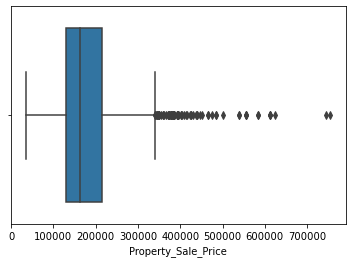

In [9]:
sns.boxplot(df.Property_Sale_Price)

In [10]:
Q1 = np.percentile(df.Property_Sale_Price, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.Property_Sale_Price, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.Property_Sale_Price, 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) # 3.0

Q1 25 percentile of the given data is,  130000.0
Q1 50 percentile of the given data is,  163990.0
Q1 75 percentile of the given data is,  214000.0
Interquartile range is 84000.0


In [11]:
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR # 346
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

low_limit is 4000.0
up_limit is 340000.0


In [12]:
len(df.Property_Sale_Price[df.Property_Sale_Price >up_lim])

78

In [13]:
df=df[df.Property_Sale_Price<up_lim]

<AxesSubplot:xlabel='Property_Sale_Price', ylabel='Density'>

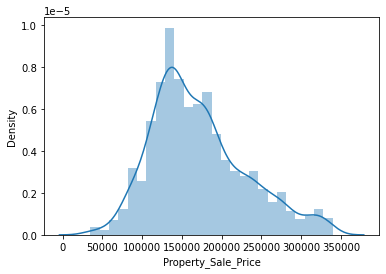

In [14]:
sns.distplot(df.Property_Sale_Price)

<AxesSubplot:xlabel='Property_Sale_Price'>

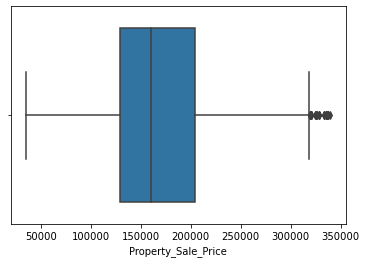

In [15]:
sns.boxplot(df.Property_Sale_Price)

# Split: train test split

In [16]:
# The train-test split procedure is used to estimate the performance of machine learning algorithms when 
# they are used to make predictions on data not used to train the model.

<AxesSubplot:xlabel='Road_Type', ylabel='count'>

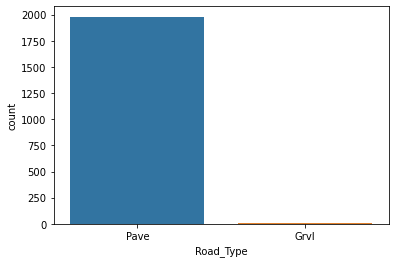

In [18]:
sns.countplot(x='Road_Type',data=df)

In [ ]:
df.Road

In [9]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [10]:
# Here we are dividing the whole dataset into independent variables(X) and dependent variable(y)

# Here we are selecting all the columns except the last column('Property_Sales_Price')
X = df.iloc[:,:-1]

# Only selecting the last column('Property_Sales_Price')
y = df.iloc[:,-1]

In [11]:
X.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [12]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: Property_Sale_Price, dtype: int64

In [13]:
# The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model
# and is referred to as the training dataset. The second subset is not used to train the model; instead, 
# the input element of the dataset is provided to the model, then predictions are made and compared to the 
# expected values. This second dataset is referred to as the test dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(1658, 80)

In [15]:
X_test.shape

(415, 80)

# Basic Commands

In [16]:
X_train.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
1743  1744  80          RL         73.0         9674     Pave      NaN    
1640  1641  20          RL         98.0         10942    Pave      NaN    
2028  902   20          RL         64.0         8712     Pave      NaN    
1432  1433  30          RL         60.0         10800    Pave      Grvl   
1586  1587  85          RL         77.0         10786    Pave      NaN    

     Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
1743  IR1            Lvl         AllPub    Corner    Gtl       Timber        
1640  Reg            Lvl         AllPub    Inside    Gtl       NAmes         
2028  IR1            Lvl         AllPub    Inside    Gtl       NAmes         
1432  Reg            Lvl         AllPub    Inside    Gtl       OldTown       
1586  IR1            Lvl         AllPub    CulDSac   Gtl       SawyerW       

     Condition1 Condition2 Dwelling_Type HouseStyle  OverallQual  OverallCond  \
1743  Norm       Norm       1Fam          SLvl       7            4             
1640  Norm       Norm       1Fam          1Story     4            4             
2028  Norm       Norm       1Fam          1Story     9            4             
1432  Norm       Norm       1Fam          1Story     9            6             
1586  Norm       Norm       1Fam          SFoyer     6            7             

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
1743  2010       2023          Gable     CompShg  VinylSd     VinylSd      
1640  1958       1983          Hip       CompShg  HdBoard     HdBoard      
2028  1980       2000          Hip       CompShg  MetalSd     MetalSd      
1432  1927       2007          Gable     CompShg  Wd Sdng     Wd Sdng      
1586  1991       2003          Gable     CompShg  HdBoard     HdBoard      

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1743  BrkFace    442.0       Gd        TA        PConc      Ex       TA        
1640  None       0.0         TA        TA        CBlock     TA       TA        
2028  None       0.0         TA        Gd        CBlock     TA       TA        
1432  None       0.0         TA        TA        BrkTil     TA       TA        
1586  None       0.0         TA        TA        CBlock     Gd       TA        

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1743  Av           GLQ          786         Unf          0            
1640  No           ALQ          457         Rec          374          
2028  Mn           BLQ          860         Unf          0            
1432  No           Unf          0           Unf          0            
1586  Av           ALQ          747         LwQ          93           

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1743  82         868          GasA    Ex        Y          SBrkr       
1640  193        1024         GasA    TA        Y          SBrkr       
2028  132        992          GasA    TA        Y          SBrkr       
1432  656        656          GasA    TA        Y          SBrkr       
1586  0          840          GasA    Gd        Y          SBrkr       

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1743  1146      0         0             1146       1             0              
1640  1344      0         0             1344       1             0              
2028  1306      0         0             1306       1             0              
1432  968       0         0             968        0             0              
1586  884       0         0             884        1             0              

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1743  2         0         3             1             Gd           
1640  1         0         2             1             TA           
2028  1         0         2             1             TA           
1432  2         0         4             1   

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 1743 to 860
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1658 non-null   int64  
 1   Dwell_Type      1658 non-null   int64  
 2   Zone_Class      1658 non-null   object 
 3   LotFrontage     1401 non-null   float64
 4   LotArea         1658 non-null   int64  
 5   Road_Type       1658 non-null   object 
 6   Alley           104 non-null    object 
 7   Property_Shape  1658 non-null   object 
 8   LandContour     1658 non-null   object 
 9   Utilities       1658 non-null   object 
 10  LotConfig       1658 non-null   object 
 11  LandSlope       1658 non-null   object 
 12  Neighborhood    1658 non-null   object 
 13  Condition1      1658 non-null   object 
 14  Condition2      1658 non-null   object 
 15  Dwelling_Type   1658 non-null   object 
 16  HouseStyle      1658 non-null   object 
 17  OverallQual     1658 non-null  

In [18]:
X_train.describe().T

count          mean          std     min      25%     50%  \
Id             1658.0  912.901689    491.113068   1.0     523.25   931.0    
Dwell_Type     1658.0  61.592280     177.519192   20.0    20.00    50.0     
LotFrontage    1401.0  72.120628     27.887511    21.0    60.00    70.0     
LotArea        1658.0  10887.623040  9944.220252  1300.0  7688.75  9571.5   
OverallQual    1658.0  6.251508      1.530246     1.0     5.00     6.0      
OverallCond    1658.0  5.837756      1.364114     1.0     5.00     5.0      
YearBuilt      1658.0  1969.775633   30.304913    1872.0  1950.00  1972.0   
YearRemodAdd   1658.0  1986.965018   20.403976    1950.0  1970.00  1995.0   
MasVnrArea     1648.0  103.349515    179.600093   0.0     0.00     0.0      
BsmtFinSF1     1658.0  439.746683    455.426421   0.0     0.00     380.5    
BsmtFinSF2     1658.0  51.043426     170.382379   0.0     0.00     0.0      
BsmtUnfSF      1658.0  563.818456    452.677900   0.0     204.00   460.5    
TotalBsmtSF    1658.0  1054.608565   438.123691   0.0     793.00   990.0    
1stFlrSF       1658.0  1167.445115   382.014845   334.0   893.25   1095.5   
2ndFlrSF       1658.0  350.387817    437.579046   0.0     0.00     0.0      
LowQualFinSF   1658.0  6.980700      52.198089    0.0     0.00     0.0      
GrLivArea      1658.0  1524.813631   517.415637   334.0   1140.25  1478.0   
BsmtFullBath   1658.0  0.430036      0.522507     0.0     0.00     0.0      
BsmtHalfBath   1658.0  0.055489      0.236775     0.0     0.00     0.0      
FullBath       1658.0  1.577805      0.547372     0.0     1.00     2.0      
HalfBath       1658.0  0.384198      0.498801     0.0     0.00     0.0      
BedroomAbvGr   1658.0  2.879976      0.826943     0.0     2.00     3.0      
KitchenAbvGr   1658.0  1.048854      0.231813     0.0     1.00     1.0      
TotRmsAbvGrd   1658.0  6.574186      1.629054     2.0     5.00     6.0      
Fireplaces     1658.0  0.607358      0.633690     0.0     0.00     1.0      
GarageYrBlt    1568.0  1980.478954   24.294504    1906.0  1963.00  1985.0   
GarageCars     1658.0  1.781665      0.746330     0.0     1.00     2.0      
GarageArea     1658.0  476.072376    213.277600   0.0     336.00   480.0    
WoodDeckSF     1658.0  96.391435     129.813433   0.0     0.00     0.0      
OpenPorchSF    1658.0  46.140531     63.883004    0.0     0.00     26.0     
EnclosedPorch  1658.0  21.095899     60.654506    0.0     0.00     0.0      
3SsnPorch      1658.0  3.083233      27.959801    0.0     0.00     0.0      
ScreenPorch    1658.0  14.188782     53.209983    0.0     0.00     0.0      
PoolArea       1658.0  1.649578      30.178241    0.0     0.00     0.0      
MiscVal        1658.0  37.400483     422.875960   0.0     0.00     0.0      
MoSold         1658.0  6.318456      2.681870     1.0     5.00     6.0      
YrSold         1658.0  2007.834138   1.322793     2006.0  2007.00  2008.0   

                    75%       max  
Id             1282.75   1820.0    
Dwell_Type     70.00     7080.0    
LotFrontage    83.00     313.0     
LotArea        11766.25  215245.0  
OverallQual    7.00      10.0      
OverallCond    7.00      9.0       
YearBuilt      1999.00   2010.0    
YearRemodAdd   2005.00   2023.0    
MasVnrArea     162.00    1378.0    
BsmtFinSF1     706.00    5644.0    
BsmtFinSF2     0.00      1474.0    
BsmtUnfSF      807.50    2336.0    
TotalBsmtSF    1288.00   6110.0    
1stFlrSF       1392.00   4692.0    
2ndFlrSF       739.00    1872.0    
LowQualFinSF   0.00      528.0     
GrLivArea      1792.00   5642.0    
BsmtFullBath   1.00      3.0       
BsmtHalfBath   0.00      2.0       
FullBath       2.00      3.0       
HalfBath       1.00      2.0       
BedroomAbvGr   3.00      8.0       
KitchenAbvGr   1.00      3.0       
TotRmsAbvGrd   7.00      14.0      
Fireplaces     1.00      3.0       
GarageYrBlt    2003.00   2019.0    
GarageCars     2.00      4.0       
GarageArea     576.00    1418.0    
WoodDeckSF     168.00    857.0     
OpenPorch

In [19]:
X_train.isnull().sum()

# There are some null values in some columns

Id                0   
Dwell_Type        0   
Zone_Class        0   
LotFrontage       257 
LotArea           0   
Road_Type         0   
Alley             1554
Property_Shape    0   
LandContour       0   
Utilities         0   
LotConfig         0   
LandSlope         0   
Neighborhood      0   
Condition1        0   
Condition2        0   
Dwelling_Type     0   
HouseStyle        0   
OverallQual       0   
OverallCond       0   
YearBuilt         0   
YearRemodAdd      0   
RoofStyle         0   
RoofMatl          0   
Exterior1st       0   
Exterior2nd       0   
MasVnrType        10  
MasVnrArea        10  
ExterQual         0   
ExterCond         0   
Foundation        0   
BsmtQual          48  
BsmtCond          48  
BsmtExposure      50  
BsmtFinType1      48  
BsmtFinSF1        0   
BsmtFinType2      49  
BsmtFinSF2        0   
BsmtUnfSF         0   
TotalBsmtSF       0   
Heating           0   
HeatingQC         0   
CentralAir        0   
Electrical        0   
1stFlrSF   

In [20]:
# Lets see the percent of null values in each columns.

round((X_train.isnull().sum()/len(X_train))*100,2)

Id                0.00 
Dwell_Type        0.00 
Zone_Class        0.00 
LotFrontage       15.50
LotArea           0.00 
Road_Type         0.00 
Alley             93.73
Property_Shape    0.00 
LandContour       0.00 
Utilities         0.00 
LotConfig         0.00 
LandSlope         0.00 
Neighborhood      0.00 
Condition1        0.00 
Condition2        0.00 
Dwelling_Type     0.00 
HouseStyle        0.00 
OverallQual       0.00 
OverallCond       0.00 
YearBuilt         0.00 
YearRemodAdd      0.00 
RoofStyle         0.00 
RoofMatl          0.00 
Exterior1st       0.00 
Exterior2nd       0.00 
MasVnrType        0.60 
MasVnrArea        0.60 
ExterQual         0.00 
ExterCond         0.00 
Foundation        0.00 
BsmtQual          2.90 
BsmtCond          2.90 
BsmtExposure      3.02 
BsmtFinType1      2.90 
BsmtFinSF1        0.00 
BsmtFinType2      2.96 
BsmtFinSF2        0.00 
BsmtUnfSF         0.00 
TotalBsmtSF       0.00 
Heating           0.00 
HeatingQC         0.00 
CentralAir      

# Imputing Missing Values

### Droping columns above 40 percent of missing data

In [21]:
# Columns having more than 40% missing values

# selecting all the columns from the command from the above command
missing_percent = round((X_train.isnull().sum()/len(X_train))*100,2)

# selecting all the columns with missing values above 40 percent 
missing_above_40 = missing_percent[missing_percent>40]
print('Amount of null values above 40%')
missing_above_40

Amount of null values above 40%


Alley          93.73
FireplaceQu    47.17
PoolQC         99.70
Fence          81.48
MiscFeature    96.20
dtype: float64

In [22]:
X_train[missing_above_40.index.values].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 1743 to 860
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Alley        104 non-null    object
 1   FireplaceQu  876 non-null    object
 2   PoolQC       5 non-null      object
 3   Fence        307 non-null    object
 4   MiscFeature  63 non-null     object
dtypes: object(5)
memory usage: 77.7+ KB


In [23]:
df_desc.loc['Alley']

description    Type of alley access to the property
Name: Alley, dtype: object

In [24]:
df_desc.loc['FireplaceQu']

description    Fireplace quality
Name: FireplaceQu, dtype: object

In [25]:
df_desc.loc['PoolQC']

description    Pool quality
Name: PoolQC, dtype: object

In [26]:
df_desc.loc['Fence']

description    Fence quality
Name: Fence, dtype: object

In [27]:
df_desc.loc['MiscFeature']

description    Miscellaneous feature not covered in other categories
Name: MiscFeature, dtype: object

In [28]:
# Droping the columns with missing values above 40 percent in the training set

X_train.drop(missing_above_40.index.values, axis=1, inplace=True)

In [29]:
# Droping the columns with missing values above 40 percent in the test set

X_test.drop(missing_above_40.index.values, axis=1, inplace=True)

In [30]:
X_train.shape

(1658, 75)

In [31]:
X_test.shape

(415, 75)

### Understanding columns which have NA values

In [32]:
# We removed all the null values above 40 percent. Now we can inspect other columns with null values.


# Selecting only the columns with null values

cols_with_null = X_train.isnull().sum()[X_train.isnull().sum()!=0].index.values

In [33]:
cols_with_null

# These are the columns with null values.

array(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype=object)

In [34]:
X_train[cols_with_null].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 1743 to 860
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1401 non-null   float64
 1   MasVnrType    1648 non-null   object 
 2   MasVnrArea    1648 non-null   float64
 3   BsmtQual      1610 non-null   object 
 4   BsmtCond      1610 non-null   object 
 5   BsmtExposure  1608 non-null   object 
 6   BsmtFinType1  1610 non-null   object 
 7   BsmtFinType2  1609 non-null   object 
 8   GarageType    1568 non-null   object 
 9   GarageYrBlt   1568 non-null   float64
 10  GarageFinish  1568 non-null   object 
 11  GarageQual    1568 non-null   object 
 12  GarageCond    1568 non-null   object 
dtypes: float64(3), object(10)
memory usage: 181.3+ KB


In [35]:
# Before starting to inspect the columns with null values to make the process easy we can define a function
# to make plots and print out some details of the column.

def understand_na_cols(col_name):
    '''
    Accepts a column name and prints out the 
    detals about that column'''
    
    # prints the description of the column
    print(df_desc.loc[col_name],'\n')
    
    # prints the number of null values in the column
    print('Number of null values: ', X_train[col_name].isnull().sum())
    
    # prints the percent of null values in the column
    print('Percent of null values: ', round((X_train[col_name].isnull().sum()/len(X_train))*100,2), '%\n')
    
    # Checking if the column is numerical or categorical
    if X_train[col_name].dtypes != 'O':
        # This line will run only if the datatype of the column is numerical
        
        # print the descrptive statistics of the column
        print(f'Descriptive Statistics of {col_name} \n', X_train[col_name].describe())
        
        # plots the histogram of the column
        sns.distplot(X_train[col_name])
        plt.title(f'Histogram of {col_name}')
    else:
        # This line will run only if the datatype of the column is categorical
        
        # prints out the number of levels in column
        print('Levels: \n',X_train[col_name].value_counts(),'\n')
        
        # plots the countplot of the column
        sns.countplot(X_train[col_name])
        plt.title(f'Countplot of {col_name}')

In [36]:
# We have to fill the missing values based on mean, median and mode
# So while inspecting the column we can find out which of the strategy(mean, median or mode) should be used to 
# fill the null values.

# After finding out which strategy to use, we will note that inside a dictionary for using at the time of filling 
# missing values.

# So lets create an empty dictionary called strategy.

strategy = {}

#### LotFrontage

description    Linear feet of street-connected to the property
Name: LotFrontage, dtype: object 

Number of null values:  257
Percent of null values:  15.5 %

Descriptive Statistics of LotFrontage 
 count    1401.000000
mean     72.120628  
std      27.887511  
min      21.000000  
25%      60.000000  
50%      70.000000  
75%      83.000000  
max      313.000000 
Name: LotFrontage, dtype: float64


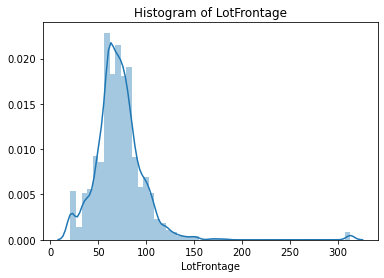

In [37]:
# Understanding all the columns with missing values

understand_na_cols('LotFrontage')

**Insight : Use median to fill NA values of LotFrontage column

In [38]:
# Based on the details and histogram of 'LotFrontage' column, we can use median to fill its missing values.

# So lets take a note of that and pass in into our 'stategy' dictionary.

strategy['median'] = ['LotFrontage']

#### MasVnrType

description    Masonry veneer type
Name: MasVnrType, dtype: object 

Number of null values:  10
Percent of null values:  0.6 %

Levels: 
 None       977
BrkFace    502
Stone      153
BrkCmn     16 
Name: MasVnrType, dtype: int64 



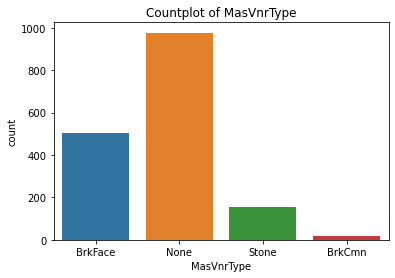

In [39]:
understand_na_cols('MasVnrType')

* BrkCmn - Brick Common 
* BrkFace - Brick Face 
* CBlock - Cinder Block 
* None - None 
* Stone - Stone

**Insight : Use mode to fill missing values of 'MasVnrType' column

In [40]:
strategy['mode'] = ['MasVnrType']

#### MasVnrArea

description    Masonry veneer area in square feet
Name: MasVnrArea, dtype: object 

Number of null values:  10
Percent of null values:  0.6 %

Descriptive Statistics of MasVnrArea 
 count    1648.000000
mean     103.349515 
std      179.600093 
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      162.000000 
max      1378.000000
Name: MasVnrArea, dtype: float64


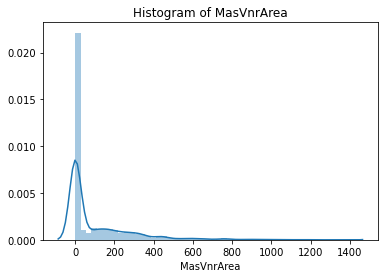

In [41]:
understand_na_cols('MasVnrArea')

In [42]:
X_train.groupby('MasVnrType').mean()['MasVnrArea']

MasVnrType
BrkCmn     204.687500
BrkFace    257.398406
None       0.648925  
Stone      243.117647
Name: MasVnrArea, dtype: float64

**Insight : Use mode to fill Na values of MasVnrArea column

In [43]:
strategy['mode'].append('MasVnrArea')

#### BsmtQual

description    Evaluates the height of the basement
Name: BsmtQual, dtype: object 

Number of null values:  48
Percent of null values:  2.9 %

Levels: 
 Gd    715
TA    709
Ex    145
Fa    41 
Name: BsmtQual, dtype: int64 



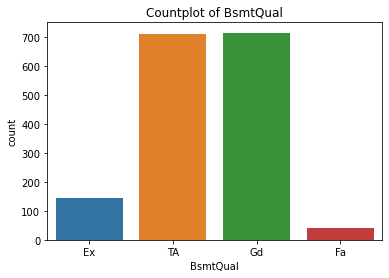

In [44]:
understand_na_cols('BsmtQual')

* Ex Excellent (100+ inches) 
* Gd Good (90-99 inches) 
* TA Typical (80-89 inches) 
* Fa Fair (70-79 inches) 
* Po Poor (<70 inches NA No Basement

**Insight : Use mode to fill missing values

In [45]:
strategy['mode'].append('BsmtQual')

#### BsmtCond

description    Evaluates the general condition of the basement
Name: BsmtCond, dtype: object 

Number of null values:  48
Percent of null values:  2.9 %

Levels: 
 TA    1474
Gd    82  
Fa    52  
Po    2   
Name: BsmtCond, dtype: int64 



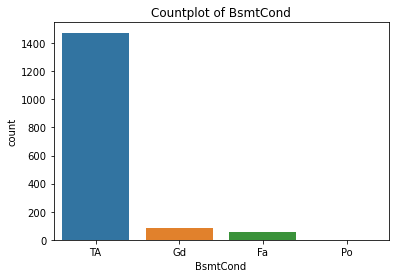

In [46]:
understand_na_cols('BsmtCond')

* Ex Excellent 
* Gd Good 
* TA Typical - slight dampness allowed 
* Fa Fair - dampness or some cracking or settling
* Po Poor - Severe cracking, settling, or wetness 
* NA No Basement

**Insight : Use mode to fill missing values in BsmtCond columns

In [47]:
strategy['mode'].append('BsmtCond')

#### BsmtExposure

description    Refers to walkout or garden level walls
Name: BsmtExposure, dtype: object 

Number of null values:  50
Percent of null values:  3.02 %

Levels: 
 No    1065
Av    264 
Gd    152 
Mn    127 
Name: BsmtExposure, dtype: int64 



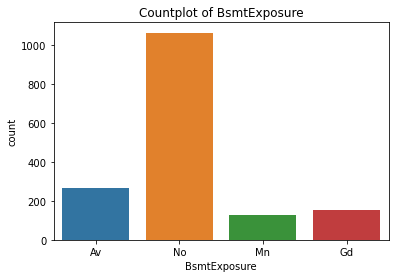

In [48]:
understand_na_cols('BsmtExposure')

* Gd Good Exposure 
* Av Average Exposure (split levels or foyers typically score average or above) 
* Mn Minimum Exposure 
* No No Exposure 
* NA No Basement

**Insight : Use mode to fill missing data in BsmtExposure colulmn

In [49]:
strategy['mode'].append('BsmtExposure')

#### BsmtFinType1

description    Rating of basement finished area
Name: BsmtFinType1, dtype: object 

Number of null values:  48
Percent of null values:  2.9 %

Levels: 
 GLQ    490
Unf    479
ALQ    254
BLQ    167
Rec    134
LwQ    86 
Name: BsmtFinType1, dtype: int64 



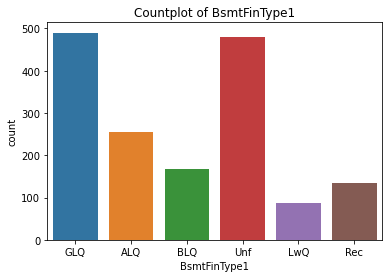

In [50]:
understand_na_cols('BsmtFinType1')

* GLQ Good Living Quarters 
* ALQ Average Living Quarters 
* BLQ Below Average Living Quarters 
* Rec Average Rec Room 
* LwQ Low Quality 
* Unf Unfinished
* NA No Basement

**Insight : Use mode to fill the missing values in BsmtFinType1

In [51]:
strategy['mode'].append('BsmtFinType1')

#### BsmtFinType2 

description    Rating of basement finished area (if multiple types)
Name: BsmtFinType2, dtype: object 

Number of null values:  49
Percent of null values:  2.96 %

Levels: 
 Unf    1410
Rec    60  
LwQ    58  
BLQ    42  
ALQ    21  
GLQ    18  
Name: BsmtFinType2, dtype: int64 



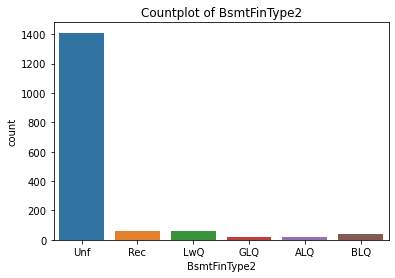

In [52]:
understand_na_cols('BsmtFinType2')

* GLQ Good Living Quarters 
* ALQ Average Living Quarters 
* BLQ Below Average Living Quarters 
* Rec Average Rec Room 
* LwQ Low Quality 
* Unf Unfinished 
* NA No Basement

**Insight : Use mode to fill missing values in BsmtFinType2

In [53]:
strategy['mode'].append('BsmtFinType2')

#### FireplaceQu

#### GarageType

description    Garage location
Name: GarageType, dtype: object 

Number of null values:  90
Percent of null values:  5.43 %

Levels: 
 Attchd     1001
Detchd     432 
BuiltIn    98  
Basment    19  
CarPort    11  
2Types     7   
Name: GarageType, dtype: int64 



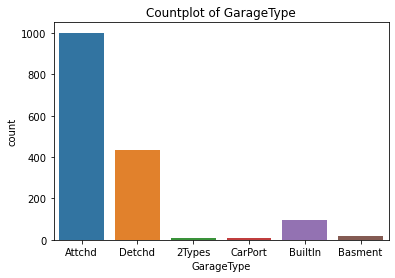

In [54]:
understand_na_cols('GarageType')

**Insight : Use mode to fill missing values of GarageType column

In [55]:
strategy['mode'].append('GarageType')

#### GarageYrBlt

description    Year garage was built
Name: GarageYrBlt, dtype: object 

Number of null values:  90
Percent of null values:  5.43 %

Descriptive Statistics of GarageYrBlt 
 count    1568.000000
mean     1980.478954
std      24.294504  
min      1906.000000
25%      1963.000000
50%      1985.000000
75%      2003.000000
max      2019.000000
Name: GarageYrBlt, dtype: float64


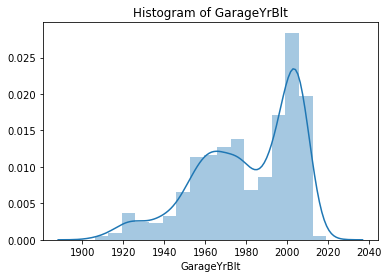

In [56]:
understand_na_cols('GarageYrBlt')

**Insight Use mode to fill missing values of GarageYrBlt column

In [57]:
strategy['mode'].append('GarageYrBlt')

#### GarageFinish

description    Interior finish of the garage
Name: GarageFinish, dtype: object 

Number of null values:  90
Percent of null values:  5.43 %

Levels: 
 Unf    671
RFn    489
Fin    408
Name: GarageFinish, dtype: int64 



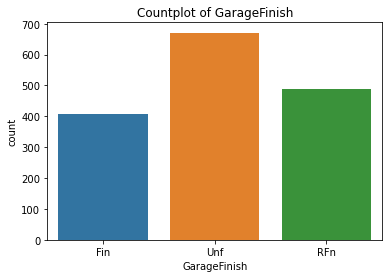

In [58]:
understand_na_cols('GarageFinish')

**Insight : Use mode to fill missing values of GarageFinish columns

In [59]:
strategy['mode'].append('GarageFinish')

#### GarageQual

description    Garage quality
Name: GarageQual, dtype: object 

Number of null values:  90
Percent of null values:  5.43 %

Levels: 
 TA    1502
Fa    48  
Gd    13  
Ex    3   
Po    2   
Name: GarageQual, dtype: int64 



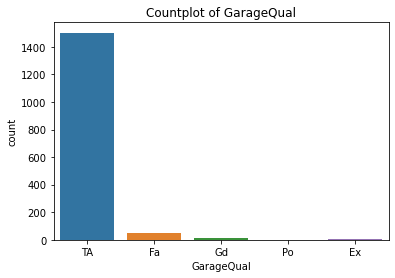

In [60]:
understand_na_cols('GarageQual')

**Insight : Use mode to fill the missing values of GarageQual column

In [61]:
strategy['mode'].append('GarageQual')

#### GarageCond

description    Garage condition
Name: GarageCond, dtype: object 

Number of null values:  90
Percent of null values:  5.43 %

Levels: 
 TA    1510
Fa    37  
Gd    12  
Po    6   
Ex    3   
Name: GarageCond, dtype: int64 



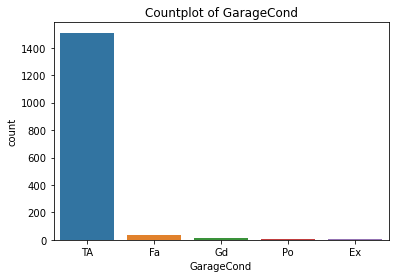

In [62]:
understand_na_cols('GarageCond')

**Insight : Use mode to fill missing values of GarageCond column

In [63]:
strategy['mode'].append('GarageCond')

### Imputing missing values

In [64]:
X_train.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type  \
1743  1744  80          RL         73.0         9674     Pave       
1640  1641  20          RL         98.0         10942    Pave       
2028  902   20          RL         64.0         8712     Pave       
1432  1433  30          RL         60.0         10800    Pave       
1586  1587  85          RL         77.0         10786    Pave       

     Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
1743  IR1            Lvl         AllPub    Corner    Gtl       Timber        
1640  Reg            Lvl         AllPub    Inside    Gtl       NAmes         
2028  IR1            Lvl         AllPub    Inside    Gtl       NAmes         
1432  Reg            Lvl         AllPub    Inside    Gtl       OldTown       
1586  IR1            Lvl         AllPub    CulDSac   Gtl       SawyerW       

     Condition1 Condition2 Dwelling_Type HouseStyle  OverallQual  OverallCond  \
1743  Norm       Norm       1Fam          SLvl       7            4             
1640  Norm       Norm       1Fam          1Story     4            4             
2028  Norm       Norm       1Fam          1Story     9            4             
1432  Norm       Norm       1Fam          1Story     9            6             
1586  Norm       Norm       1Fam          SFoyer     6            7             

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
1743  2010       2023          Gable     CompShg  VinylSd     VinylSd      
1640  1958       1983          Hip       CompShg  HdBoard     HdBoard      
2028  1980       2000          Hip       CompShg  MetalSd     MetalSd      
1432  1927       2007          Gable     CompShg  Wd Sdng     Wd Sdng      
1586  1991       2003          Gable     CompShg  HdBoard     HdBoard      

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1743  BrkFace    442.0       Gd        TA        PConc      Ex       TA        
1640  None       0.0         TA        TA        CBlock     TA       TA        
2028  None       0.0         TA        Gd        CBlock     TA       TA        
1432  None       0.0         TA        TA        BrkTil     TA       TA        
1586  None       0.0         TA        TA        CBlock     Gd       TA        

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1743  Av           GLQ          786         Unf          0            
1640  No           ALQ          457         Rec          374          
2028  Mn           BLQ          860         Unf          0            
1432  No           Unf          0           Unf          0            
1586  Av           ALQ          747         LwQ          93           

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1743  82         868          GasA    Ex        Y          SBrkr       
1640  193        1024         GasA    TA        Y          SBrkr       
2028  132        992          GasA    TA        Y          SBrkr       
1432  656        656          GasA    TA        Y          SBrkr       
1586  0          840          GasA    Gd        Y          SBrkr       

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1743  1146      0         0             1146       1             0              
1640  1344      0         0             1344       1             0              
2028  1306      0         0             1306       1             0              
1432  968       0         0             968        0             0              
1586  884       0         0             884        1             0              

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1743  2         0         3             1             Gd           
1640  1         0         2             1             TA           
2028  1         0         2             1             TA           
1432  2         0         4             1             TA           
1586  1     

In [65]:
X_train.shape

(1658, 75)

In [66]:
X_test.shape

(415, 75)

In [68]:
# Now lets check which strategy to use for imputation of missing values in respective columns

strategy

{'median': ['LotFrontage'],
 'mode': ['MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond']}

In [69]:
X_train.isnull().sum()

Id                0  
Dwell_Type        0  
Zone_Class        0  
LotFrontage       257
LotArea           0  
Road_Type         0  
Property_Shape    0  
LandContour       0  
Utilities         0  
LotConfig         0  
LandSlope         0  
Neighborhood      0  
Condition1        0  
Condition2        0  
Dwelling_Type     0  
HouseStyle        0  
OverallQual       0  
OverallCond       0  
YearBuilt         0  
YearRemodAdd      0  
RoofStyle         0  
RoofMatl          0  
Exterior1st       0  
Exterior2nd       0  
MasVnrType        10 
MasVnrArea        10 
ExterQual         0  
ExterCond         0  
Foundation        0  
BsmtQual          48 
BsmtCond          48 
BsmtExposure      50 
BsmtFinType1      48 
BsmtFinSF1        0  
BsmtFinType2      49 
BsmtFinSF2        0  
BsmtUnfSF         0  
TotalBsmtSF       0  
Heating           0  
HeatingQC         0  
CentralAir        0  
Electrical        0  
1stFlrSF          0  
2ndFlrSF          0  
LowQualFinSF      0  
GrLivArea 

In [71]:
def fill_na_values(df):
    '''
    Accepts the dataframe and fills all the null values inplace.'''
    for key in strategy.keys():
        for col in strategy[key]:
            if key == 'median':
                median = X_train[col].median()
                df[col].fillna(value=median, inplace=True)
            elif key == 'mode':
                mode = X_train[col].mode()[0]
                df[col].fillna(value=mode, inplace=True)
    
    df.dropna(axis=0,inplace=True)

In [72]:
fill_na_values(X_train)

In [73]:
X_train.isnull().sum().sum()

0

In [74]:
fill_na_values(X_test)

In [75]:
X_test.isnull().sum().sum()

0

In [76]:
X_train.shape

(1658, 75)

In [77]:
X_test.shape

(414, 75)

# Exploratory Data Analysis(EDA)

### Some Useful Functions

In [78]:
# Lets create a variable called action which is similar to strategy variable. Here we will record which columns to drop and
# which columns to use scalers and transformers.

# We can create set objects inside the dictionary to fill with column names. because we dont want our column names to be
# repeated for the same process.

# Set items are unordered, unchangeable, and do not allow duplicate values.

act_drop = set()
act_power = set()
act_quant = set()
act_rob = set()
act_std = set()
act_ohe = set()

action = {
    'drop' : act_drop,
    'power_t' : act_power,
    'quantile_t' : act_quant,
    'robust_s' : act_rob,
    'standard_s' : act_std,
    'one_hot' : act_ohe
}

In [79]:
# Same process to record the numerical columns with different correlations

h_set=set()
m_set=set()
l_set=set()

correlation = {
    'high(6-10)' : h_set,
    'medium(3-6)' : m_set,
    'low(0-3)' : l_set
}

In [80]:
def uni_var_analysis(col_name):
    print(f'Basic EDA of {col_name}\n')
    print(df_desc.loc[col_name])
    print('\n')
    
    if X_eda[col_name].dtypes != 'O':
        
        fig, axes = plt.subplots(1,2, figsize=(17,7))
        fig.suptitle(f'Histogram and Probability plot for {col_name}')
        sns.distplot(ax=axes[0], a=X_eda[col_name], fit=norm)
        axes[1] = stats.probplot(X_eda[col_name], plot=plt)
        print('\n')
        
        Q1 = X_eda[col_name].quantile(0.25)
        Q3 = X_eda[col_name].quantile(0.75)
        IQR = Q3 - Q1
        no_of_out = sum((X_eda[col_name] < (Q1 - 1.5 * IQR)) |(X_eda[col_name] > (Q3 + 1.5 * IQR)))
        print(f'There are {no_of_out} outliers in the {col_name} column.')
        print('\n')

        print('Skewness: ', X_eda[col_name].skew())
        print('Kurtosis: ', X_eda[col_name].kurtosis())
        print('\n')

        print('Test for Normality: ')
        Ho = 'There is no significant departure from normal bell shaped curve (Data is normal)'
        Ha = 'There is a significant departure from normal bell shaped curve (Data is not normal)'
        print('Ho : ', Ho)
        print('Ha : ', Ha)
        print('\n')
        stat, p = shapiro(X_eda[col_name])
        
        print('Test Results')
        print('test statistics: %.3f' %stat)
        print('p value: %.6f' %p)
        print('\n')
        alpha = 0.05
        
        if p>alpha:
            print(f'{Ho} : fail to reject Ho')
            if no_of_out>0:
                action['robust_s'].add(col_name)
            else:
                action['standard_s'].add(col_name)
        else:
            print(f'{Ha} : reject Ho')
            
            if no_of_out>0:
                action['quantile_t'].add(col_name)
            else:
                action['power_t'].add(col_name)
                
                
    elif X_eda[col_name].dtypes == 'O':
        
        plt.figure(figsize=(9,7))
        sns.countplot(X_eda[col_name])
        plt.title(f'Countplot of {col_name}')
        
        print(f'Unique values in {col_name} are {X_eda[col_name].unique()}\n')
        
        print(X_eda[col_name].value_counts())
    

In [81]:
def bi_var_analysis(x,y='Property_Sale_Price'):
    print(f'Relationship between {x} and {y}\n')

    print(df_desc.loc[x],'\n')
    print(df_desc.loc[y])
    print('\n')
    
    if y=='Property_Sale_Price' and x!='Property_Sale_Price':
        if X_eda[x].dtypes != 'O':
            if x in action['quantile_t'] or x in action['power_t']:
                print('Since the data is not normally distributed we are using Spearman correlation coeffiecient.')
                corr, _ = spearmanr(X_eda[x], X_eda[y])
                print('Spearmans correlation: %.3f' % corr)
                    
            else:
                corr, _ = pearsonr(X_eda[x], X_eda[y])
                print('Pearsons correlation: %.3f' % corr)
                
            corr = abs(corr)
            if corr>=0.6:
                correlation['high(6-10)'].add(x)
            elif corr>=0.3 and corr<0.6:
                correlation['medium(3-6)'].add(x)
            elif corr>=0 and corr<0.3:
                correlation['low(0-3)'].add(x)
            
            print('\n')
            print(f'Lets see the relation between {x} and {y} using Wald Test with t-distribution of the test statistic.')
            print('\n')
            Ho = 'Slope is 0 (The regression model has no predictability of the dependent variable)'
            Ha = 'Slope not equal to 0 (The regressioin model can predict the dependent variable)'
            print('Ho: ',Ho)
            print('Ha: ',Ha)
            print('\n')
            
            lin_scale_demo = RobustScaler()
            demo_df = pd.DataFrame(lin_scale_demo.fit_transform(X_eda[[x,y]]), columns=[x,y])
            demo_lr = linregress(demo_df[x], demo_df[y])
            
            print('Test Results\n')
            print('Slope: ', demo_lr.slope)
            print('Intercept: ', demo_lr.intercept)
            print('R-value: ', demo_lr.rvalue)
            print('p-value: ', demo_lr.pvalue)
            print('Std error: ', demo_lr.stderr)
            print('\n')
            
            alpha = 0.05
            if demo_lr.pvalue>alpha:
                print('Fail to reject Null hypothesis, ', Ho)
                action['drop'].add(x)
            else:
                print('Reject Null hypothesis, ', Ha)
            
            fig, axes = plt.subplots(1,2, figsize=(15,7))
            sns.scatterplot(x=x, y=y, data=X_eda, ax=axes[0])
            sns.regplot(x=x,y=y,data=X_eda,ax=axes[1])
            
        elif X_eda[x].dtypes == 'O':
            
            unique = X_eda[x].unique()
            print(f'Unique values in {x} are : {unique}')
            print('\n')
            
            Ho = f'All the levels in {x} have an equal mean {y}'
            Ha = f'There is a significant difference between the levels of {x} with respect to {y} mean'
            
            alpha = 0.05
            
            print('Ho: ', Ho)
            print('Ha: ', Ha)
            print('\n')
            
            if len(X_train[x].unique()) == 2:
                                
                ind_1 = X_eda[X_eda[x] == X_eda[x].unique()[0]]
                ind_2 = X_eda[X_eda[x] == X_eda[x].unique()[1]]
                
                stat, p_value = stats.ttest_ind(ind_1[y], ind_2[y])
                print('Test Results')
                print('\n')
                print('Test statistics: ', stats)
                print('p-value: ', p_value)
                
                
            else:
                
                anova_model = ols(f'{y} ~ C({x})', data=X_eda).fit()
                aov_table = sm.stats.anova_lm(anova_model, typ=2)
                print('Test Results \n')
                print(aov_table)
                print('\n')
                p_value = aov_table['PR(>F)'].iloc[0]
                
            if p_value>alpha:
                print('Fail to reject null hypothesis, ', Ho)
                action['drop'].add(x)
            else:
                print('Reject null hypothesis, ', Ha)
                action['one_hot'].add(x)
                
        
            fig, axes = plt.subplots(2,1, figsize=(15,10))
            
            sns.countplot(x=x, data=X_eda, ax=axes[0])
            sns.boxplot(x=x, y=y, data=X_eda, ax=axes[1])

                
    elif y!='Property_Sale_Prediction' and x!='Property_Sale_Prediction':
        print(f'Relationship between {x} and {y}')
        
    else:
        print(f'Relationship between {x} and {y}')

### Basic EDA

In [82]:
X_eda = pd.concat([X_train, y_train], axis=1)

In [83]:
# X_eda.info()

In [84]:
# X_eda.describe().T

#### Id

Basic EDA of Id

description    Identification number of the property
Name: Id, dtype: object




There are 0 outliers in the Id column.


Skewness:  -0.03322077685804171
Kurtosis:  -0.9352023714505782


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.970
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


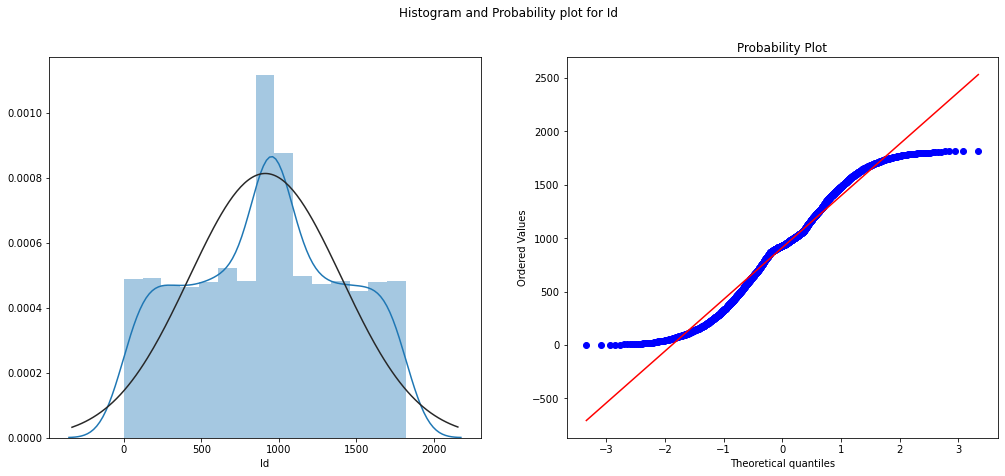

In [85]:
uni_var_analysis('Id')

Relationship between Id and Property_Sale_Price

description    Identification number of the property
Name: Id, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.004


Lets see the relation between Id and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.008571693855823726
Intercept:  0.20693166742812957
R-value:  -0.00584509214403403
p-value:  0.8120159065899893
Std error:  0.03603609344221428


Fail to reject Null hypothesis,  Slope is 0 (The regression model has no predictability of the dependent variable)


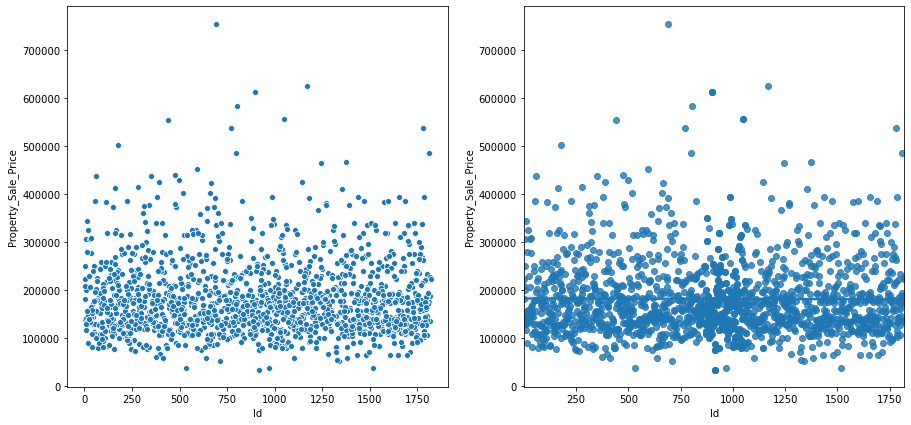

In [86]:
bi_var_analysis('Id')

#### Dwell_Type

Basic EDA of Dwell_Type

description    Identifies the type of dwelling involved in the sale
Name: Dwell_Type, dtype: object




There are 123 outliers in the Dwell_Type column.


Skewness:  37.355495278246174
Kurtosis:  1476.8763767763128


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.089
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


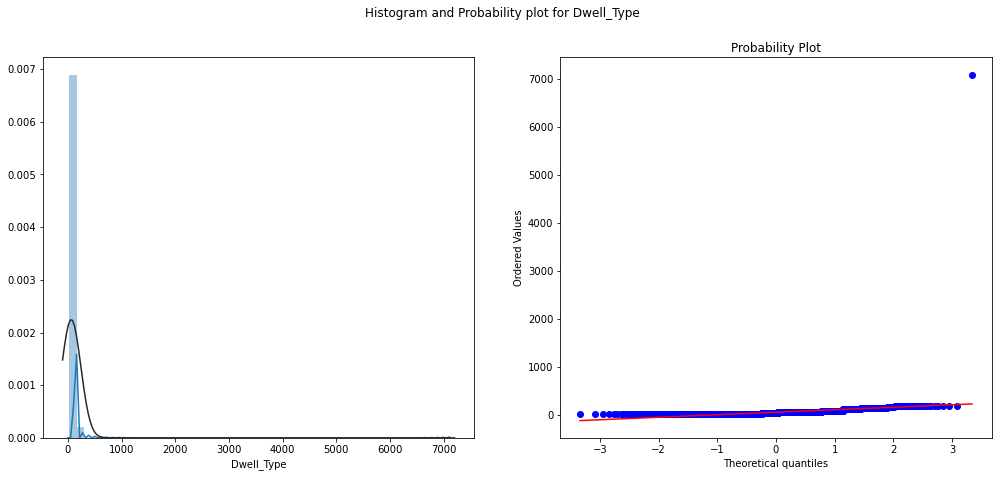

In [87]:
uni_var_analysis('Dwell_Type')

Relationship between Dwell_Type and Property_Sale_Price

description    Identifies the type of dwelling involved in the sale
Name: Dwell_Type, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.006


Lets see the relation between Dwell_Type and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.0056524539973828265
Intercept:  0.2084464209891629
R-value:  -0.021163297822352628
p-value:  0.38913601886289206
Std error:  0.006561849235420561


Fail to reject Null hypothesis,  Slope is 0 (The regression model has no predictability of the dependent variable)


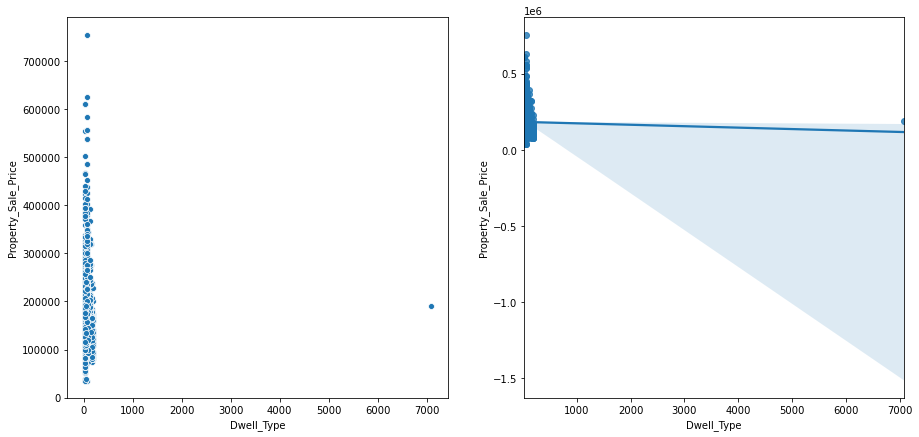

In [88]:
bi_var_analysis('Dwell_Type')

#### Zone_Class

Basic EDA of Zone_Class

description    Identifies the general zoning classification of the sale
Name: Zone_Class, dtype: object


Unique values in Zone_Class are ['RL' 'FV' 'RM' 'RH' 'C (all)']

RL         1300
RM         252 
FV         80  
RH         16  
C (all)    10  
Name: Zone_Class, dtype: int64


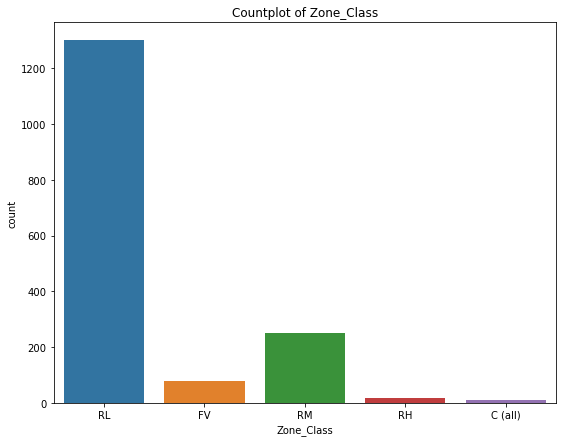

In [89]:
uni_var_analysis('Zone_Class')

Relationship between Zone_Class and Property_Sale_Price

description    Identifies the general zoning classification of the sale
Name: Zone_Class, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Zone_Class are : ['RL' 'FV' 'RM' 'RH' 'C (all)']


Ho:  All the levels in Zone_Class have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Zone_Class with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df          F        PR(>F)
C(Zone_Class)  1.110329e+12  4.0     49.487184  2.250797e-39
Residual       9.271966e+12  1653.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of Zone_Class with respect to Property_Sale_Price mean


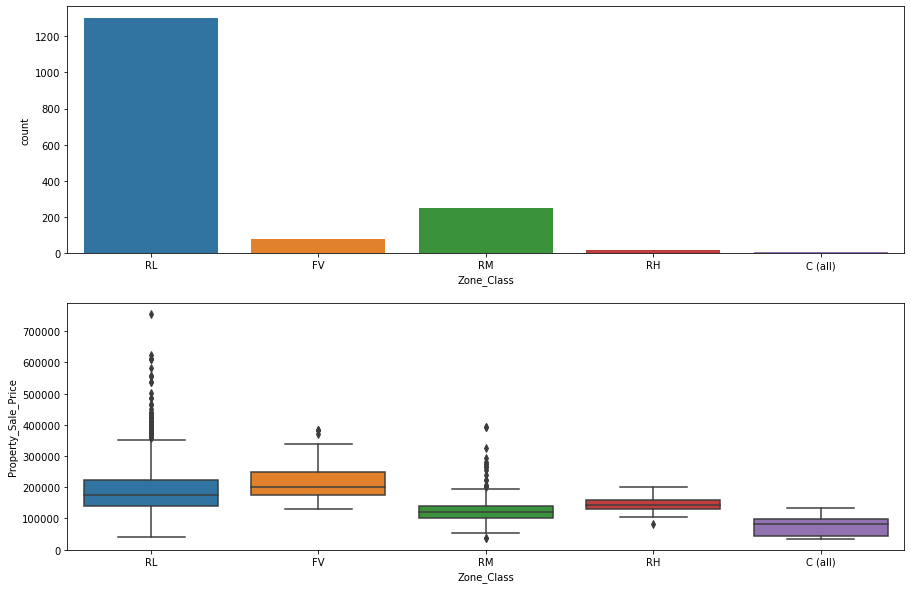

In [90]:
bi_var_analysis('Zone_Class')

#### LotFrontage

Basic EDA of LotFrontage

description    Linear feet of street-connected to the property
Name: LotFrontage, dtype: object




There are 100 outliers in the LotFrontage column.


Skewness:  3.715025990951114
Kurtosis:  32.24391102842268


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.758
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


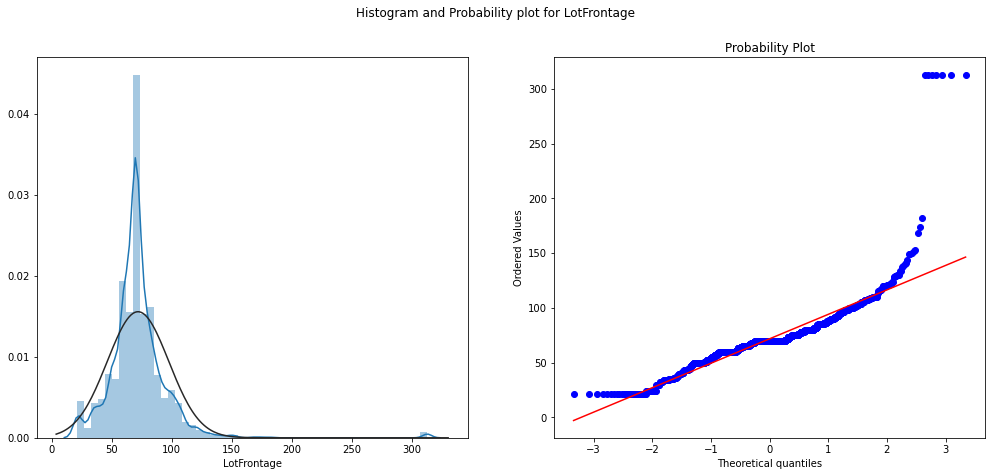

In [91]:
uni_var_analysis('LotFrontage')

Relationship between LotFrontage and Property_Sale_Price

description    Linear feet of street-connected to the property
Name: LotFrontage, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.342


Lets see the relation between LotFrontage and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.19293009851866674
Intercept:  0.18985017885916178
R-value:  0.2608844520801684
p-value:  3.3522487498315996e-27
Std error:  0.017543467490407506


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


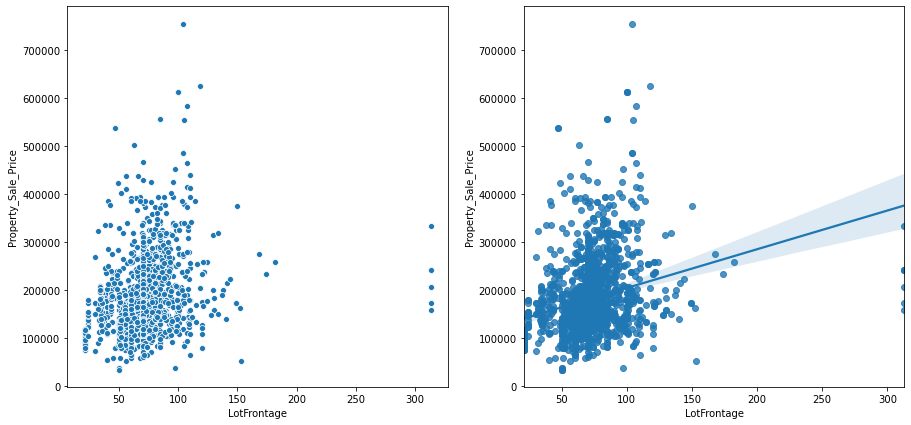

In [92]:
bi_var_analysis('LotFrontage')

#### LotArea

Basic EDA of LotArea

description    Lot size is the lot or parcel side where it adjoins a street, boulevard or access way
Name: LotArea, dtype: object




There are 105 outliers in the LotArea column.


Skewness:  11.049686145909893
Kurtosis:  180.41819722184135


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.396
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


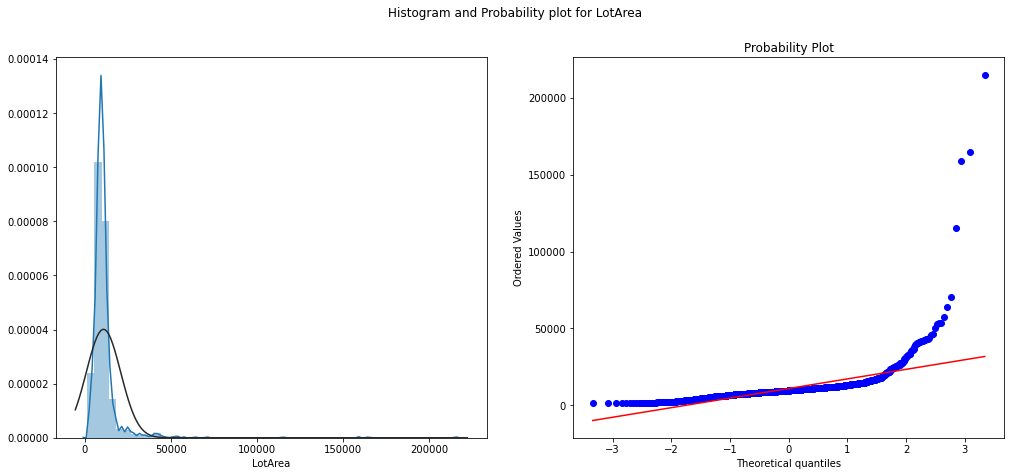

In [93]:
uni_var_analysis('LotArea')

Relationship between LotArea and Property_Sale_Price

description    Lot size is the lot or parcel side where it adjoins a street, boulevard or access way
Name: LotArea, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.380


Lets see the relation between LotArea and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.08302167001943307
Intercept:  0.18033844245116276
R-value:  0.21352032841151772
p-value:  1.5059074820563815e-18
Std error:  0.009334463223488843


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


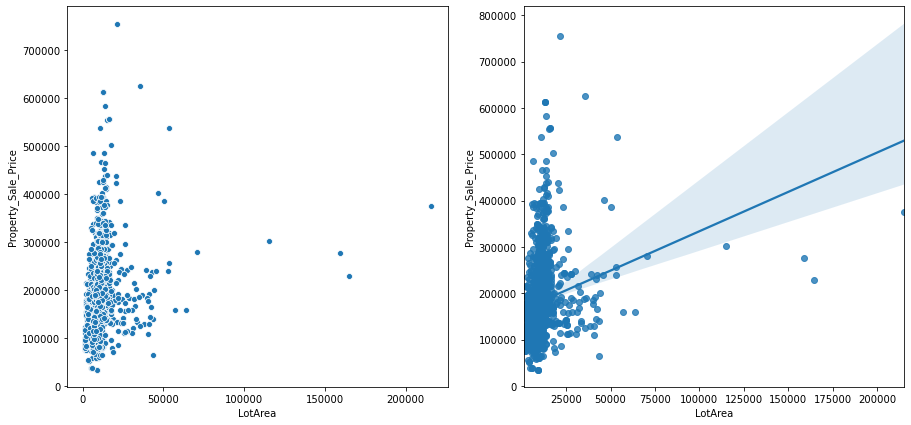

In [94]:
bi_var_analysis('LotArea')

#### Road_Type

Basic EDA of Road_Type

description    Type of road access to the property
Name: Road_Type, dtype: object


Unique values in Road_Type are ['Pave' 'Grvl']

Pave    1651
Grvl    7   
Name: Road_Type, dtype: int64


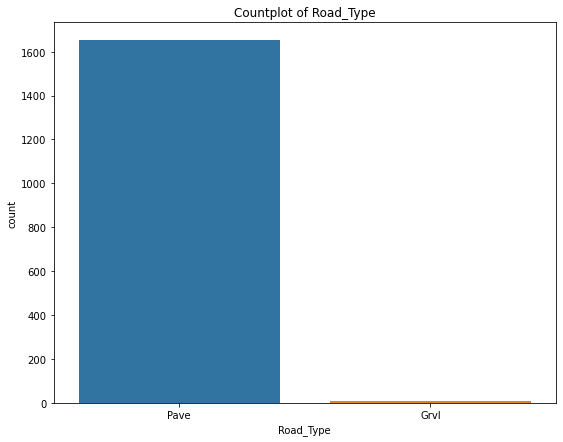

In [95]:
uni_var_analysis('Road_Type')

Relationship between Road_Type and Property_Sale_Price

description    Type of road access to the property
Name: Road_Type, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Road_Type are : ['Pave' 'Grvl']


Ho:  All the levels in Road_Type have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Road_Type with respect to Property_Sale_Price mean


Test Results


Test statistics:  <module 'scipy.stats' from 'C:\\Users\\Darshan\\Anaconda3\\lib\\site-packages\\scipy\\stats\\__init__.py'>
p-value:  0.10440231669042775
Fail to reject null hypothesis,  All the levels in Road_Type have an equal mean Property_Sale_Price


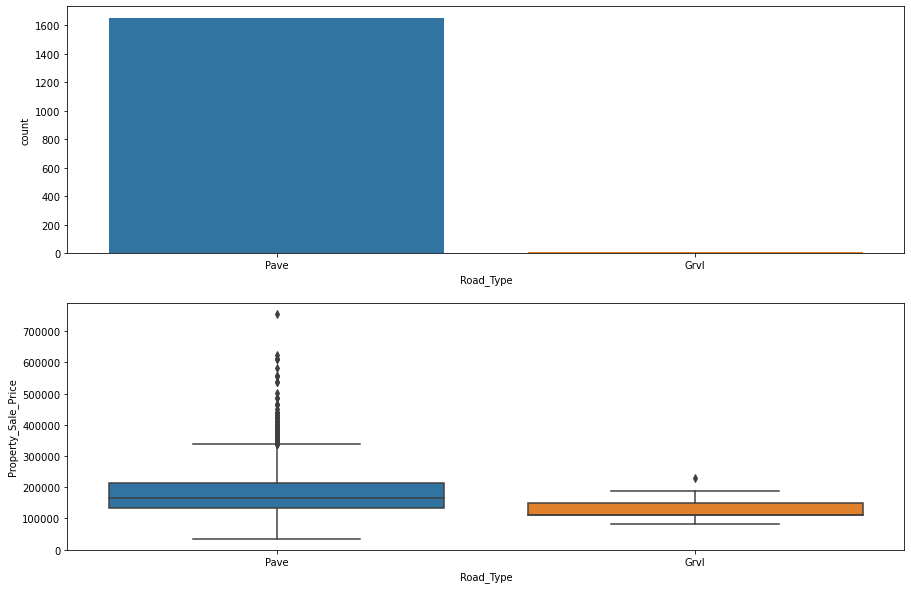

In [96]:
bi_var_analysis('Road_Type')

#### Property_Shape

Basic EDA of Property_Shape

description    General shape of the property
Name: Property_Shape, dtype: object


Unique values in Property_Shape are ['IR1' 'Reg' 'IR2' 'IR3']

Reg    1030
IR1    564 
IR2    52  
IR3    12  
Name: Property_Shape, dtype: int64


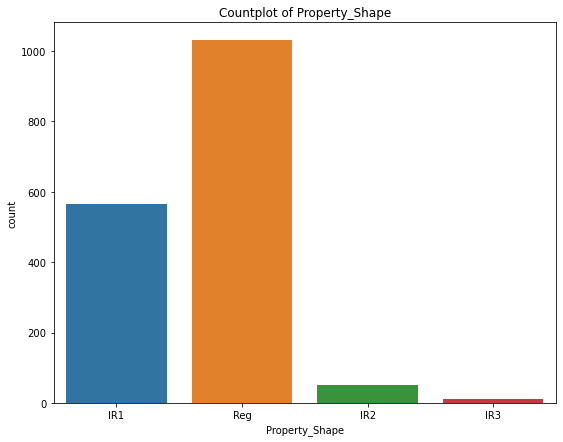

In [97]:
uni_var_analysis('Property_Shape')

Relationship between Property_Shape and Property_Sale_Price

description    General shape of the property
Name: Property_Shape, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Property_Shape are : ['IR1' 'Reg' 'IR2' 'IR3']


Ho:  All the levels in Property_Shape have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Property_Shape with respect to Property_Sale_Price mean


Test Results 

                         sum_sq      df          F        PR(>F)
C(Property_Shape)  7.768619e+11  3.0     44.590376  1.043620e-27
Residual           9.605433e+12  1654.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of Property_Shape with respect to Property_Sale_Price mean


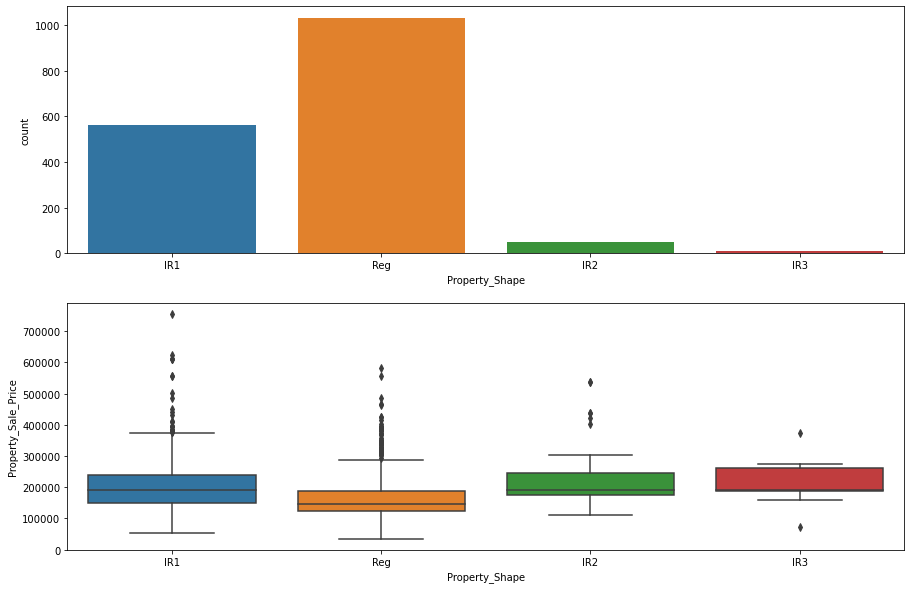

In [98]:
bi_var_analysis('Property_Shape')

#### LandContour

Basic EDA of LandContour

description    Flatness of the property
Name: LandContour, dtype: object


Unique values in LandContour are ['Lvl' 'Bnk' 'Low' 'HLS']

Lvl    1483
Bnk    70  
HLS    62  
Low    43  
Name: LandContour, dtype: int64


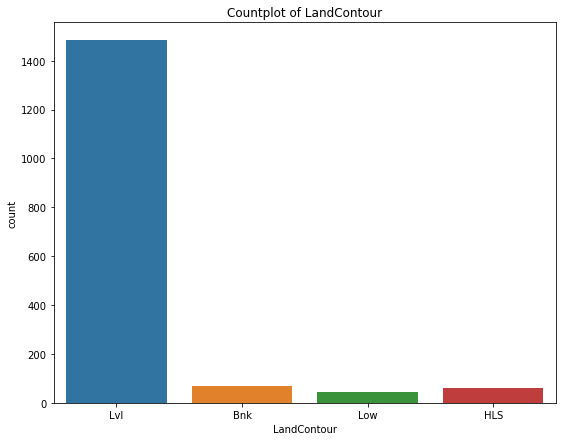

In [99]:
uni_var_analysis('LandContour')

Relationship between LandContour and Property_Sale_Price

description    Flatness of the property
Name: LandContour, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in LandContour are : ['Lvl' 'Bnk' 'Low' 'HLS']


Ho:  All the levels in LandContour have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of LandContour with respect to Property_Sale_Price mean


Test Results 

                      sum_sq      df          F        PR(>F)
C(LandContour)  3.332079e+11  3.0     18.281127  1.138710e-11
Residual        1.004909e+13  1654.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of LandContour with respect to Property_Sale_Price mean


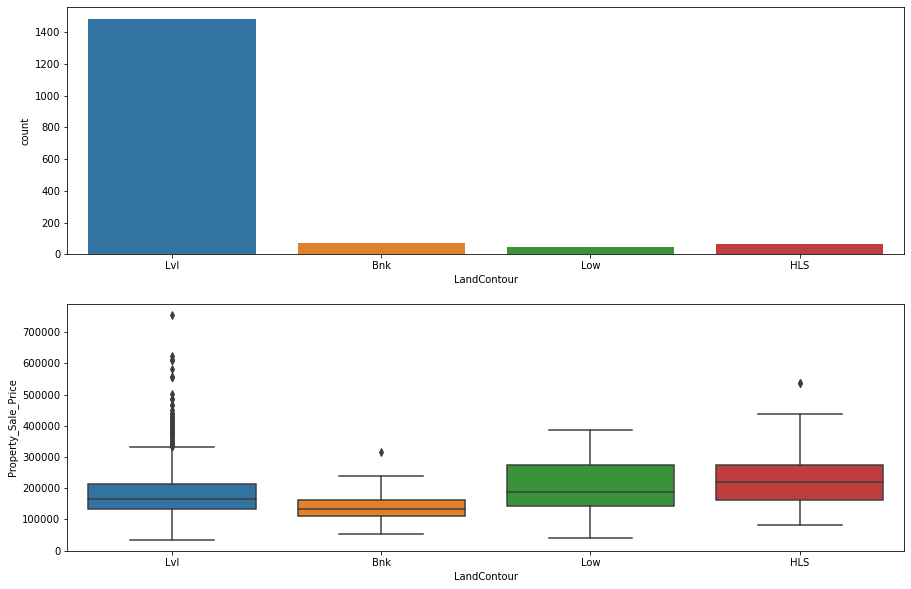

In [100]:
bi_var_analysis('LandContour')

#### Utilities

Basic EDA of Utilities

description    Type of utilities available
Name: Utilities, dtype: object


Unique values in Utilities are ['AllPub' 'NoSeWa']

AllPub    1655
NoSeWa    3   
Name: Utilities, dtype: int64


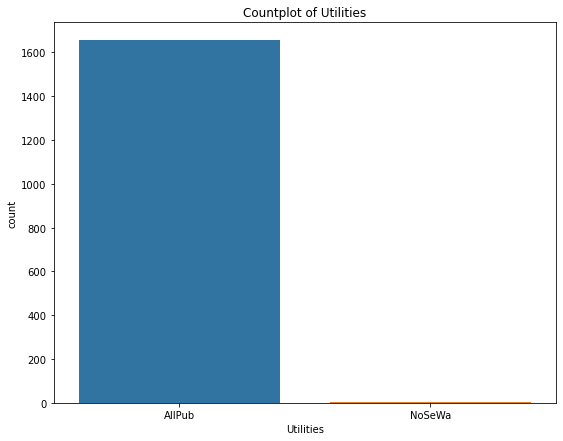

In [101]:
uni_var_analysis('Utilities')

Relationship between Utilities and Property_Sale_Price

description    Type of utilities available
Name: Utilities, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Utilities are : ['AllPub' 'NoSeWa']


Ho:  All the levels in Utilities have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Utilities with respect to Property_Sale_Price mean


Test Results


Test statistics:  <module 'scipy.stats' from 'C:\\Users\\Darshan\\Anaconda3\\lib\\site-packages\\scipy\\stats\\__init__.py'>
p-value:  0.3267559875503203
Fail to reject null hypothesis,  All the levels in Utilities have an equal mean Property_Sale_Price


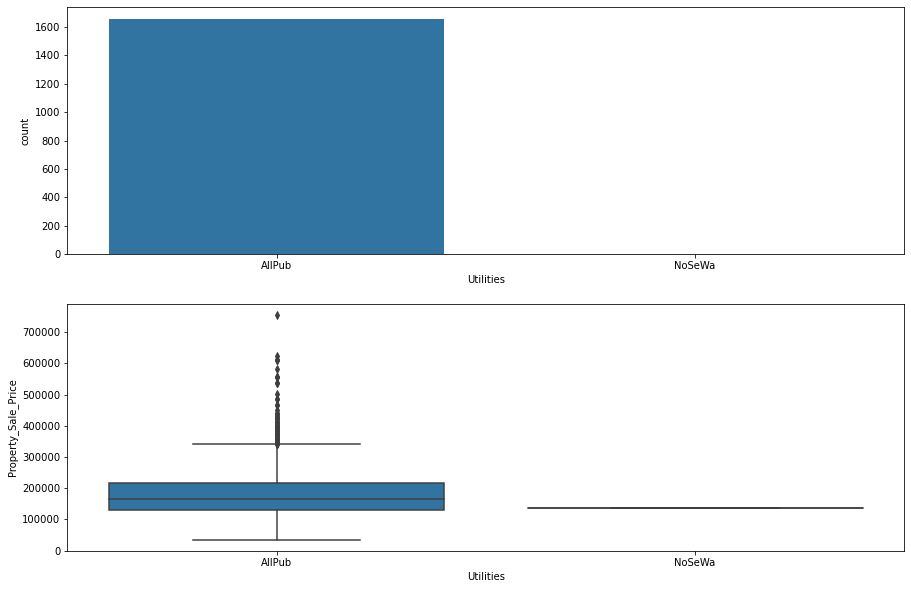

In [102]:
bi_var_analysis('Utilities')

#### LotConfig

Basic EDA of LotConfig

description    Lot configuration
Name: LotConfig, dtype: object


Unique values in LotConfig are ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']

Inside     1168
Corner     320 
CulDSac    114 
FR2        52  
FR3        4   
Name: LotConfig, dtype: int64


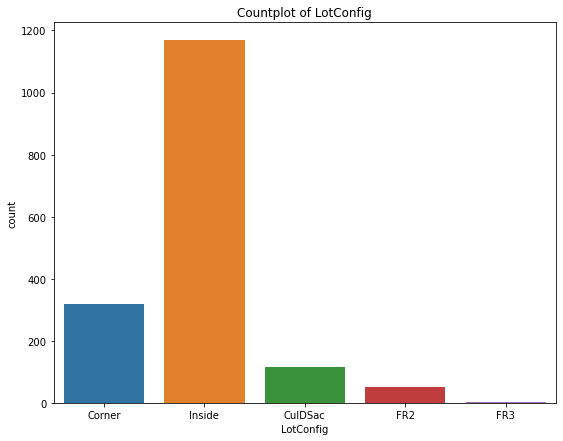

In [103]:
uni_var_analysis('LotConfig')

Relationship between LotConfig and Property_Sale_Price

description    Lot configuration
Name: LotConfig, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in LotConfig are : ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']


Ho:  All the levels in LotConfig have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of LotConfig with respect to Property_Sale_Price mean


Test Results 

                    sum_sq      df         F    PR(>F)
C(LotConfig)  1.583707e+11  4.0     6.401326  0.000041
Residual      1.022392e+13  1653.0 NaN       NaN      


Reject null hypothesis,  There is a significant difference between the levels of LotConfig with respect to Property_Sale_Price mean


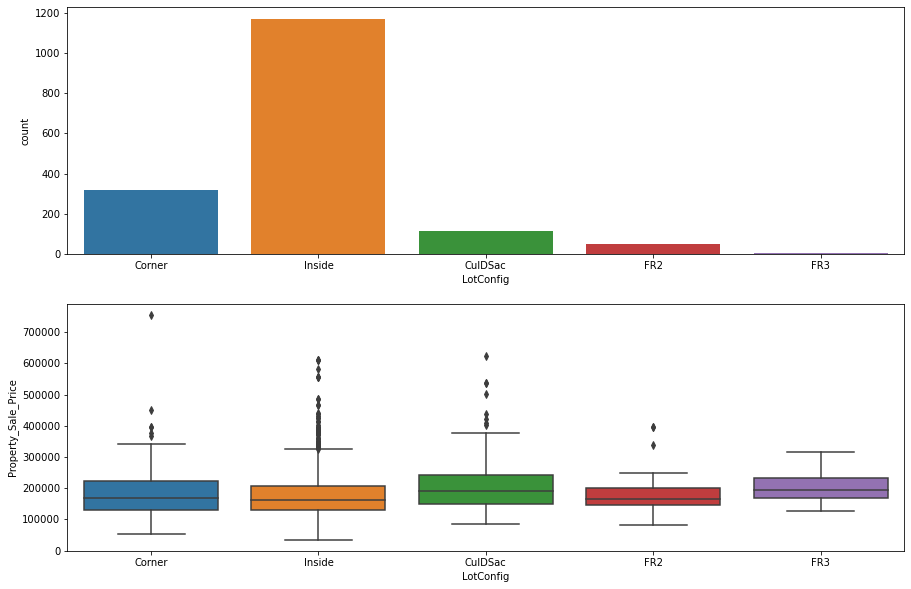

In [104]:
bi_var_analysis('LotConfig')

#### LandSlope

Basic EDA of LandSlope

description    Slope of property
Name: LandSlope, dtype: object


Unique values in LandSlope are ['Gtl' 'Mod' 'Sev']

Gtl    1563
Mod    85  
Sev    10  
Name: LandSlope, dtype: int64


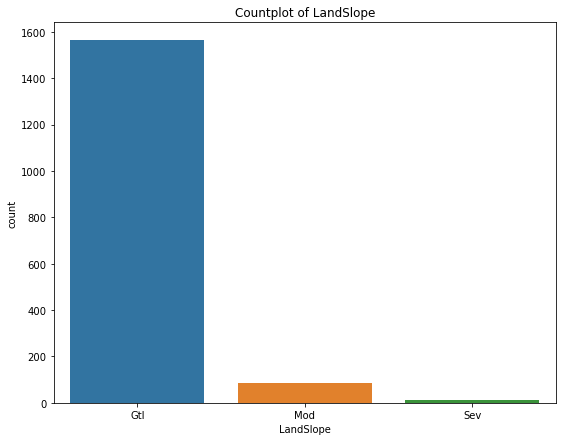

In [105]:
uni_var_analysis('LandSlope')

Relationship between LandSlope and Property_Sale_Price

description    Slope of property
Name: LandSlope, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in LandSlope are : ['Gtl' 'Mod' 'Sev']


Ho:  All the levels in LandSlope have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of LandSlope with respect to Property_Sale_Price mean


Test Results 

                    sum_sq      df         F   PR(>F)
C(LandSlope)  2.447969e+10  2.0     1.955716  0.14179
Residual      1.035782e+13  1655.0 NaN       NaN     


Fail to reject null hypothesis,  All the levels in LandSlope have an equal mean Property_Sale_Price


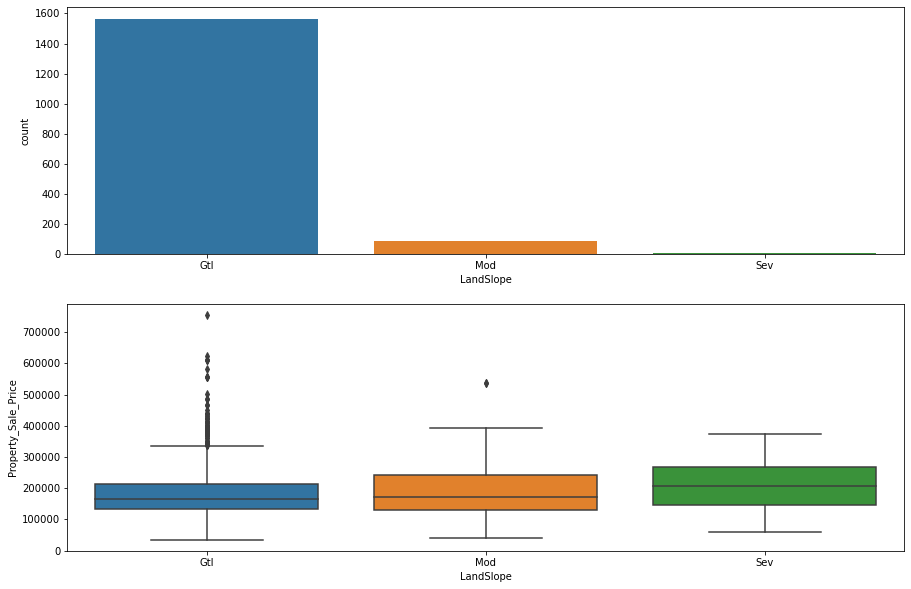

In [106]:
bi_var_analysis('LandSlope')

#### Neighborhood

Basic EDA of Neighborhood

description    Physical locations within Ames city limits
Name: Neighborhood, dtype: object


Unique values in Neighborhood are ['Timber' 'NAmes' 'OldTown' 'SawyerW' 'Edwards' 'Sawyer' 'Mitchel'
 'Somerst' 'IDOTRR' 'NridgHt' 'ClearCr' 'Gilbert' 'CollgCr' 'StoneBr'
 'BrkSide' 'BrDale' 'Crawfor' 'NWAmes' 'NoRidge' 'Blmngtn' 'NPkVill'
 'MeadowV' 'SWISU' 'Veenker' 'Blueste']

NAmes      257
CollgCr    173
OldTown    124
Edwards    114
Somerst    98 
Gilbert    96 
Sawyer     83 
NridgHt    80 
NWAmes     79 
SawyerW    77 
Mitchel    62 
BrkSide    60 
Crawfor    55 
NoRidge    51 
Timber     45 
IDOTRR     39 
StoneBr    28 
ClearCr    27 
SWISU      25 
Blmngtn    23 
MeadowV    20 
BrDale     15 
NPkVill    13 
Veenker    12 
Blueste    2  
Name: Neighborhood, dtype: int64


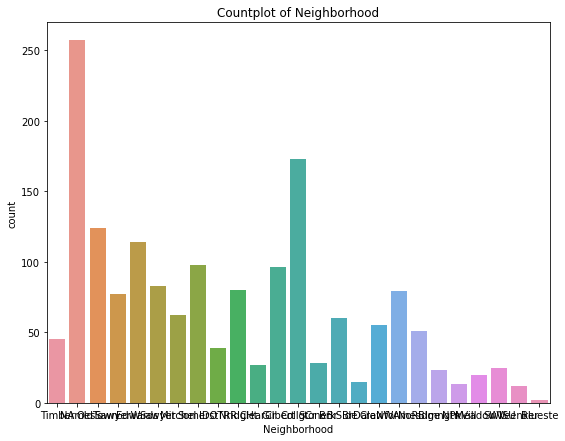

In [107]:
uni_var_analysis('Neighborhood')

Relationship between Neighborhood and Property_Sale_Price

description    Physical locations within Ames city limits
Name: Neighborhood, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Neighborhood are : ['Timber' 'NAmes' 'OldTown' 'SawyerW' 'Edwards' 'Sawyer' 'Mitchel'
 'Somerst' 'IDOTRR' 'NridgHt' 'ClearCr' 'Gilbert' 'CollgCr' 'StoneBr'
 'BrkSide' 'BrDale' 'Crawfor' 'NWAmes' 'NoRidge' 'Blmngtn' 'NPkVill'
 'MeadowV' 'SWISU' 'Veenker' 'Blueste']


Ho:  All the levels in Neighborhood have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Neighborhood with respect to Property_Sale_Price mean


Test Results 

                       sum_sq      df         F         PR(>F)
C(Neighborhood)  5.887143e+12  24.0    89.11177  8.352141e-276
Residual         4.495152e+12  1633.0 NaN       NaN           


Reject null hypothesis,  There is a significant difference between the levels of Neighbo

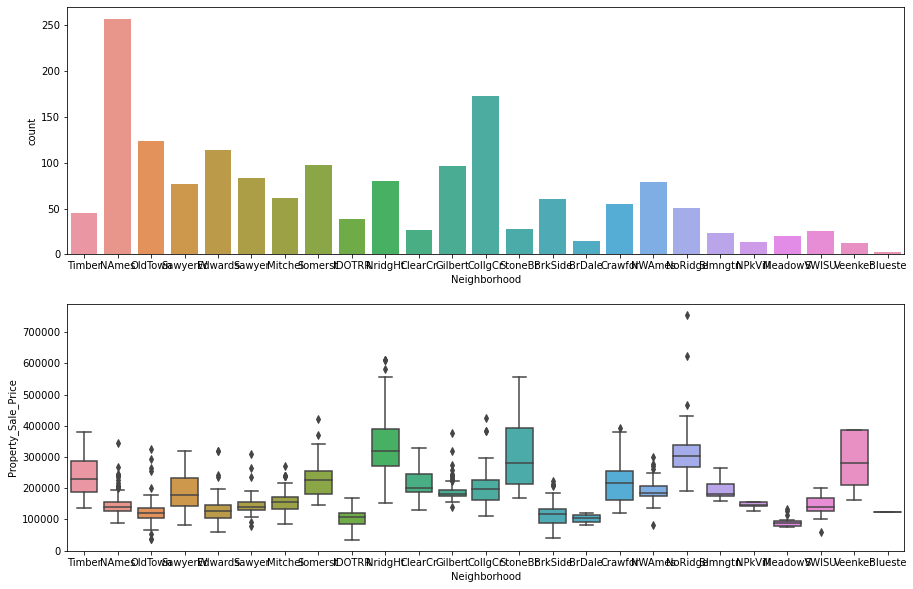

In [108]:
bi_var_analysis('Neighborhood')

#### Condition1

Basic EDA of Condition1

description    Proximity to various conditions
Name: Condition1, dtype: object


Unique values in Condition1 are ['Norm' 'RRNn' 'Artery' 'Feedr' 'RRAn' 'PosN' 'RRAe' 'PosA' 'RRNe']

Norm      1438
Feedr     85  
Artery    51  
RRAn      31  
PosN      17  
RRAe      13  
RRNn      11  
PosA      11  
RRNe      1   
Name: Condition1, dtype: int64


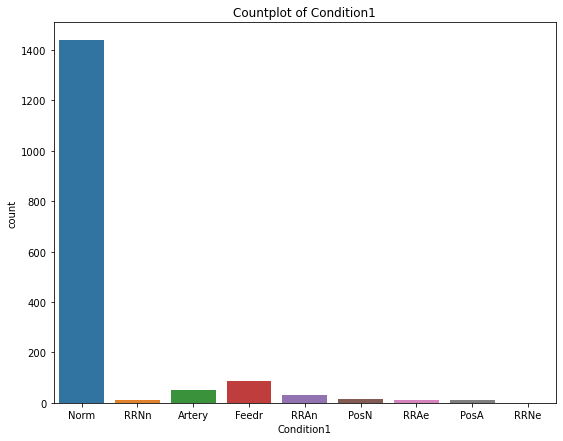

In [109]:
uni_var_analysis('Condition1')

Relationship between Condition1 and Property_Sale_Price

description    Proximity to various conditions
Name: Condition1, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Condition1 are : ['Norm' 'RRNn' 'Artery' 'Feedr' 'RRAn' 'PosN' 'RRAe' 'PosA' 'RRNe']


Ho:  All the levels in Condition1 have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Condition1 with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df         F        PR(>F)
C(Condition1)  3.607992e+11  8.0     7.421021  9.462864e-10
Residual       1.002150e+13  1649.0 NaN       NaN          


Reject null hypothesis,  There is a significant difference between the levels of Condition1 with respect to Property_Sale_Price mean


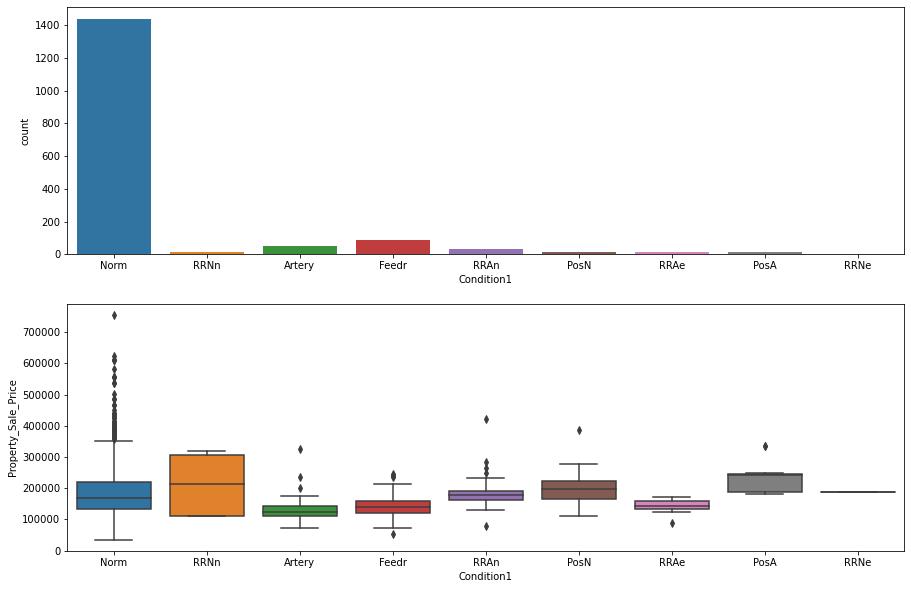

In [110]:
bi_var_analysis('Condition1')

#### Condition2

Basic EDA of Condition2

description    Proximity to various conditions (if more than one is present)
Name: Condition2, dtype: object


Unique values in Condition2 are ['Norm' 'Feedr' 'PosA' 'RRAn' 'PosN' 'Artery']

Norm      1645
Feedr     6   
Artery    2   
PosN      2   
RRAn      2   
PosA      1   
Name: Condition2, dtype: int64


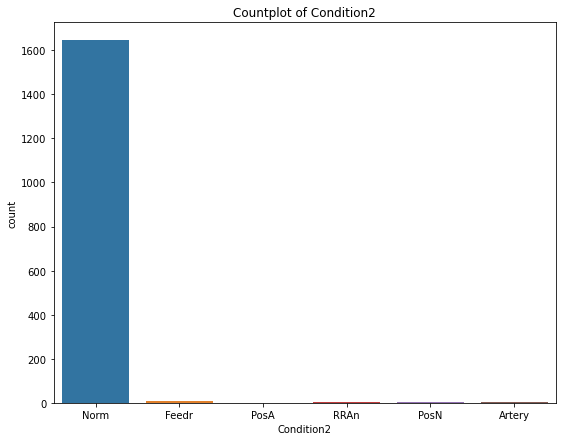

In [111]:
uni_var_analysis('Condition2')

Relationship between Condition2 and Property_Sale_Price

description    Proximity to various conditions (if more than one is present)
Name: Condition2, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Condition2 are : ['Norm' 'Feedr' 'PosA' 'RRAn' 'PosN' 'Artery']


Ho:  All the levels in Condition2 have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Condition2 with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df         F    PR(>F)
C(Condition2)  8.129193e+10  5.0     2.607402  0.023401
Residual       1.030100e+13  1652.0 NaN       NaN      


Reject null hypothesis,  There is a significant difference between the levels of Condition2 with respect to Property_Sale_Price mean


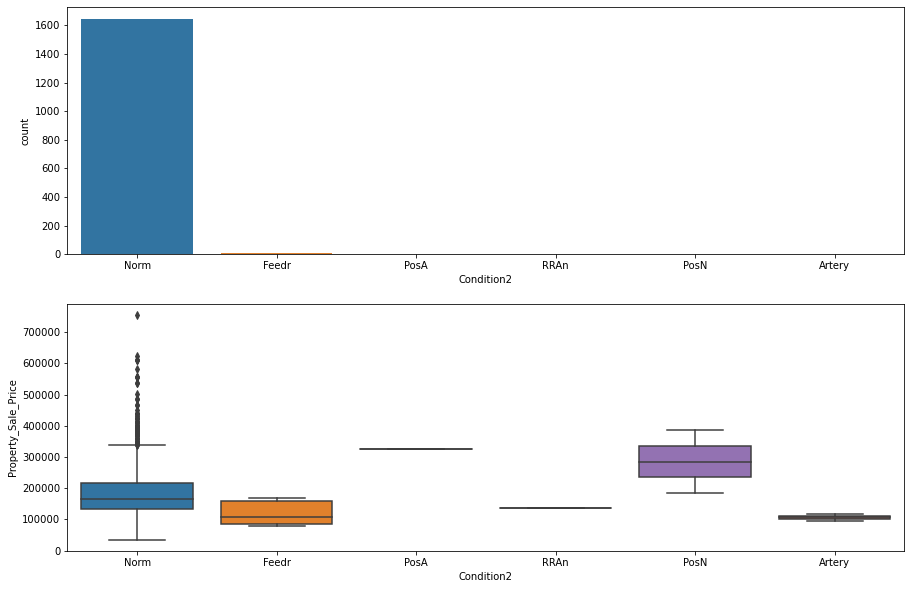

In [112]:
bi_var_analysis('Condition2')

#### Dwelling_Type

Basic EDA of Dwelling_Type

description    Type of dwelling
Name: Dwelling_Type, dtype: object


Unique values in Dwelling_Type are ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']

1Fam      1377
TwnhsE    132 
Duplex    65  
Twnhs     47  
2fmCon    37  
Name: Dwelling_Type, dtype: int64


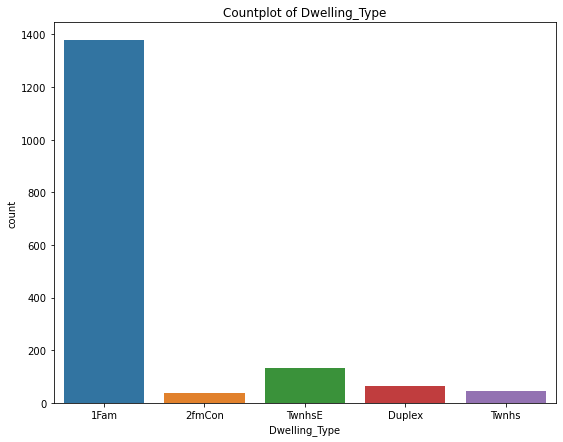

In [113]:
uni_var_analysis('Dwelling_Type')

Relationship between Dwelling_Type and Property_Sale_Price

description    Type of dwelling
Name: Dwelling_Type, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Dwelling_Type are : ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']


Ho:  All the levels in Dwelling_Type have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Dwelling_Type with respect to Property_Sale_Price mean


Test Results 

                        sum_sq      df          F        PR(>F)
C(Dwelling_Type)  4.291234e+11  4.0     17.816957  2.481821e-14
Residual          9.953172e+12  1653.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of Dwelling_Type with respect to Property_Sale_Price mean


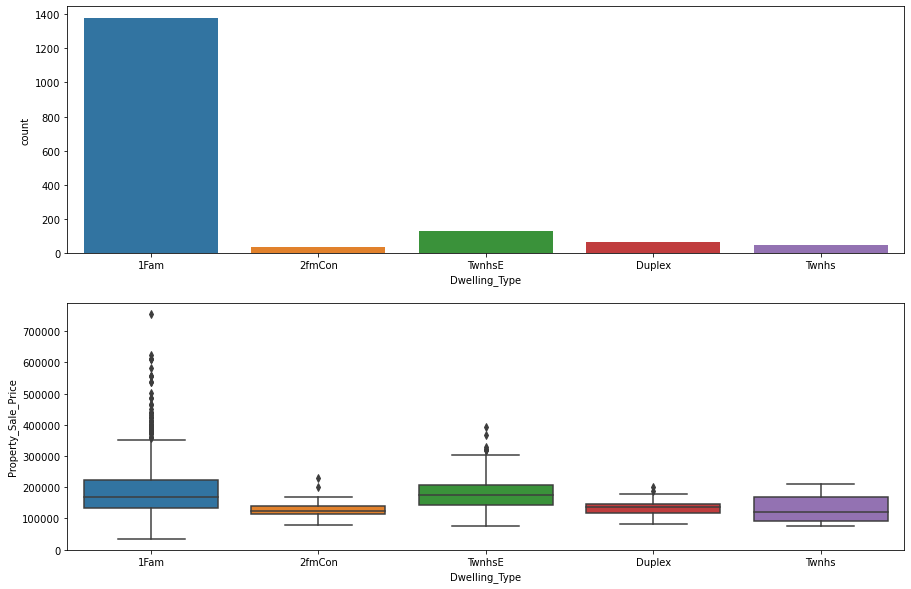

In [114]:
bi_var_analysis('Dwelling_Type')

#### HouseStyle

Basic EDA of HouseStyle

description    Style of dwelling
Name: HouseStyle, dtype: object


Unique values in HouseStyle are ['SLvl' '1Story' 'SFoyer' '1.5Fin' '2Story' '2.5Unf' '2.5Fin' '1.5Unf']

1Story    810
2Story    524
1.5Fin    178
SLvl      68 
SFoyer    46 
2.5Unf    14 
1.5Unf    10 
2.5Fin    8  
Name: HouseStyle, dtype: int64


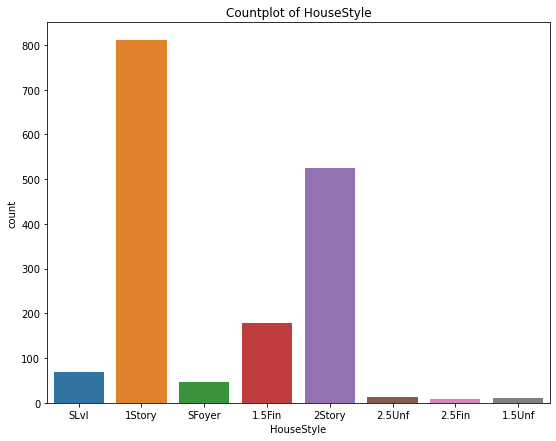

In [115]:
uni_var_analysis('HouseStyle')

Relationship between HouseStyle and Property_Sale_Price

description    Style of dwelling
Name: HouseStyle, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in HouseStyle are : ['SLvl' '1Story' 'SFoyer' '1.5Fin' '2Story' '2.5Unf' '2.5Fin' '1.5Unf']


Ho:  All the levels in HouseStyle have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of HouseStyle with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df          F        PR(>F)
C(HouseStyle)  8.739446e+11  7.0     21.665296  3.925791e-28
Residual       9.508350e+12  1650.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of HouseStyle with respect to Property_Sale_Price mean


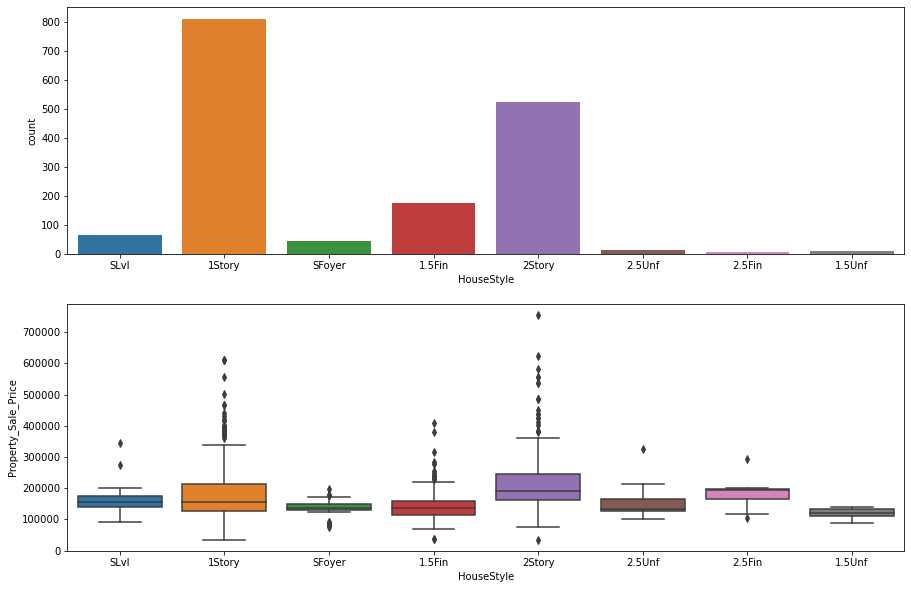

In [116]:
bi_var_analysis('HouseStyle')

#### OverallQual

Basic EDA of OverallQual

description    Rates the overall material and finish of the house
Name: OverallQual, dtype: object




There are 2 outliers in the OverallQual column.


Skewness:  0.18531350444305034
Kurtosis:  -0.5072669928422968


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.949
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


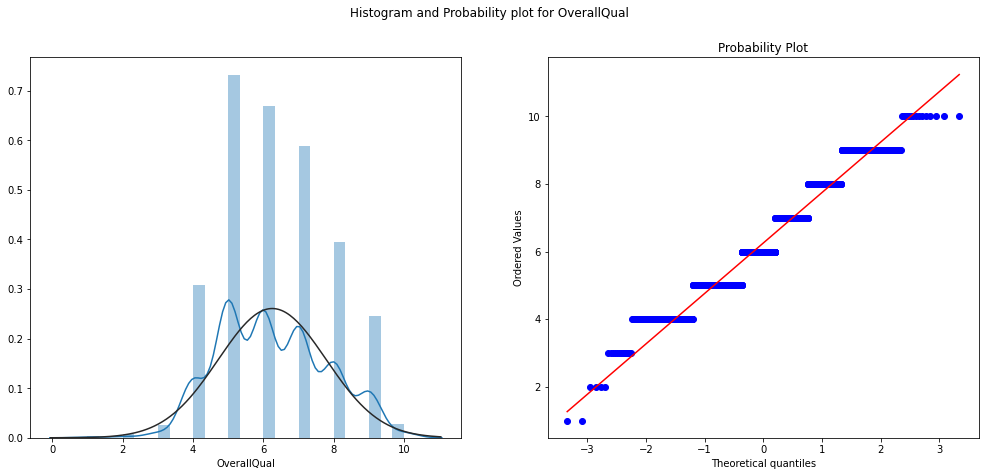

In [117]:
uni_var_analysis('OverallQual')

Relationship between OverallQual and Property_Sale_Price

description    Rates the overall material and finish of the house
Name: OverallQual, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.546


Lets see the relation between OverallQual and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.6535079915705256
Intercept:  0.1249547324734521
R-value:  0.5272945697831629
p-value:  2.6224538180458324e-119
Std error:  0.025877608441237897


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


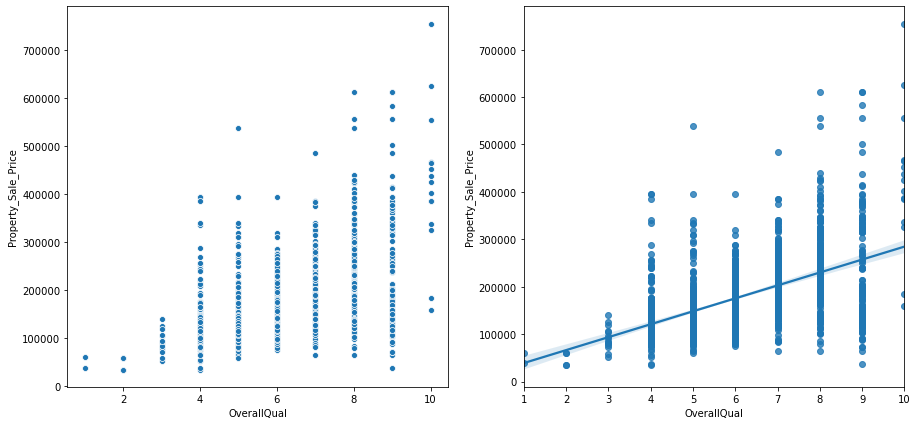

In [118]:
bi_var_analysis('OverallQual')

#### OverallCond

Basic EDA of OverallCond

description    Rates the overall condition of the house
Name: OverallCond, dtype: object




There are 1 outliers in the OverallCond column.


Skewness:  0.6348158972779775
Kurtosis:  0.0007202197152422762


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.879
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


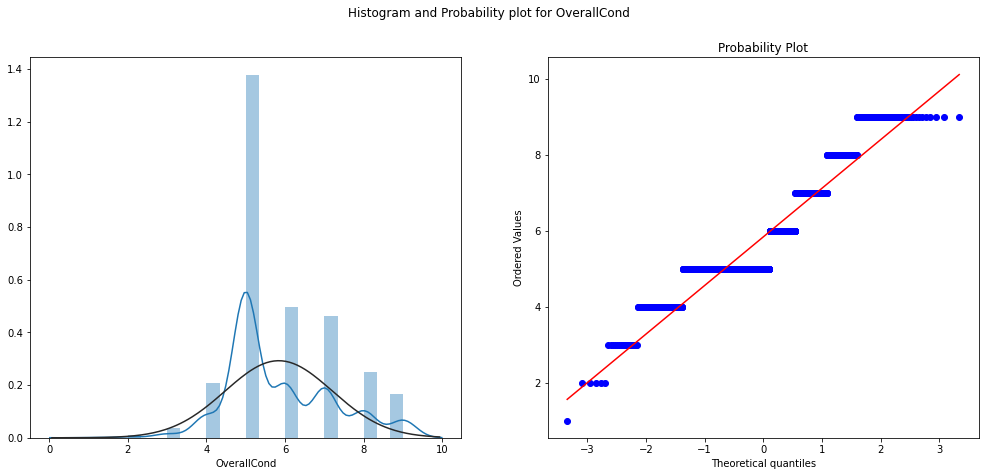

In [119]:
uni_var_analysis('OverallCond')

Relationship between OverallCond and Property_Sale_Price

description    Rates the overall condition of the house
Name: OverallCond, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.108


Lets see the relation between OverallCond and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.08258971254001515
Intercept:  0.24173095177471574
R-value:  -0.059404257287419784
p-value:  0.015556084953672845
Std error:  0.03410441302008825


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


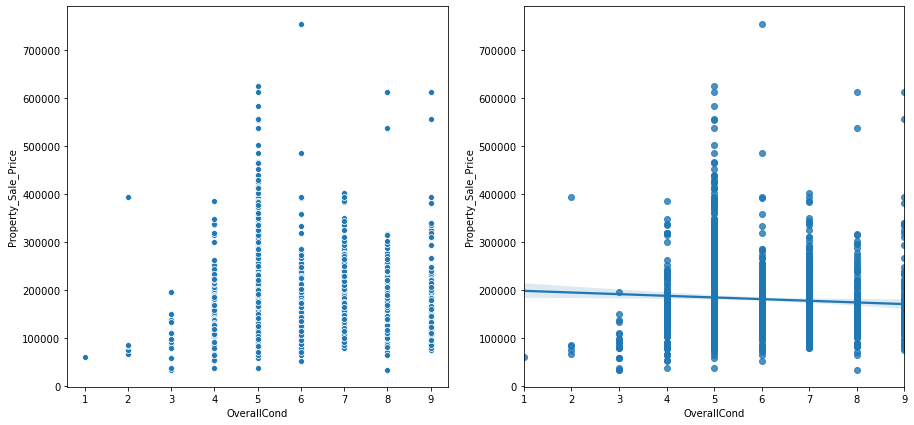

In [120]:
bi_var_analysis('OverallCond')

#### YearBuilt

Basic EDA of YearBuilt

description    Original construction date
Name: YearBuilt, dtype: object




There are 1 outliers in the YearBuilt column.


Skewness:  -0.5293167555223233
Kurtosis:  -0.5936114037428082


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.935
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


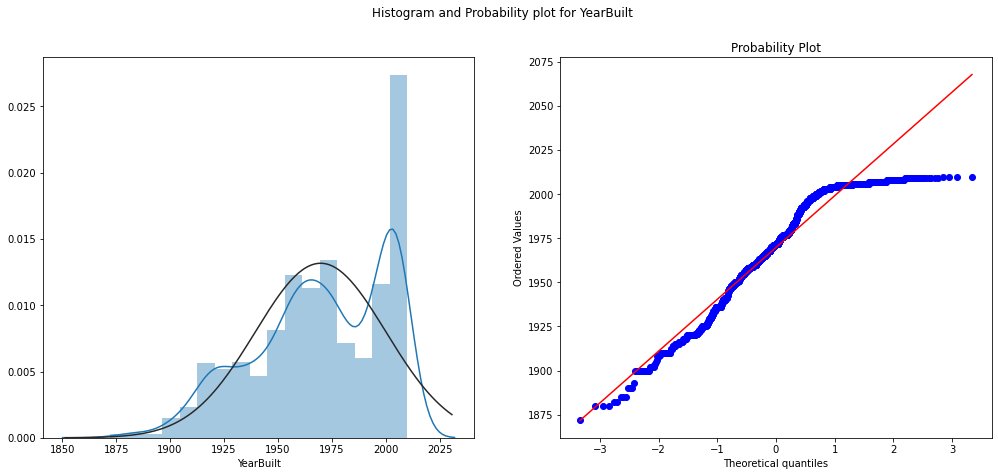

In [121]:
uni_var_analysis('YearBuilt')

Relationship between YearBuilt and Property_Sale_Price

description    Original construction date
Name: YearBuilt, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.549


Lets see the relation between YearBuilt and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.6772665727342113
Intercept:  0.2378806022960075
R-value:  0.4417205512016115
p-value:  3.915826761156975e-80
Std error:  0.03380245431522604


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


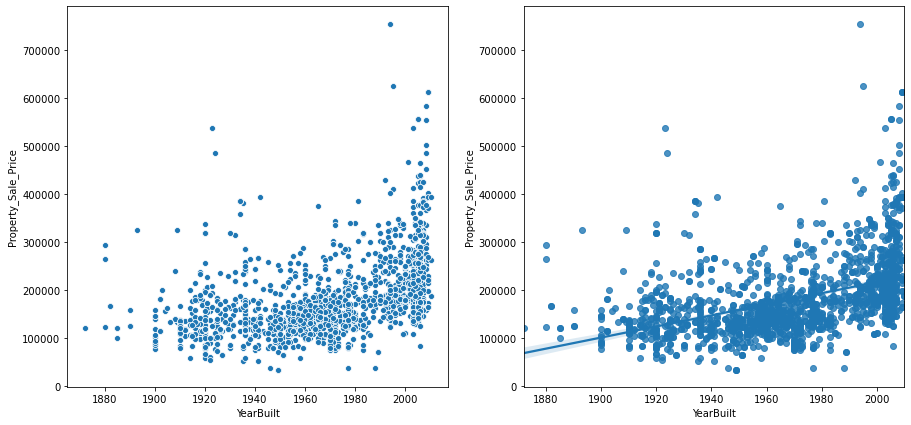

In [122]:
bi_var_analysis('YearBuilt')

#### YearRemodAdd

Basic EDA of YearRemodAdd

description    Remodel date (same as construction date if no remodeling or additions)
Name: YearRemodAdd, dtype: object




There are 0 outliers in the YearRemodAdd column.


Skewness:  -0.614486513842424
Kurtosis:  -1.0328046273809328


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.876
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


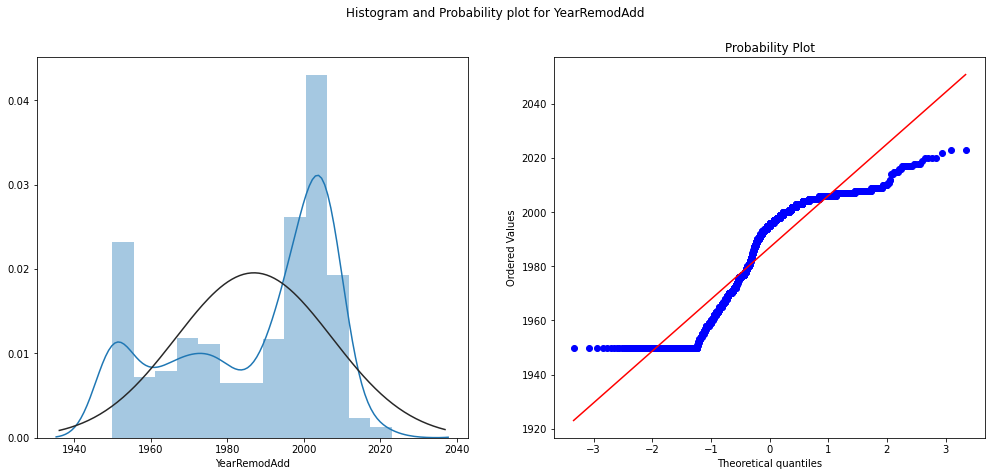

In [123]:
uni_var_analysis('YearRemodAdd')

Relationship between YearRemodAdd and Property_Sale_Price

description    Remodel date (same as construction date if no remodeling or additions)
Name: YearRemodAdd, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.527


Lets see the relation between YearRemodAdd and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.7647228145591536
Intercept:  0.3826940380747437
R-value:  0.47013416522713547
p-value:  6.311832987220815e-92
Std error:  0.03527877623791008


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


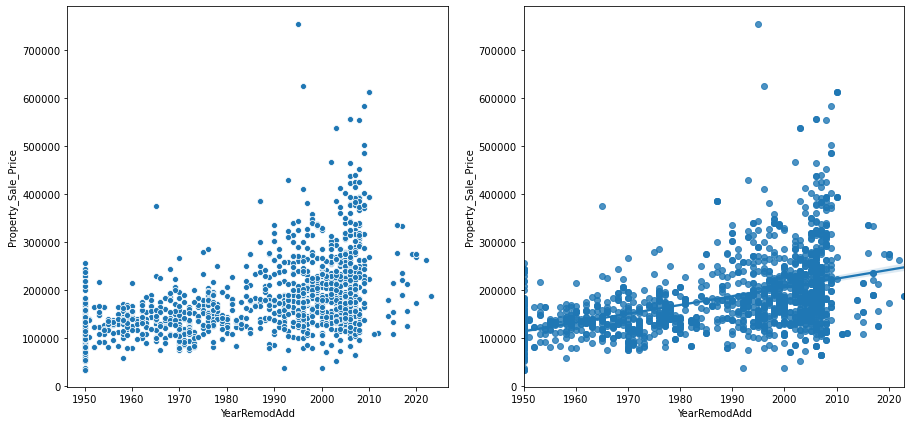

In [124]:
bi_var_analysis('YearRemodAdd')

#### RoofStyle

Basic EDA of RoofStyle

description    Type of roof
Name: RoofStyle, dtype: object


Unique values in RoofStyle are ['Gable' 'Hip' 'Flat' 'Gambrel' 'Mansard']

Gable      1291
Hip        337 
Flat       15  
Gambrel    9   
Mansard    6   
Name: RoofStyle, dtype: int64


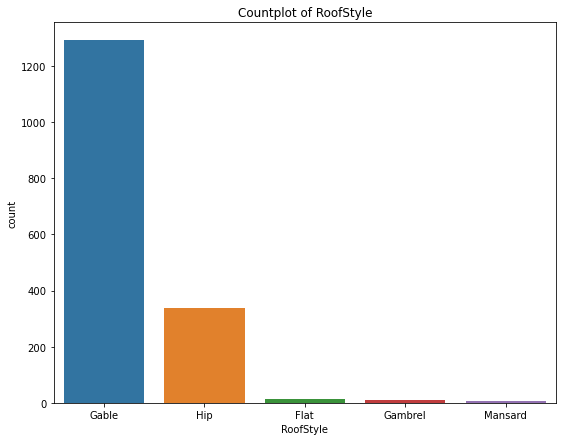

In [125]:
uni_var_analysis('RoofStyle')

Relationship between RoofStyle and Property_Sale_Price

description    Type of roof
Name: RoofStyle, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in RoofStyle are : ['Gable' 'Hip' 'Flat' 'Gambrel' 'Mansard']


Ho:  All the levels in RoofStyle have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of RoofStyle with respect to Property_Sale_Price mean


Test Results 

                    sum_sq      df          F        PR(>F)
C(RoofStyle)  6.101079e+11  4.0     25.800476  9.056145e-21
Residual      9.772187e+12  1653.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of RoofStyle with respect to Property_Sale_Price mean


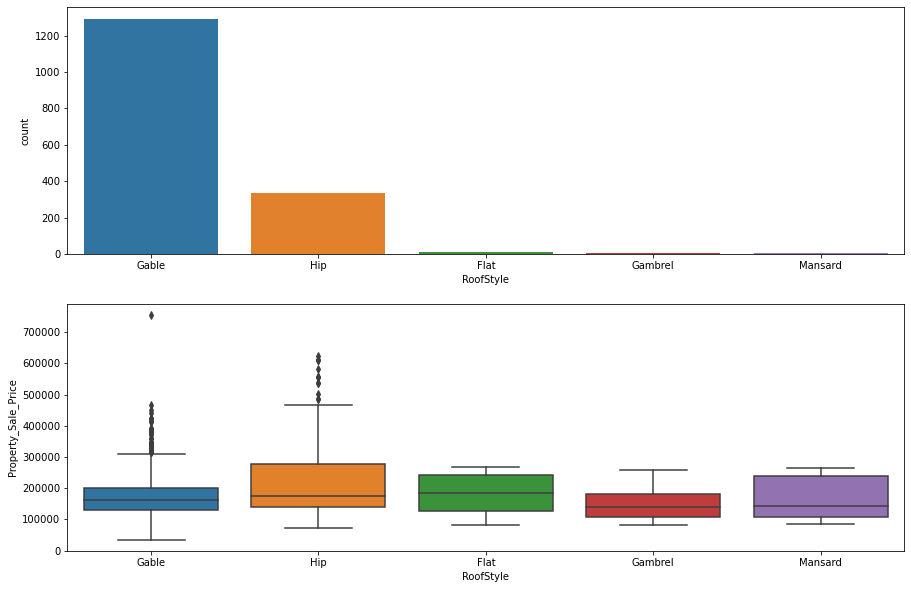

In [126]:
bi_var_analysis('RoofStyle')

#### RoofMatl

Basic EDA of RoofMatl

description    Roof material
Name: RoofMatl, dtype: object


Unique values in RoofMatl are ['CompShg' 'ClyTile' 'Tar&Grv' 'WdShngl' 'Membran' 'WdShake' 'Roll']

CompShg    1631
Tar&Grv    13  
WdShngl    8   
WdShake    3   
Membran    1   
ClyTile    1   
Roll       1   
Name: RoofMatl, dtype: int64


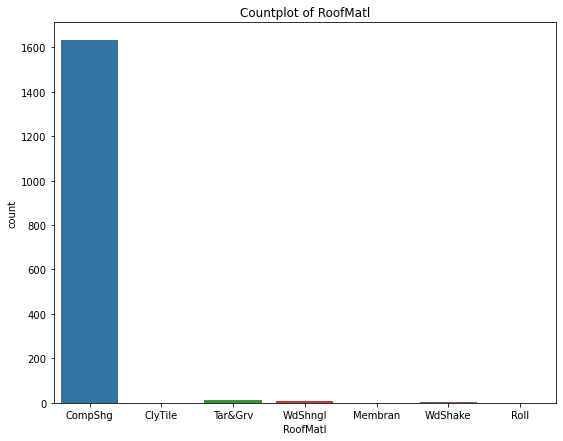

In [127]:
uni_var_analysis('RoofMatl')

Relationship between RoofMatl and Property_Sale_Price

description    Roof material
Name: RoofMatl, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in RoofMatl are : ['CompShg' 'ClyTile' 'Tar&Grv' 'WdShngl' 'Membran' 'WdShake' 'Roll']


Ho:  All the levels in RoofMatl have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of RoofMatl with respect to Property_Sale_Price mean


Test Results 

                   sum_sq      df         F        PR(>F)
C(RoofMatl)  3.354852e+11  6.0     9.188422  6.430989e-10
Residual     1.004681e+13  1651.0 NaN       NaN          


Reject null hypothesis,  There is a significant difference between the levels of RoofMatl with respect to Property_Sale_Price mean


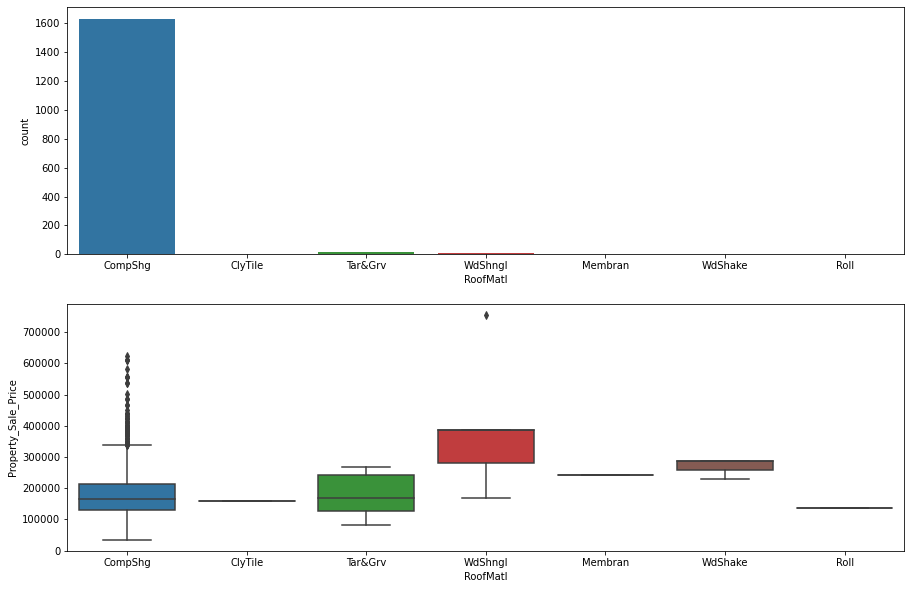

In [128]:
bi_var_analysis('RoofMatl')

#### Exterior1st

Basic EDA of Exterior1st

description    Exterior covering on the house
Name: Exterior1st, dtype: object


Unique values in Exterior1st are ['VinylSd' 'HdBoard' 'MetalSd' 'Wd Sdng' 'WdShing' 'Plywood' 'AsbShng'
 'BrkFace' 'Stucco' 'BrkComm' 'CemntBd' 'CBlock' 'ImStucc' 'Stone'
 'AsphShn']

VinylSd    616
MetalSd    246
HdBoard    246
Wd Sdng    227
Plywood    118
CemntBd    70 
BrkFace    53 
WdShing    32 
Stucco     20 
AsbShng    20 
BrkComm    3  
Stone      3  
AsphShn    2  
ImStucc    1  
CBlock     1  
Name: Exterior1st, dtype: int64


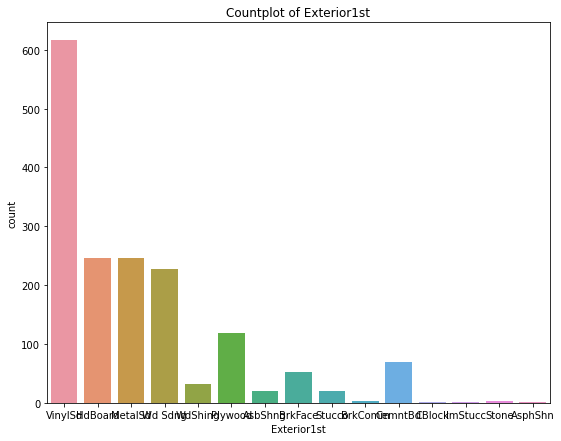

In [129]:
uni_var_analysis('Exterior1st')

Relationship between Exterior1st and Property_Sale_Price

description    Exterior covering on the house
Name: Exterior1st, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Exterior1st are : ['VinylSd' 'HdBoard' 'MetalSd' 'Wd Sdng' 'WdShing' 'Plywood' 'AsbShng'
 'BrkFace' 'Stucco' 'BrkComm' 'CemntBd' 'CBlock' 'ImStucc' 'Stone'
 'AsphShn']


Ho:  All the levels in Exterior1st have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Exterior1st with respect to Property_Sale_Price mean


Test Results 

                      sum_sq      df          F        PR(>F)
C(Exterior1st)  1.667797e+12  14.0    22.460034  2.614282e-53
Residual        8.714498e+12  1643.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of Exterior1st with respect to Property_Sale_Price mean


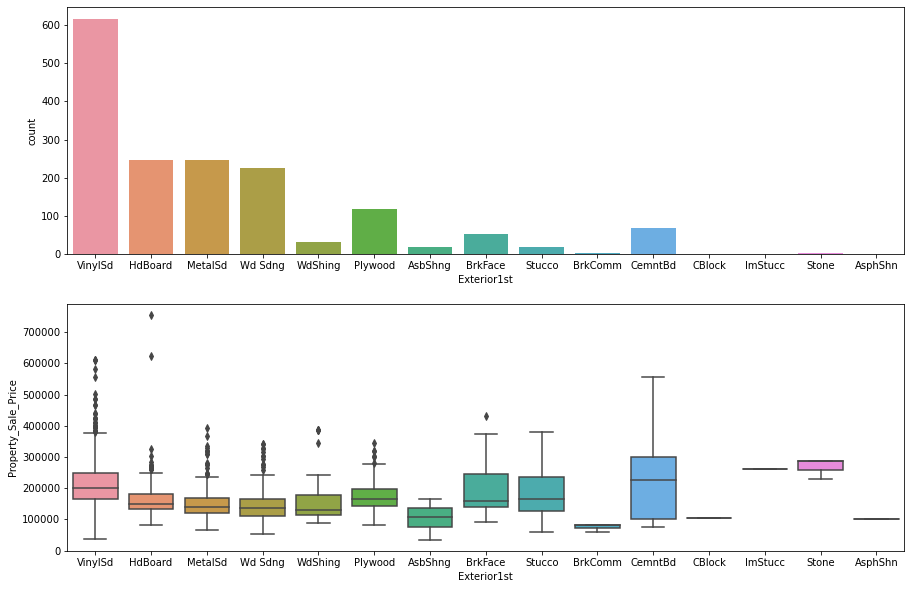

In [130]:
bi_var_analysis('Exterior1st')

#### Exterior2nd

Basic EDA of Exterior2nd

description    Exterior covering on the house (if more than one material)
Name: Exterior2nd, dtype: object


Unique values in Exterior2nd are ['VinylSd' 'HdBoard' 'MetalSd' 'Wd Sdng' 'Wd Shng' 'Plywood' 'Stucco'
 'AsbShng' 'Brk Cmn' 'CmentBd' 'BrkFace' 'CBlock' 'ImStucc' 'Stone'
 'Other' 'AsphShn']

VinylSd    595
MetalSd    239
HdBoard    231
Wd Sdng    220
Plywood    154
CmentBd    68 
Wd Shng    50 
BrkFace    24 
AsbShng    23 
Stucco     20 
ImStucc    13 
Brk Cmn    10 
Stone      6  
AsphShn    3  
CBlock     1  
Other      1  
Name: Exterior2nd, dtype: int64


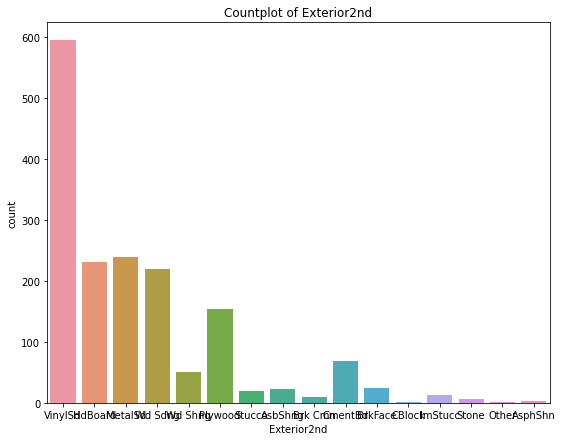

In [131]:
uni_var_analysis('Exterior2nd')

Relationship between Exterior2nd and Property_Sale_Price

description    Exterior covering on the house (if more than one material)
Name: Exterior2nd, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Exterior2nd are : ['VinylSd' 'HdBoard' 'MetalSd' 'Wd Sdng' 'Wd Shng' 'Plywood' 'Stucco'
 'AsbShng' 'Brk Cmn' 'CmentBd' 'BrkFace' 'CBlock' 'ImStucc' 'Stone'
 'Other' 'AsphShn']


Ho:  All the levels in Exterior2nd have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Exterior2nd with respect to Property_Sale_Price mean


Test Results 

                      sum_sq      df          F        PR(>F)
C(Exterior2nd)  1.628275e+12  15.0    20.361147  4.451771e-51
Residual        8.754020e+12  1642.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of Exterior2nd with respect to Property_Sale_Price mean


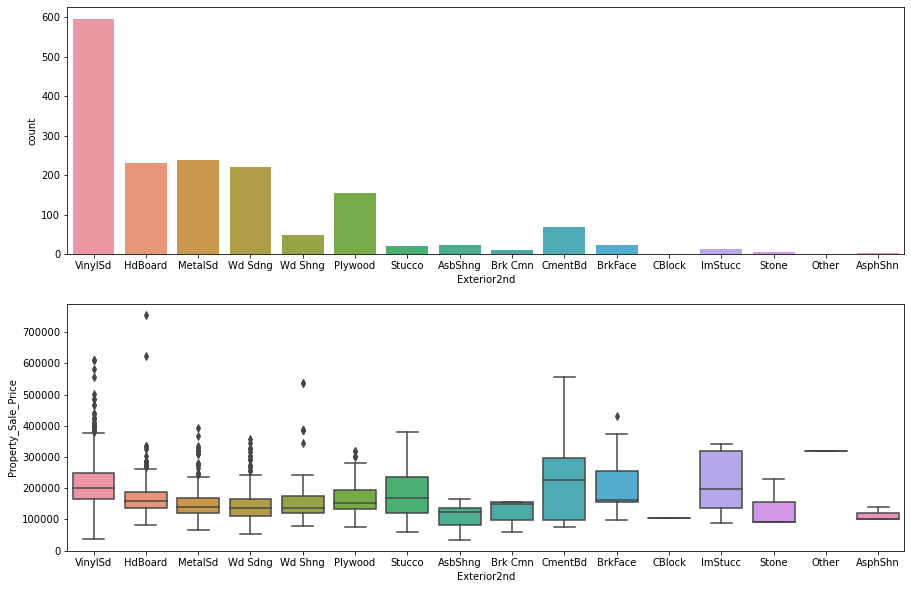

In [132]:
bi_var_analysis('Exterior2nd')

#### MasVnrType

Basic EDA of MasVnrType

description    Masonry veneer type
Name: MasVnrType, dtype: object


Unique values in MasVnrType are ['BrkFace' 'None' 'Stone' 'BrkCmn']

None       987
BrkFace    502
Stone      153
BrkCmn     16 
Name: MasVnrType, dtype: int64


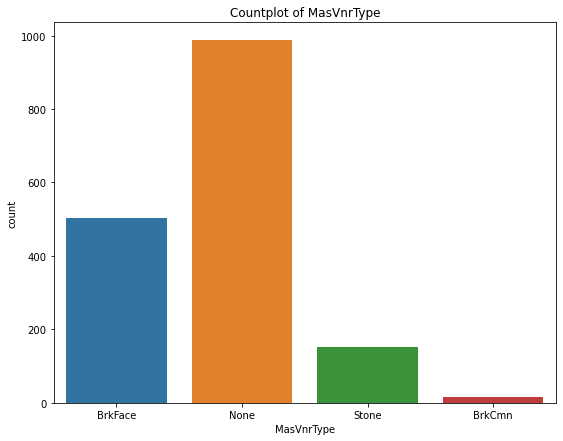

In [133]:
uni_var_analysis('MasVnrType')

Relationship between MasVnrType and Property_Sale_Price

description    Masonry veneer type
Name: MasVnrType, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in MasVnrType are : ['BrkFace' 'None' 'Stone' 'BrkCmn']


Ho:  All the levels in MasVnrType have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of MasVnrType with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df           F        PR(>F)
C(MasVnrType)  2.137656e+12  3.0     142.948779  2.336512e-82
Residual       8.244639e+12  1654.0 NaN         NaN          


Reject null hypothesis,  There is a significant difference between the levels of MasVnrType with respect to Property_Sale_Price mean


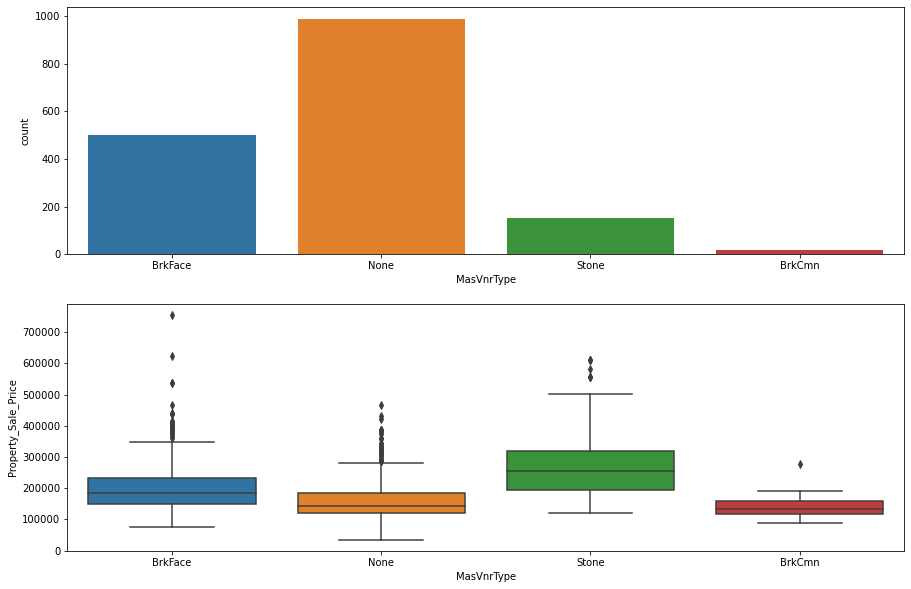

In [134]:
bi_var_analysis('MasVnrType')

#### MasVnrArea

Basic EDA of MasVnrArea

description    Masonry veneer area in square feet
Name: MasVnrArea, dtype: object




There are 120 outliers in the MasVnrArea column.


Skewness:  2.4239521313489796
Kurtosis:  7.256761204769623


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.644
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


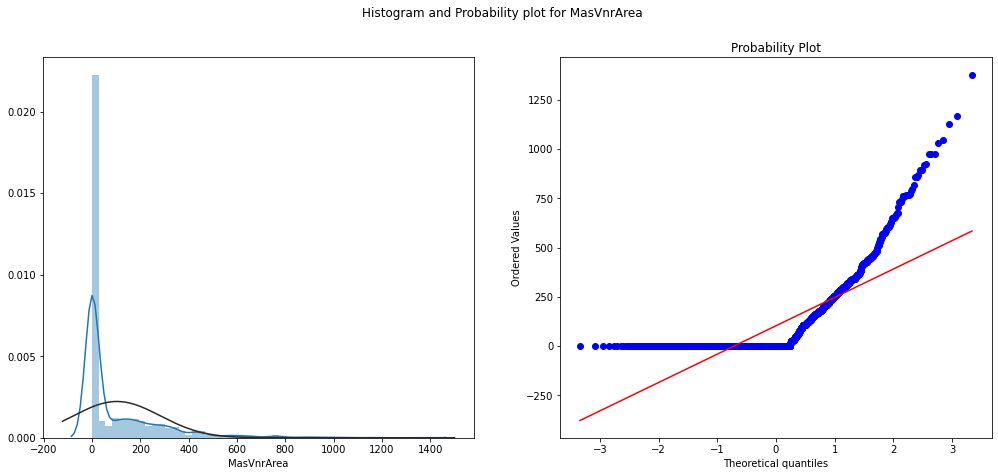

In [135]:
uni_var_analysis('MasVnrArea')

Relationship between MasVnrArea and Property_Sale_Price

description    Masonry veneer area in square feet
Name: MasVnrArea, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.428


Lets see the relation between MasVnrArea and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.4322523704064363
Intercept:  -0.07038678263824691
R-value:  0.5106390424161698
p-value:  8.74237011869819e-111
Std error:  0.017884969810500365


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


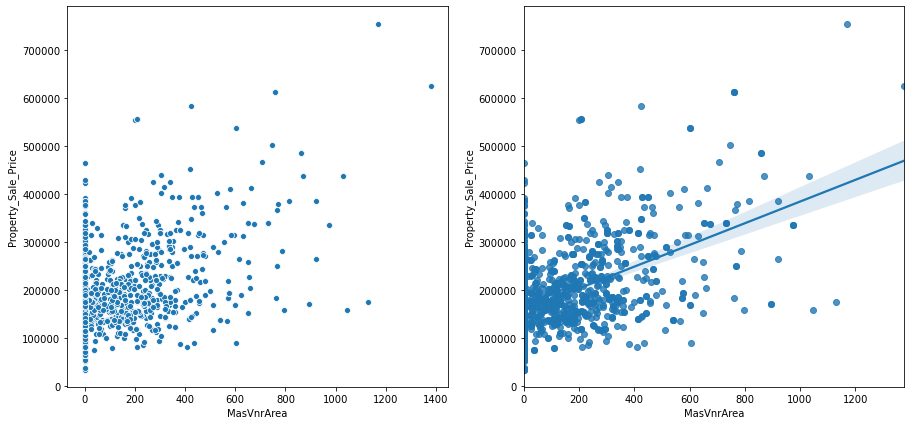

In [136]:
bi_var_analysis('MasVnrArea')

#### ExterQual

Basic EDA of ExterQual

description    Evaluates the quality of the material on the exterior
Name: ExterQual, dtype: object


Unique values in ExterQual are ['Gd' 'TA' 'Fa' 'Ex']

TA    1013
Gd    561 
Ex    68  
Fa    16  
Name: ExterQual, dtype: int64


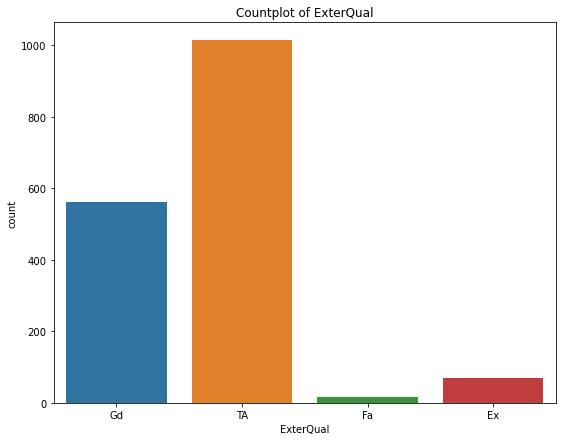

In [137]:
uni_var_analysis('ExterQual')

Relationship between ExterQual and Property_Sale_Price

description    Evaluates the quality of the material on the exterior
Name: ExterQual, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in ExterQual are : ['Gd' 'TA' 'Fa' 'Ex']


Ho:  All the levels in ExterQual have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of ExterQual with respect to Property_Sale_Price mean


Test Results 

                    sum_sq      df           F         PR(>F)
C(ExterQual)  4.998918e+12  3.0     511.959337  2.888558e-235
Residual      5.383377e+12  1654.0 NaN         NaN           


Reject null hypothesis,  There is a significant difference between the levels of ExterQual with respect to Property_Sale_Price mean


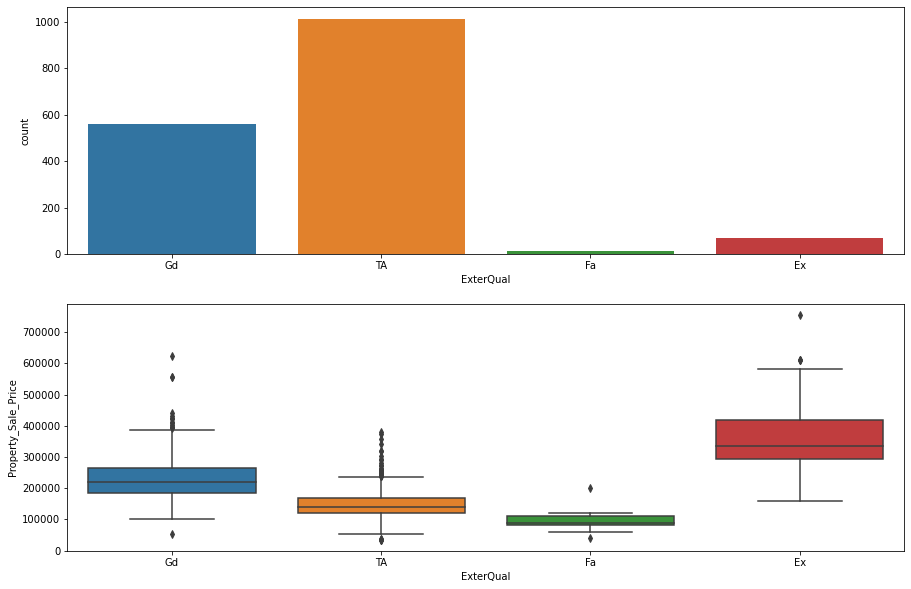

In [138]:
bi_var_analysis('ExterQual')

#### ExterCond

Basic EDA of ExterCond

description    Evaluates the present condition of the material on the exterior
Name: ExterCond, dtype: object


Unique values in ExterCond are ['TA' 'Gd' 'Ex' 'Fa' 'Po']

TA    1453
Gd    171 
Fa    30  
Ex    3   
Po    1   
Name: ExterCond, dtype: int64


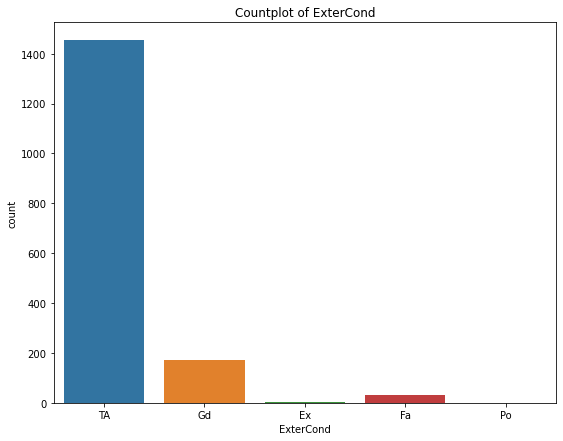

In [139]:
uni_var_analysis('ExterCond')

Relationship between ExterCond and Property_Sale_Price

description    Evaluates the present condition of the material on the exterior
Name: ExterCond, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in ExterCond are : ['TA' 'Gd' 'Ex' 'Fa' 'Po']


Ho:  All the levels in ExterCond have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of ExterCond with respect to Property_Sale_Price mean


Test Results 

                    sum_sq      df         F        PR(>F)
C(ExterCond)  2.193022e+11  4.0     8.917316  4.009457e-07
Residual      1.016299e+13  1653.0 NaN       NaN          


Reject null hypothesis,  There is a significant difference between the levels of ExterCond with respect to Property_Sale_Price mean


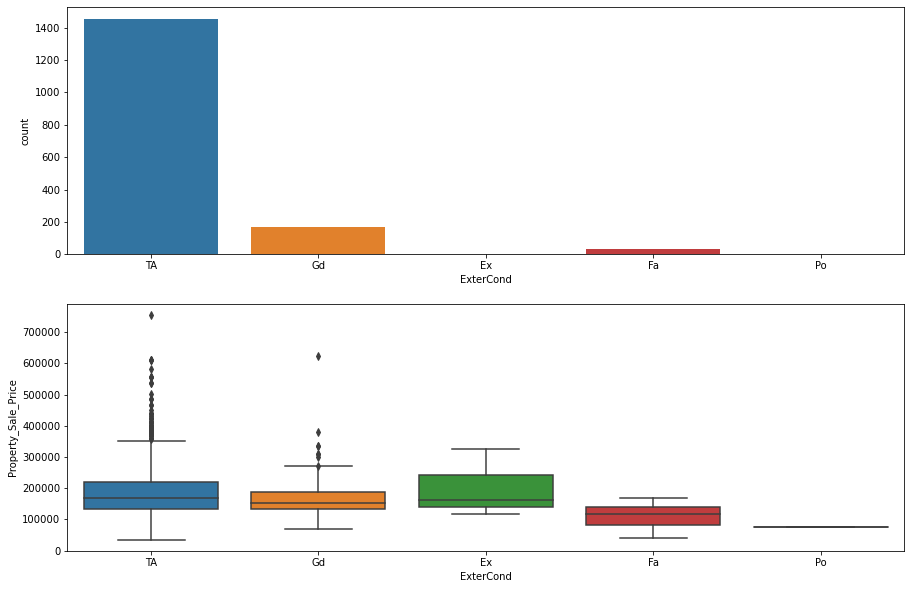

In [140]:
bi_var_analysis('ExterCond')

#### Foundation

Basic EDA of Foundation

description    Type of foundation
Name: Foundation, dtype: object


Unique values in Foundation are ['PConc' 'CBlock' 'BrkTil' 'Slab' 'Stone' 'Wood']

PConc     746
CBlock    721
BrkTil    149
Slab      30 
Stone     9  
Wood      3  
Name: Foundation, dtype: int64


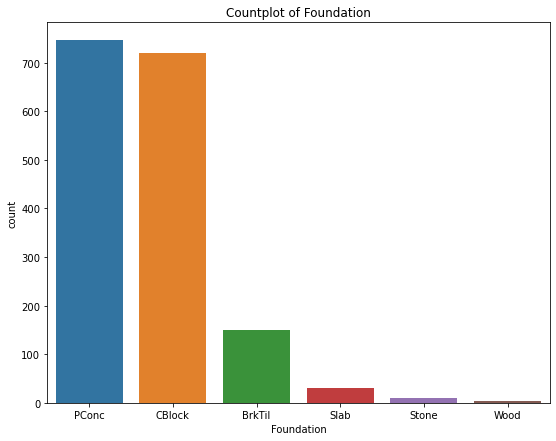

In [141]:
uni_var_analysis('Foundation')

Relationship between Foundation and Property_Sale_Price

description    Type of foundation
Name: Foundation, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Foundation are : ['PConc' 'CBlock' 'BrkTil' 'Slab' 'Stone' 'Wood']


Ho:  All the levels in Foundation have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Foundation with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df           F         PR(>F)
C(Foundation)  2.767922e+12  5.0     120.104606  1.463114e-108
Residual       7.614373e+12  1652.0 NaN         NaN           


Reject null hypothesis,  There is a significant difference between the levels of Foundation with respect to Property_Sale_Price mean


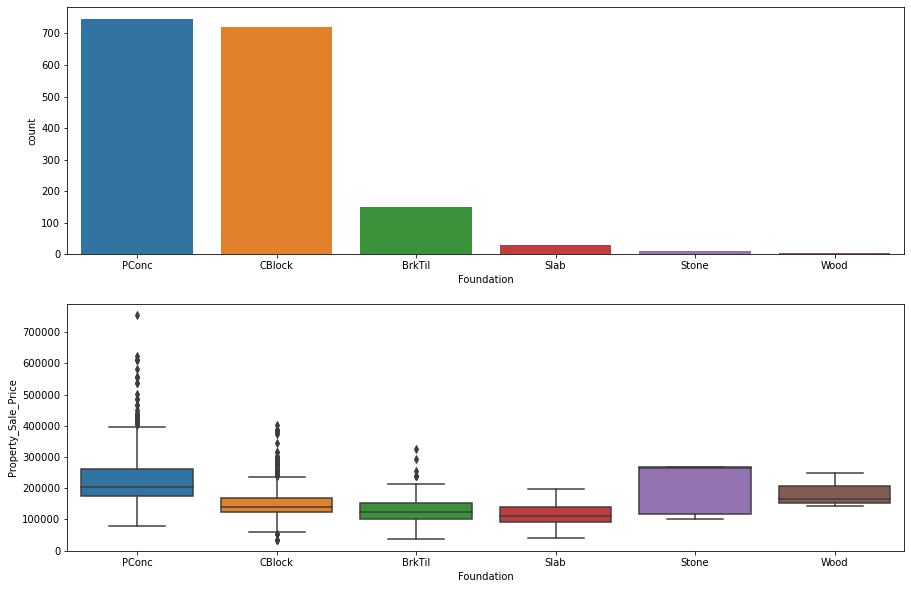

In [142]:
bi_var_analysis('Foundation')

#### BsmtQual

Basic EDA of BsmtQual

description    Evaluates the height of the basement
Name: BsmtQual, dtype: object


Unique values in BsmtQual are ['Ex' 'TA' 'Gd' 'Fa']

Gd    763
TA    709
Ex    145
Fa    41 
Name: BsmtQual, dtype: int64


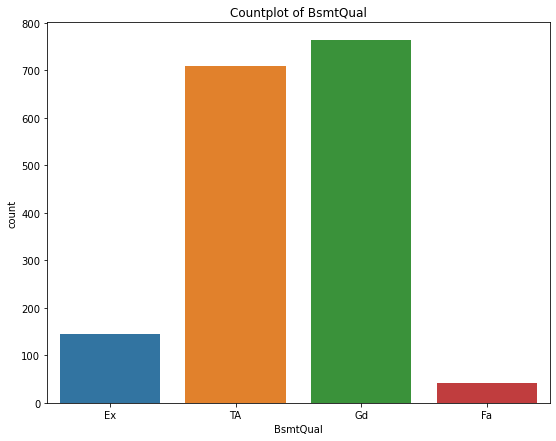

In [143]:
uni_var_analysis('BsmtQual')

Relationship between BsmtQual and Property_Sale_Price

description    Evaluates the height of the basement
Name: BsmtQual, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in BsmtQual are : ['Ex' 'TA' 'Gd' 'Fa']


Ho:  All the levels in BsmtQual have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of BsmtQual with respect to Property_Sale_Price mean


Test Results 

                   sum_sq      df           F         PR(>F)
C(BsmtQual)  4.503485e+12  3.0     422.350963  1.143237e-203
Residual     5.878810e+12  1654.0 NaN         NaN           


Reject null hypothesis,  There is a significant difference between the levels of BsmtQual with respect to Property_Sale_Price mean


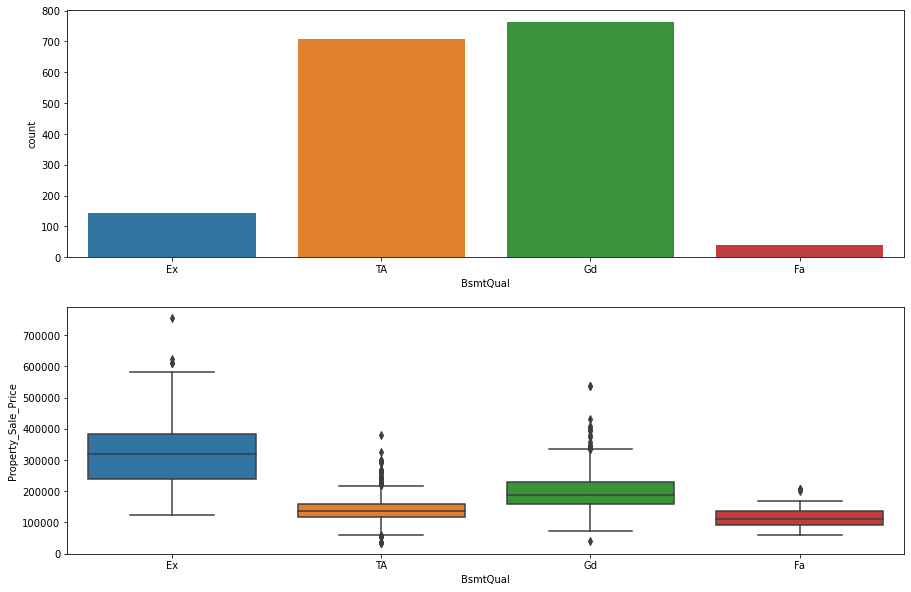

In [144]:
bi_var_analysis('BsmtQual')

#### BsmtCond

Basic EDA of BsmtCond

description    Evaluates the general condition of the basement
Name: BsmtCond, dtype: object


Unique values in BsmtCond are ['TA' 'Gd' 'Fa' 'Po']

TA    1522
Gd    82  
Fa    52  
Po    2   
Name: BsmtCond, dtype: int64


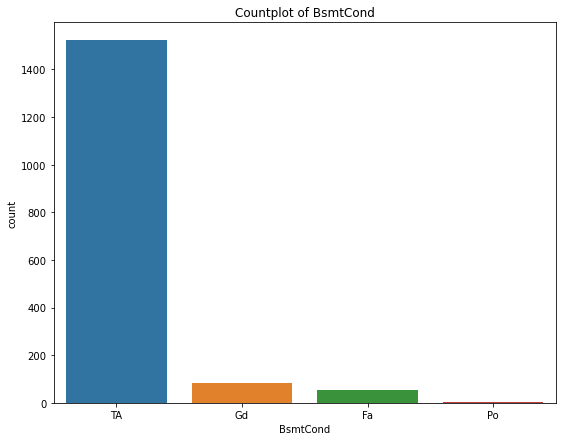

In [145]:
uni_var_analysis('BsmtCond')

Relationship between BsmtCond and Property_Sale_Price

description    Evaluates the general condition of the basement
Name: BsmtCond, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in BsmtCond are : ['TA' 'Gd' 'Fa' 'Po']


Ho:  All the levels in BsmtCond have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of BsmtCond with respect to Property_Sale_Price mean


Test Results 

                   sum_sq      df          F        PR(>F)
C(BsmtCond)  2.972776e+11  3.0     16.251736  2.062798e-10
Residual     1.008502e+13  1654.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of BsmtCond with respect to Property_Sale_Price mean


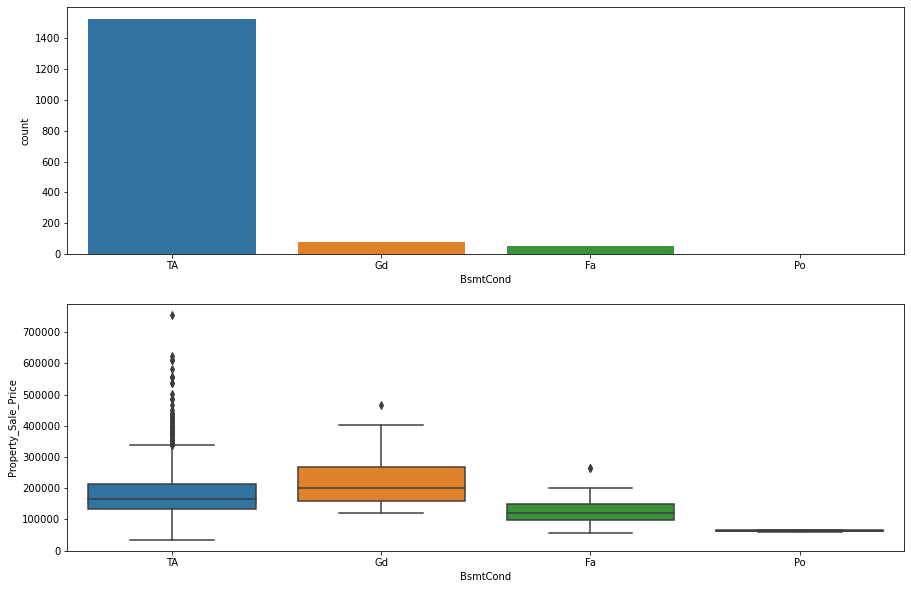

In [146]:
bi_var_analysis('BsmtCond')

#### BsmtExposure

Basic EDA of BsmtExposure

description    Refers to walkout or garden level walls
Name: BsmtExposure, dtype: object


Unique values in BsmtExposure are ['Av' 'No' 'Mn' 'Gd']

No    1115
Av    264 
Gd    152 
Mn    127 
Name: BsmtExposure, dtype: int64


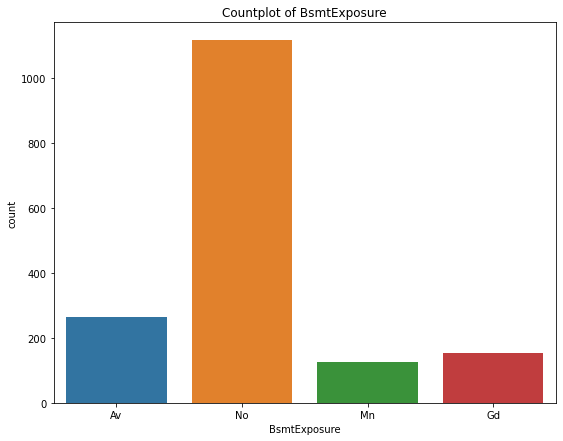

In [147]:
uni_var_analysis('BsmtExposure')

Relationship between BsmtExposure and Property_Sale_Price

description    Refers to walkout or garden level walls
Name: BsmtExposure, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in BsmtExposure are : ['Av' 'No' 'Mn' 'Gd']


Ho:  All the levels in BsmtExposure have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of BsmtExposure with respect to Property_Sale_Price mean


Test Results 

                       sum_sq      df          F        PR(>F)
C(BsmtExposure)  1.359841e+12  3.0     83.095511  4.473442e-50
Residual         9.022454e+12  1654.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of BsmtExposure with respect to Property_Sale_Price mean


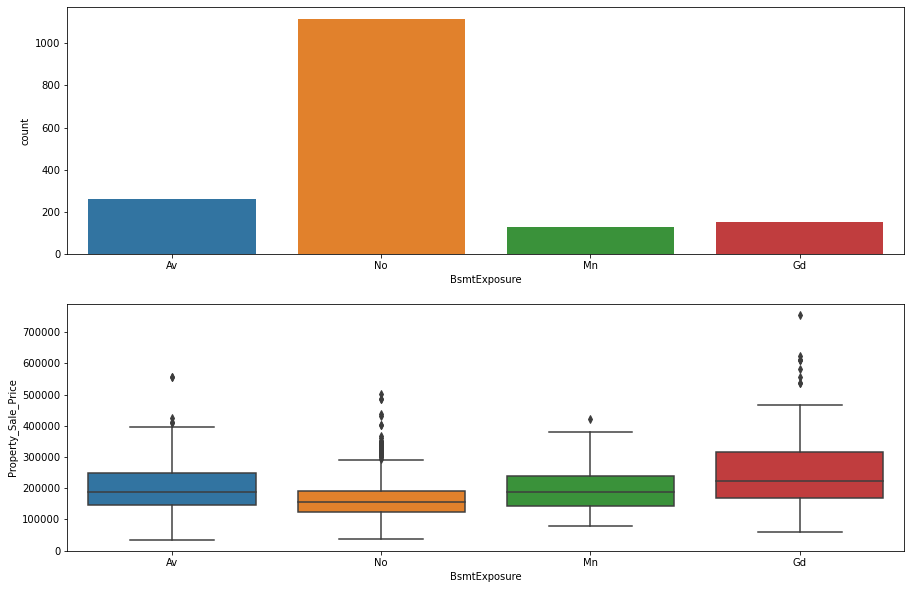

In [148]:
bi_var_analysis('BsmtExposure')

#### BsmtFinType1

Basic EDA of BsmtFinType1

description    Rating of basement finished area
Name: BsmtFinType1, dtype: object


Unique values in BsmtFinType1 are ['GLQ' 'ALQ' 'BLQ' 'Unf' 'LwQ' 'Rec']

GLQ    538
Unf    479
ALQ    254
BLQ    167
Rec    134
LwQ    86 
Name: BsmtFinType1, dtype: int64


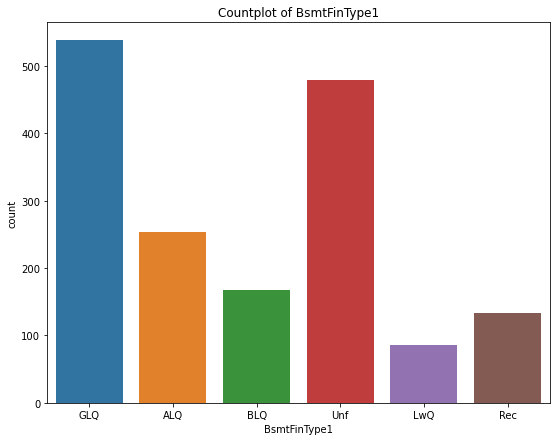

In [149]:
uni_var_analysis('BsmtFinType1')

Relationship between BsmtFinType1 and Property_Sale_Price

description    Rating of basement finished area
Name: BsmtFinType1, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in BsmtFinType1 are : ['GLQ' 'ALQ' 'BLQ' 'Unf' 'LwQ' 'Rec']


Ho:  All the levels in BsmtFinType1 have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of BsmtFinType1 with respect to Property_Sale_Price mean


Test Results 

                       sum_sq      df          F        PR(>F)
C(BsmtFinType1)  1.519641e+12  5.0     56.652241  1.717787e-54
Residual         8.862654e+12  1652.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of BsmtFinType1 with respect to Property_Sale_Price mean


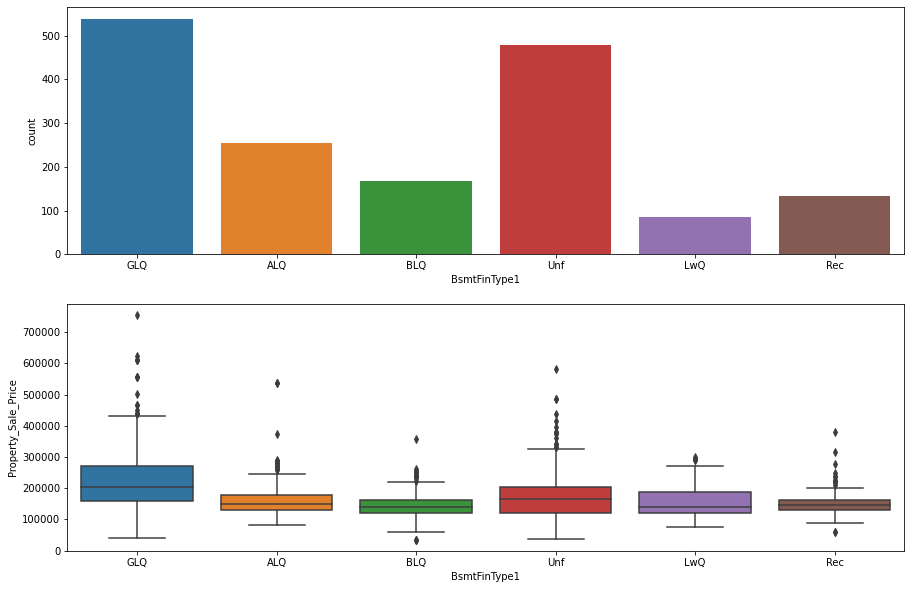

In [150]:
bi_var_analysis('BsmtFinType1')

#### BsmtFinSF1

Basic EDA of BsmtFinSF1

description    Type 1 finished square feet
Name: BsmtFinSF1, dtype: object




There are 11 outliers in the BsmtFinSF1 column.


Skewness:  1.6068604765254866
Kurtosis:  9.938298145741047


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.849
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


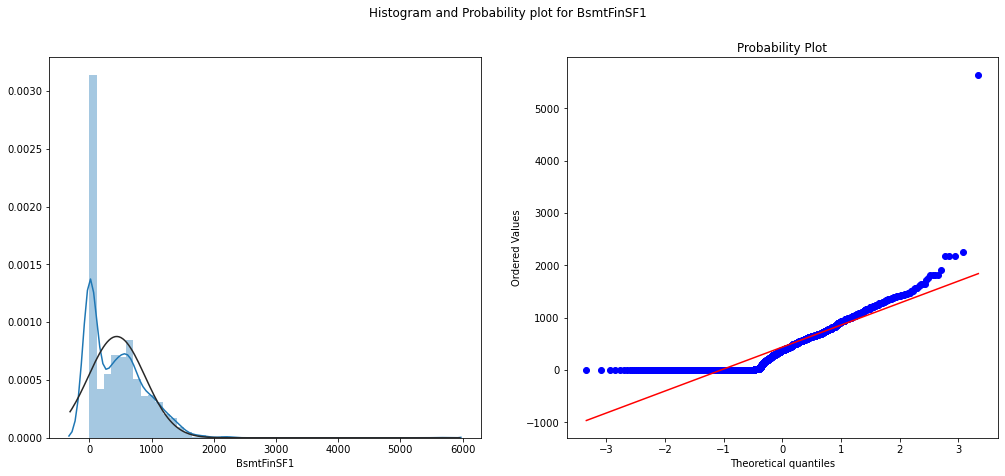

In [151]:
uni_var_analysis('BsmtFinSF1')

Relationship between BsmtFinSF1 and Property_Sale_Price

description    Type 1 finished square feet
Name: BsmtFinSF1, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.287


Lets see the relation between BsmtFinSF1 and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.561481991280059
Intercept:  0.1600170215737209
R-value:  0.38196216902594754
p-value:  1.0002052548230575e-58
Std error:  0.03338419599663131


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


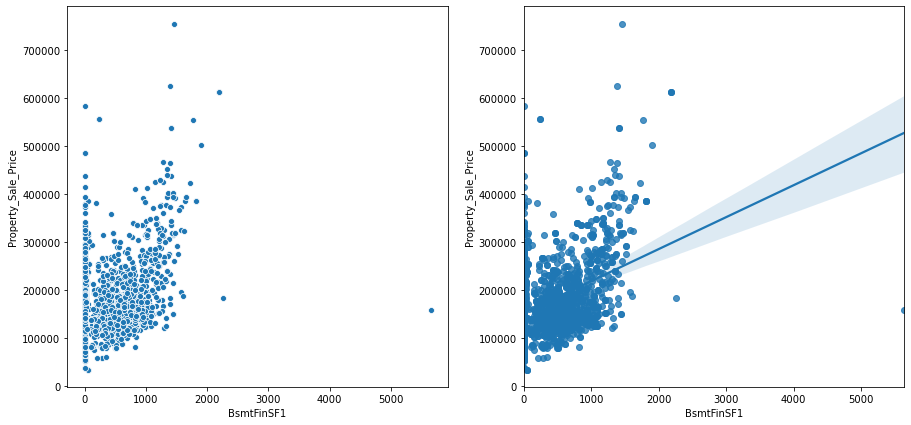

In [152]:
bi_var_analysis('BsmtFinSF1')

#### BsmtFinType2

Basic EDA of BsmtFinType2

description    Rating of basement finished area (if multiple types)
Name: BsmtFinType2, dtype: object


Unique values in BsmtFinType2 are ['Unf' 'Rec' 'LwQ' 'GLQ' 'ALQ' 'BLQ']

Unf    1459
Rec    60  
LwQ    58  
BLQ    42  
ALQ    21  
GLQ    18  
Name: BsmtFinType2, dtype: int64


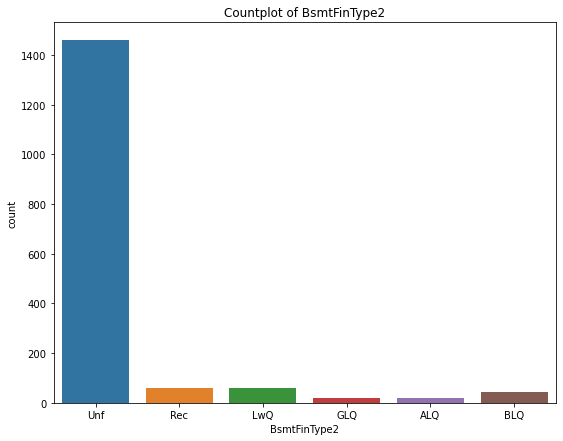

In [153]:
uni_var_analysis('BsmtFinType2')

Relationship between BsmtFinType2 and Property_Sale_Price

description    Rating of basement finished area (if multiple types)
Name: BsmtFinType2, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in BsmtFinType2 are : ['Unf' 'Rec' 'LwQ' 'GLQ' 'ALQ' 'BLQ']


Ho:  All the levels in BsmtFinType2 have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of BsmtFinType2 with respect to Property_Sale_Price mean


Test Results 

                       sum_sq      df         F    PR(>F)
C(BsmtFinType2)  9.320261e+10  5.0     2.992892  0.010751
Residual         1.028909e+13  1652.0 NaN       NaN      


Reject null hypothesis,  There is a significant difference between the levels of BsmtFinType2 with respect to Property_Sale_Price mean


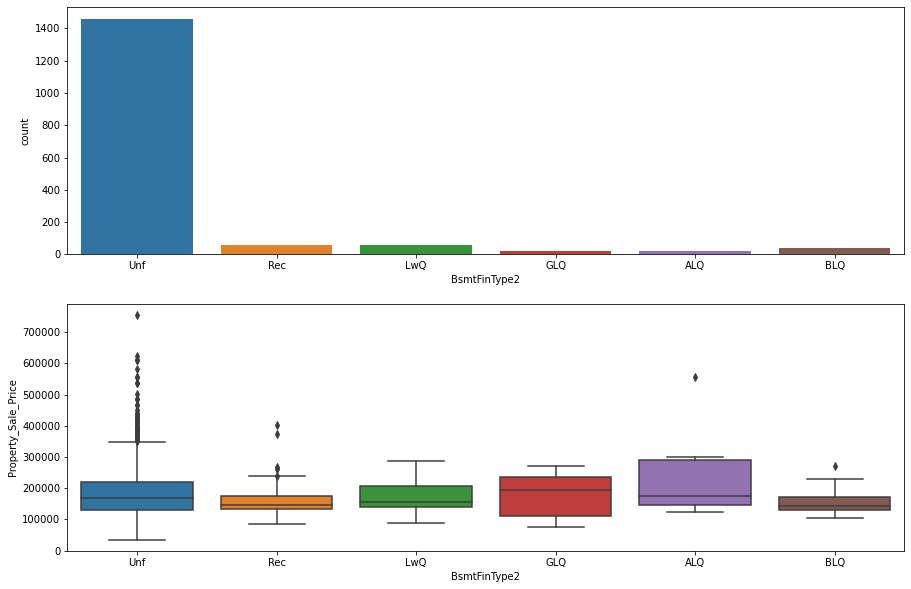

In [154]:
bi_var_analysis('BsmtFinType2')

#### BsmtFinSF2

Basic EDA of BsmtFinSF2

description    Type 2 finished square feet
Name: BsmtFinSF2, dtype: object




There are 200 outliers in the BsmtFinSF2 column.


Skewness:  4.005773708341785
Kurtosis:  17.36353047480435


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.342
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


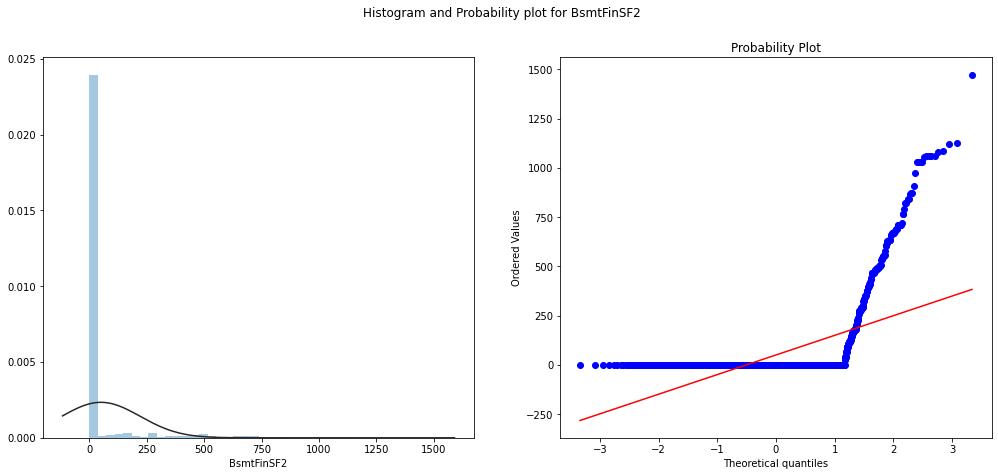

In [155]:
uni_var_analysis('BsmtFinSF2')

Relationship between BsmtFinSF2 and Property_Sale_Price

description    Type 2 finished square feet
Name: BsmtFinSF2, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.045


Lets see the relation between BsmtFinSF2 and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.00014141709937409494
Intercept:  0.21435433763779724
R-value:  -0.025409586701661355
p-value:  0.3011230433145719
Std error:  0.00013672058627376243


Fail to reject Null hypothesis,  Slope is 0 (The regression model has no predictability of the dependent variable)


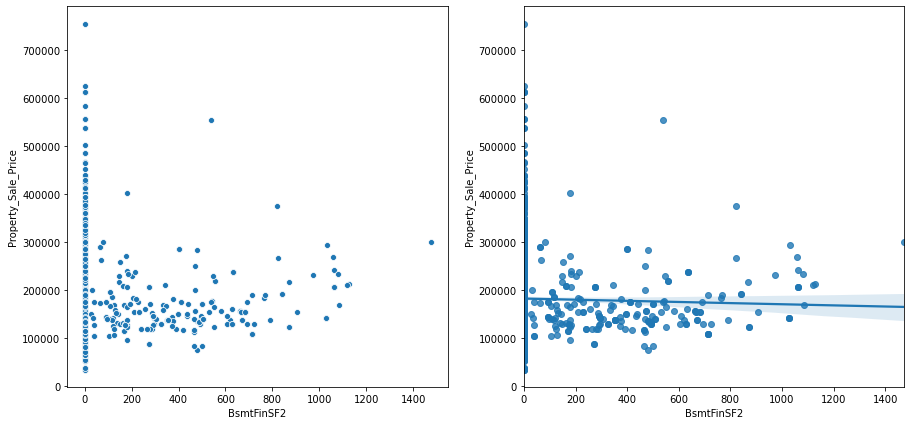

In [156]:
bi_var_analysis('BsmtFinSF2')

#### BsmtUnfSF

Basic EDA of BsmtUnfSF

description    Unfinished square feet of the basement area
Name: BsmtUnfSF, dtype: object




There are 31 outliers in the BsmtUnfSF column.


Skewness:  0.9395646848036183
Kurtosis:  0.3990224536153719


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.923
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


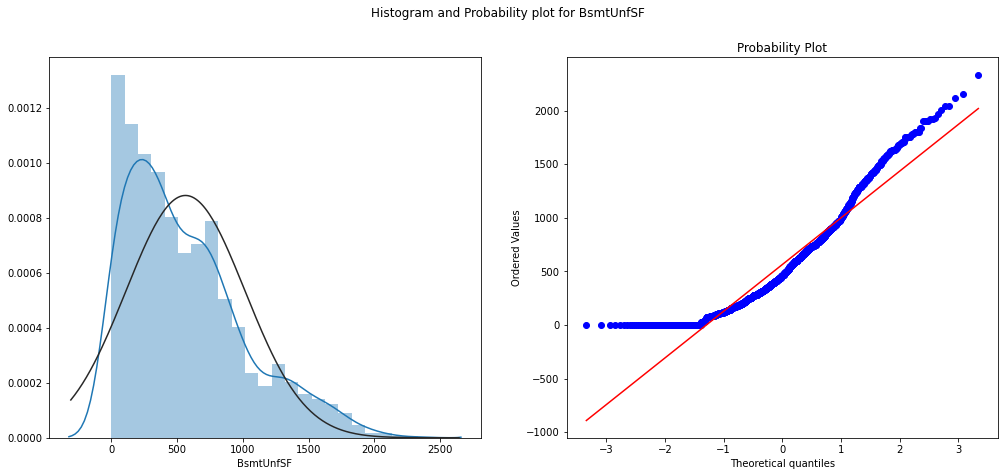

In [157]:
uni_var_analysis('BsmtUnfSF')

Relationship between BsmtUnfSF and Property_Sale_Price

description    Unfinished square feet of the basement area
Name: BsmtUnfSF, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.208


Lets see the relation between BsmtUnfSF and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.2959719008550768
Intercept:  0.15646589988155
R-value:  0.23411729518336888
p-value:  4.446209930557708e-22
Std error:  0.030202727761299293


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


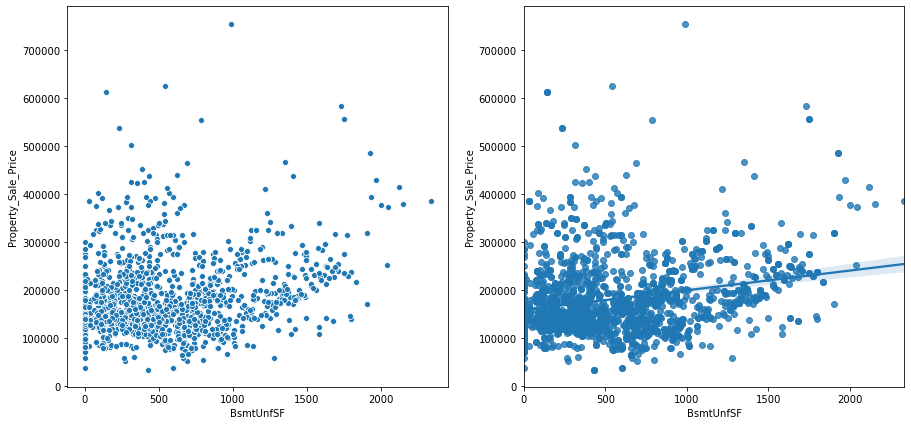

In [158]:
bi_var_analysis('BsmtUnfSF')

#### TotalBsmtSF

Basic EDA of TotalBsmtSF

description    Total square feet of the basement area
Name: TotalBsmtSF, dtype: object




There are 74 outliers in the TotalBsmtSF column.


Skewness:  1.3229911869697484
Kurtosis:  11.775077184187703


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.926
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


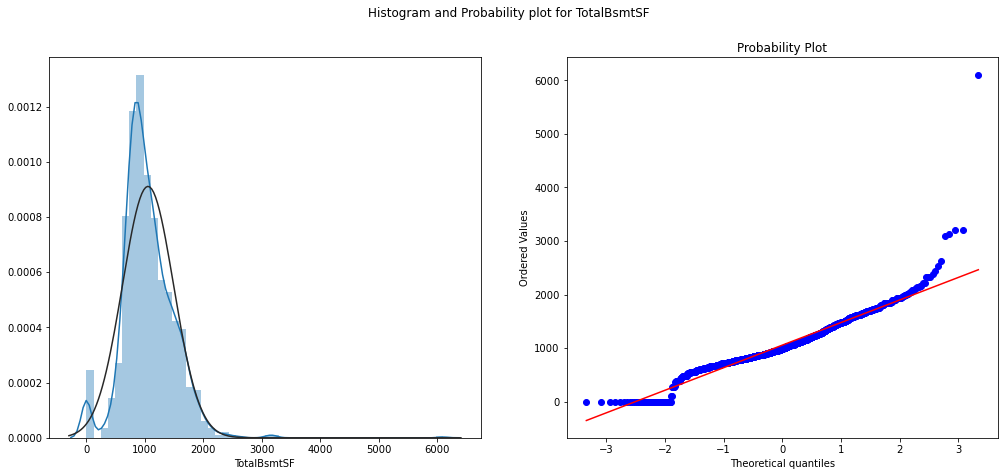

In [159]:
uni_var_analysis('TotalBsmtSF')

Relationship between TotalBsmtSF and Property_Sale_Price

description    Total square feet of the basement area
Name: TotalBsmtSF, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.619


Lets see the relation between TotalBsmtSF and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.6739527671528492
Intercept:  0.11917002370888806
R-value:  0.6290598951530697
p-value:  2.294409289266764e-183
Std error:  0.020465752495309193


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


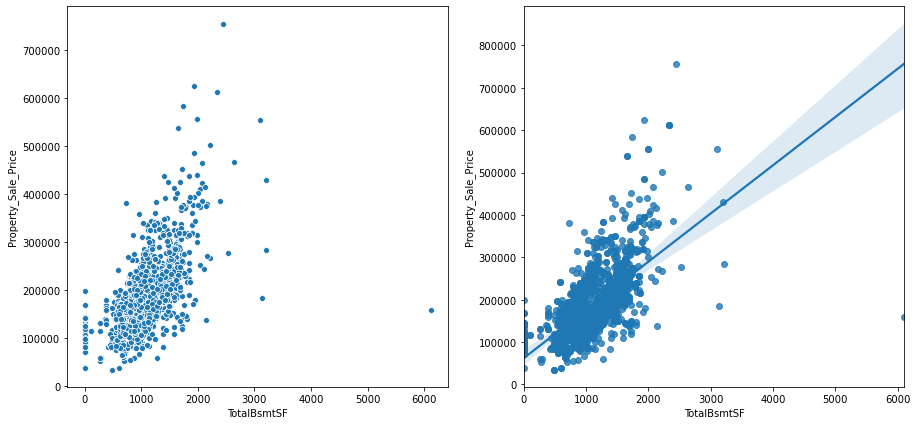

In [160]:
bi_var_analysis('TotalBsmtSF')

#### Heating

Basic EDA of Heating

description    Type of heating
Name: Heating, dtype: object


Unique values in Heating are ['GasA' 'Floor' 'GasW' 'Grav' 'Wall' 'OthW']

GasA     1621
GasW     19  
Grav     8   
Wall     5   
Floor    3   
OthW     2   
Name: Heating, dtype: int64


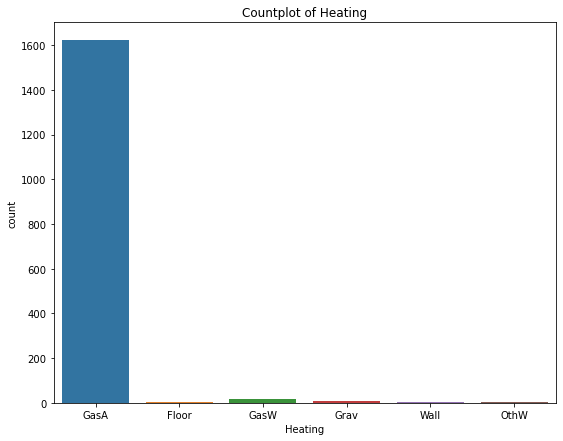

In [161]:
uni_var_analysis('Heating')

Relationship between Heating and Property_Sale_Price

description    Type of heating
Name: Heating, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Heating are : ['GasA' 'Floor' 'GasW' 'Grav' 'Wall' 'OthW']


Ho:  All the levels in Heating have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Heating with respect to Property_Sale_Price mean


Test Results 

                  sum_sq      df         F    PR(>F)
C(Heating)  1.891219e+11  5.0     6.130169  0.000012
Residual    1.019317e+13  1652.0 NaN       NaN      


Reject null hypothesis,  There is a significant difference between the levels of Heating with respect to Property_Sale_Price mean


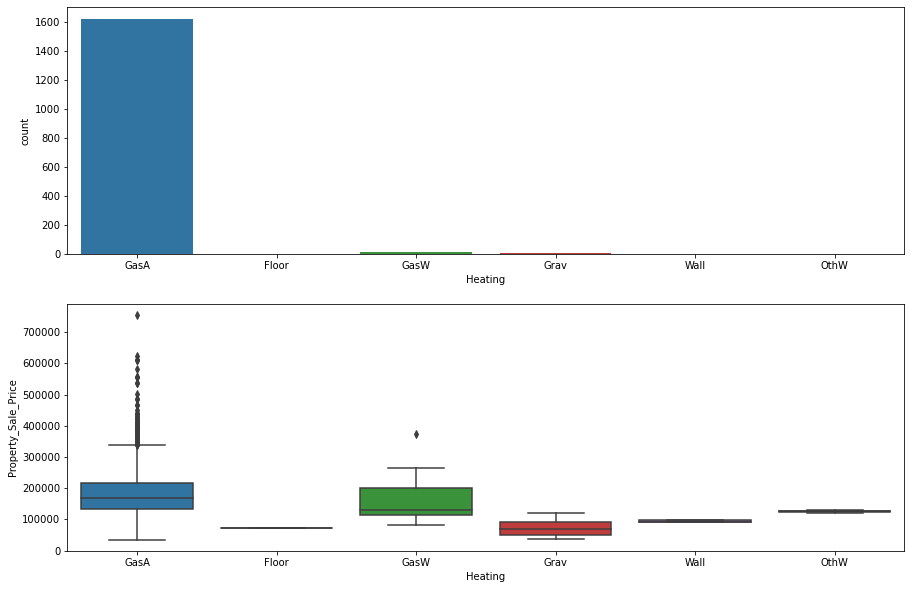

In [162]:
bi_var_analysis('Heating')

#### HeatingQC

Basic EDA of HeatingQC

description    Heating quality and condition
Name: HeatingQC, dtype: object


Unique values in HeatingQC are ['Ex' 'TA' 'Gd' 'Fa' 'Po']

Ex    843
TA    484
Gd    276
Fa    54 
Po    1  
Name: HeatingQC, dtype: int64


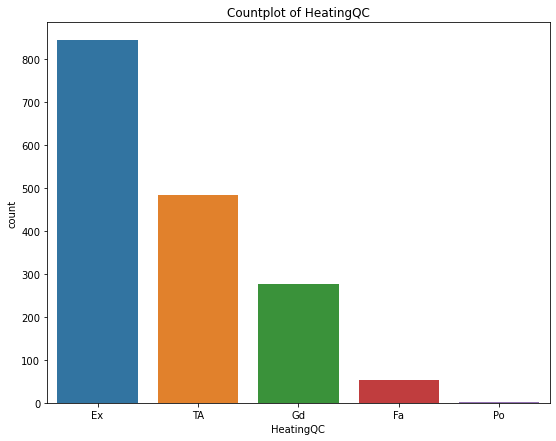

In [163]:
uni_var_analysis('HeatingQC')

Relationship between HeatingQC and Property_Sale_Price

description    Heating quality and condition
Name: HeatingQC, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in HeatingQC are : ['Ex' 'TA' 'Gd' 'Fa' 'Po']


Ho:  All the levels in HeatingQC have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of HeatingQC with respect to Property_Sale_Price mean


Test Results 

                    sum_sq      df           F        PR(>F)
C(HeatingQC)  2.087381e+12  4.0     103.992662  4.515616e-79
Residual      8.294914e+12  1653.0 NaN         NaN          


Reject null hypothesis,  There is a significant difference between the levels of HeatingQC with respect to Property_Sale_Price mean


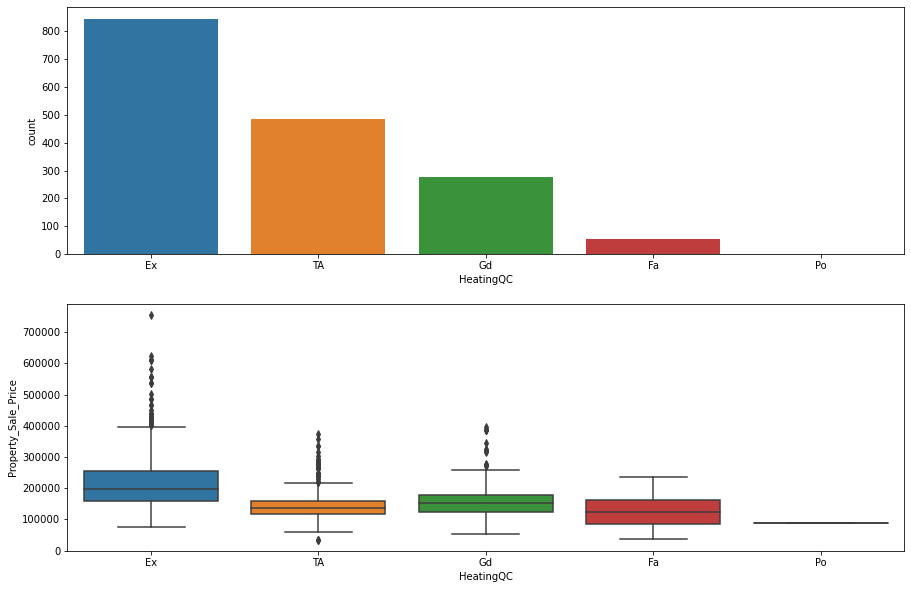

In [164]:
bi_var_analysis('HeatingQC')

#### CentralAir

Basic EDA of CentralAir

description    Central air conditioning
Name: CentralAir, dtype: object


Unique values in CentralAir are ['Y' 'N']

Y    1558
N    100 
Name: CentralAir, dtype: int64


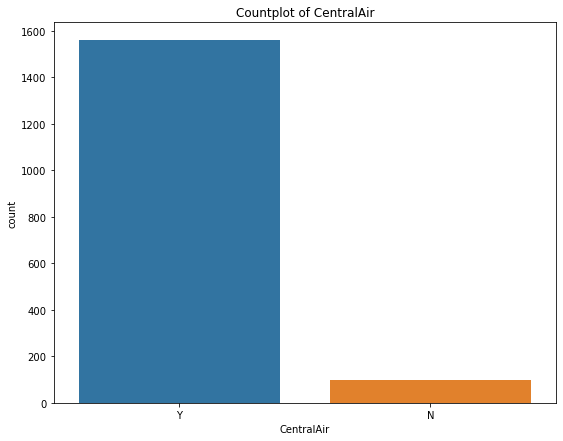

In [165]:
uni_var_analysis('CentralAir')

Relationship between CentralAir and Property_Sale_Price

description    Central air conditioning
Name: CentralAir, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in CentralAir are : ['Y' 'N']


Ho:  All the levels in CentralAir have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of CentralAir with respect to Property_Sale_Price mean


Test Results


Test statistics:  <module 'scipy.stats' from 'C:\\Users\\Darshan\\Anaconda3\\lib\\site-packages\\scipy\\stats\\__init__.py'>
p-value:  4.02771815729607e-23
Reject null hypothesis,  There is a significant difference between the levels of CentralAir with respect to Property_Sale_Price mean


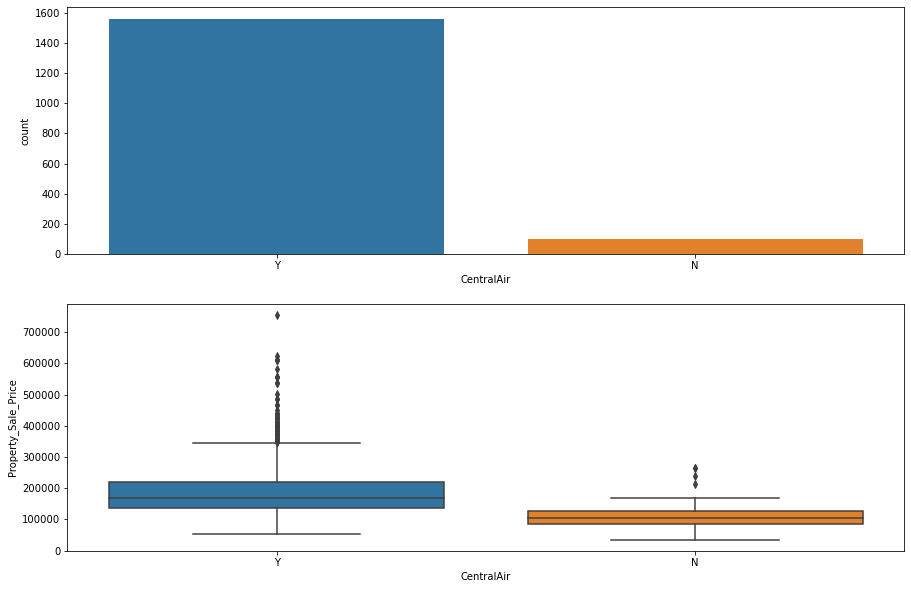

In [166]:
bi_var_analysis('CentralAir')

#### Electrical

Basic EDA of Electrical

description    Electrical system
Name: Electrical, dtype: object


Unique values in Electrical are ['SBrkr' 'FuseA' 'FuseP' 'FuseF' 'Mix']

SBrkr    1520
FuseA    100 
FuseF    34  
FuseP    3   
Mix      1   
Name: Electrical, dtype: int64


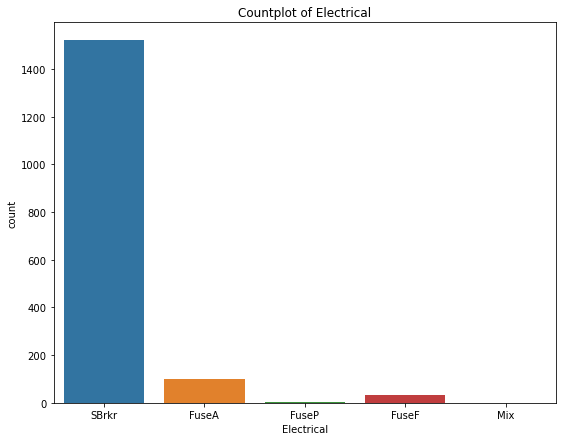

In [167]:
uni_var_analysis('Electrical')

Relationship between Electrical and Property_Sale_Price

description    Electrical system
Name: Electrical, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Electrical are : ['SBrkr' 'FuseA' 'FuseP' 'FuseF' 'Mix']


Ho:  All the levels in Electrical have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Electrical with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df          F        PR(>F)
C(Electrical)  5.669397e+11  4.0     23.869522  3.220081e-19
Residual       9.815355e+12  1653.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of Electrical with respect to Property_Sale_Price mean


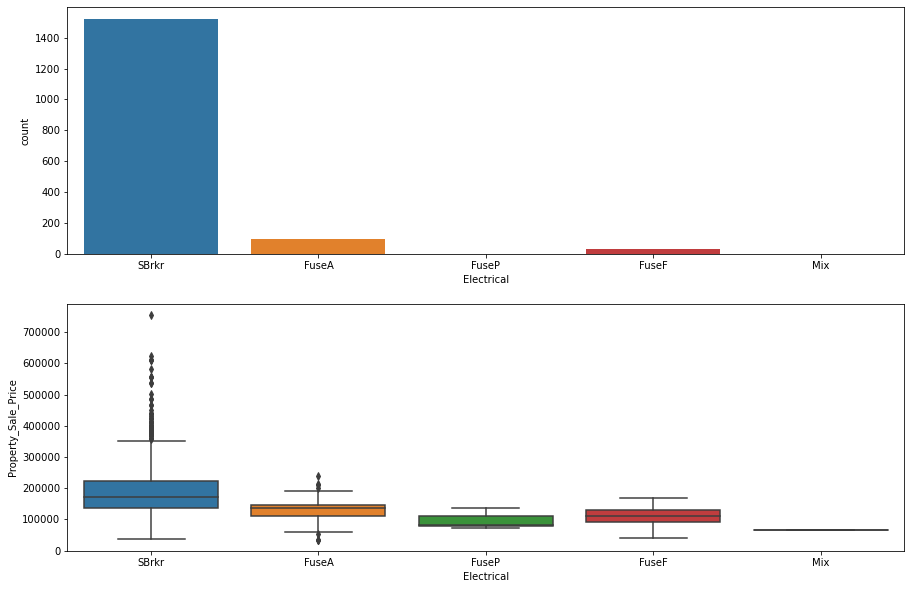

In [168]:
bi_var_analysis('Electrical')

#### 1stFlrSF

Basic EDA of 1stFlrSF

description    First Floor square feet
Name: 1stFlrSF, dtype: object




There are 20 outliers in the 1stFlrSF column.


Skewness:  1.3185666456876686
Kurtosis:  5.363606304666076


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.931
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


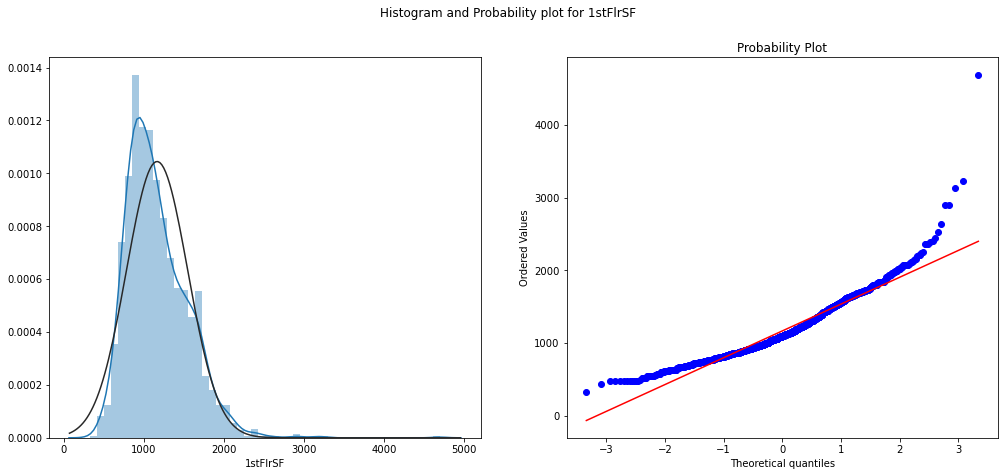

In [169]:
uni_var_analysis('1stFlrSF')

Relationship between 1stFlrSF and Property_Sale_Price

description    First Floor square feet
Name: 1stFlrSF, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.571


Lets see the relation between 1stFlrSF and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.7517524502872044
Intercept:  0.0986949897129502
R-value:  0.6072159656972724
p-value:  1.251385618949479e-167
Std error:  0.024172164229469346


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


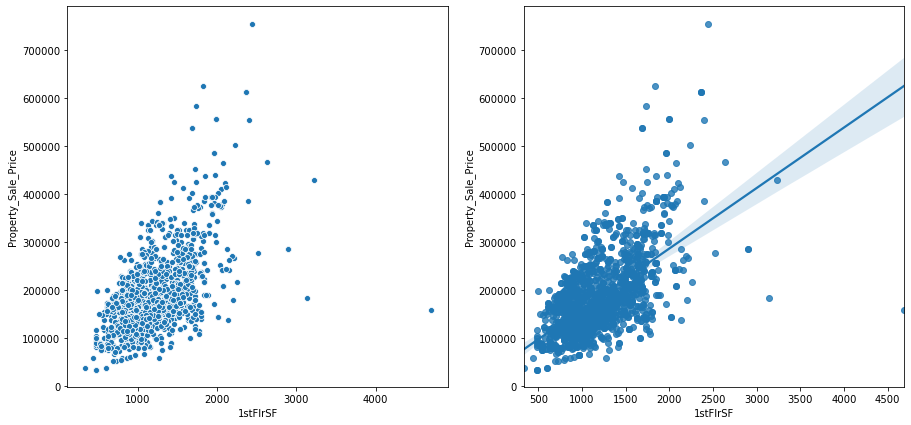

In [170]:
bi_var_analysis('1stFlrSF')

#### 2ndFlrSF

Basic EDA of 2ndFlrSF

description    Second floor square feet
Name: 2ndFlrSF, dtype: object




There are 1 outliers in the 2ndFlrSF column.


Skewness:  0.7652931147580483
Kurtosis:  -0.7483820548278244


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.767
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


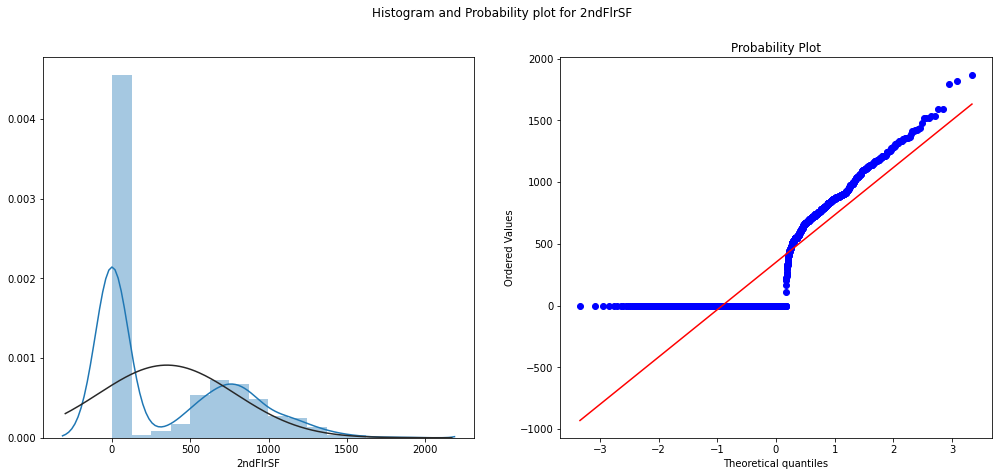

In [171]:
uni_var_analysis('2ndFlrSF')

Relationship between 2ndFlrSF and Property_Sale_Price

description    Second floor square feet
Name: 2ndFlrSF, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.304


Lets see the relation between 2ndFlrSF and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.4920182510241466
Intercept:  -0.02614851499651505
R-value:  0.3072304735211065
p-value:  1.4109115412704065e-37
Std error:  0.03745046599338827


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


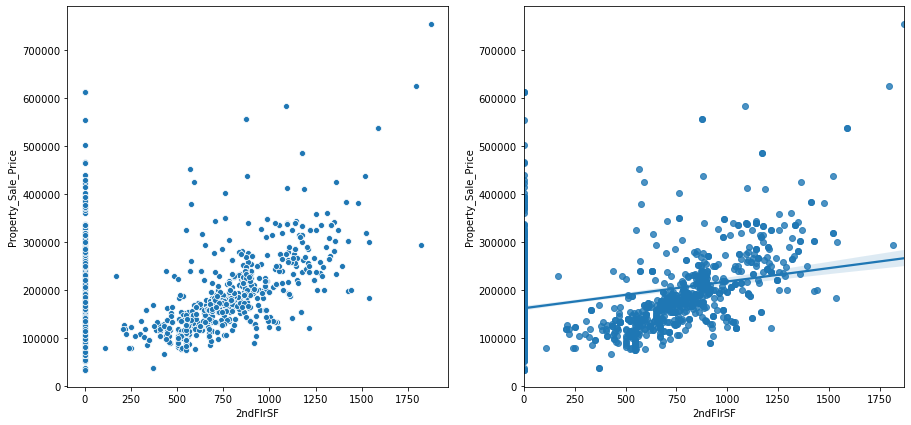

In [172]:
bi_var_analysis('2ndFlrSF')

#### LowQualFinSF

Basic EDA of LowQualFinSF

description    Low quality finished square feet (all floors)
Name: LowQualFinSF, dtype: object




There are 35 outliers in the LowQualFinSF column.


Skewness:  7.985109116803063
Kurtosis:  64.84509426454363


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.114
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


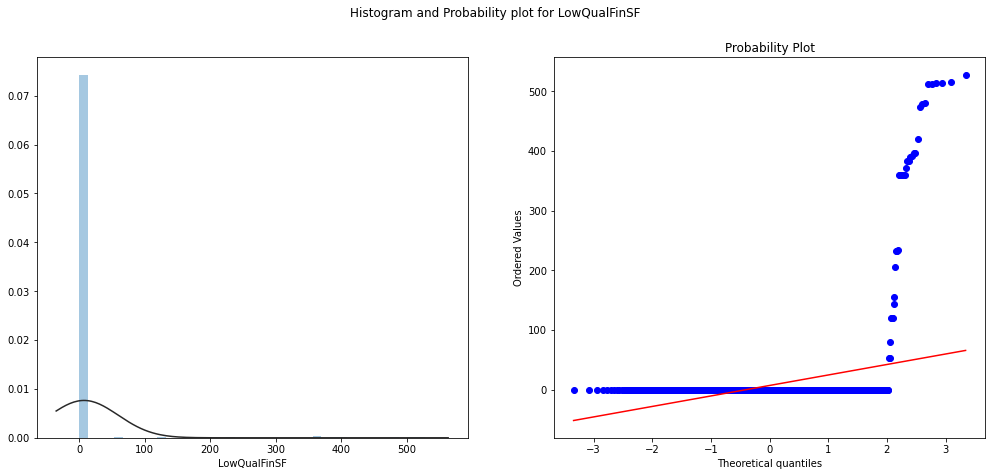

In [173]:
uni_var_analysis('LowQualFinSF')

Relationship between LowQualFinSF and Property_Sale_Price

description    Low quality finished square feet (all floors)
Name: LowQualFinSF, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.103


Lets see the relation between LowQualFinSF and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.0013990351510740696
Intercept:  0.21690216858984887
R-value:  -0.07701126058308377
p-value:  0.0017005688568685082
Std error:  0.0004450948314135257


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


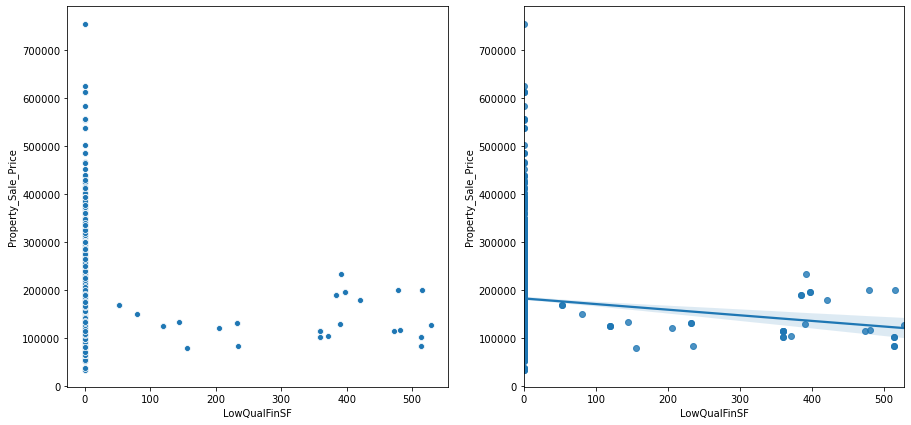

In [174]:
bi_var_analysis('LowQualFinSF')

#### GrLivArea

Basic EDA of GrLivArea

description    Above grade (ground) living area square feet
Name: GrLivArea, dtype: object




There are 34 outliers in the GrLivArea column.


Skewness:  1.1892100629305382
Kurtosis:  3.9617784247606282


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.941
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


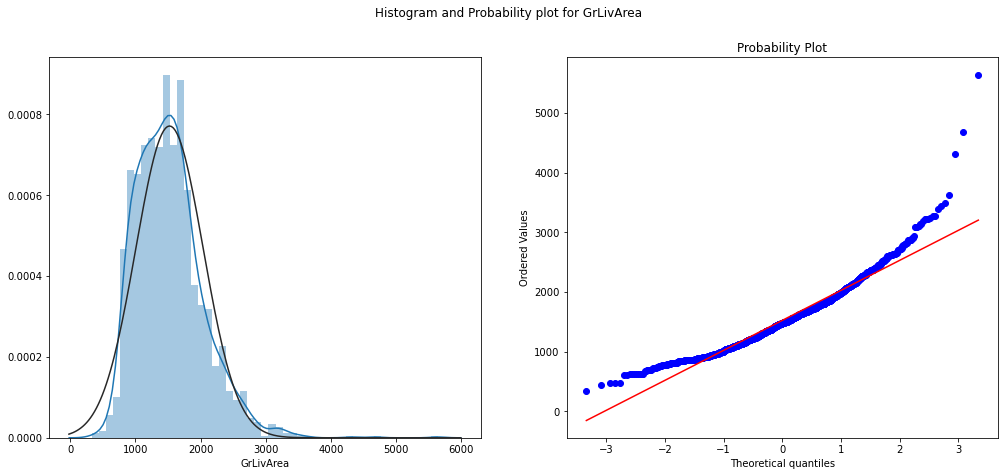

In [175]:
uni_var_analysis('GrLivArea')

Relationship between GrLivArea and Property_Sale_Price

description    Above grade (ground) living area square feet
Name: GrLivArea, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.730


Lets see the relation between GrLivArea and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.8365638741774312
Intercept:  0.1470475586114781
R-value:  0.7003717403557692
p-value:  8.863606999614618e-245
Std error:  0.020950946650129934


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


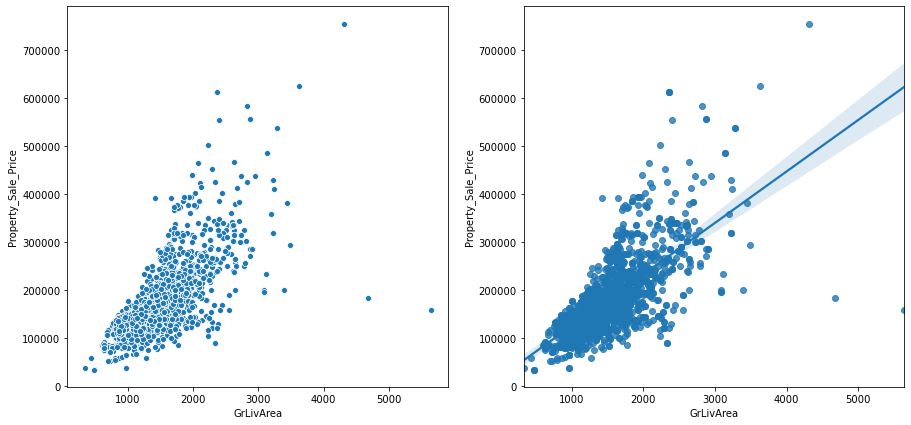

In [176]:
bi_var_analysis('GrLivArea')

#### BsmtFullBath

Basic EDA of BsmtFullBath

description    Basement full bathrooms
Name: BsmtFullBath, dtype: object




There are 2 outliers in the BsmtFullBath column.


Skewness:  0.6248465702713707
Kurtosis:  -0.6116388609238825


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.660
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


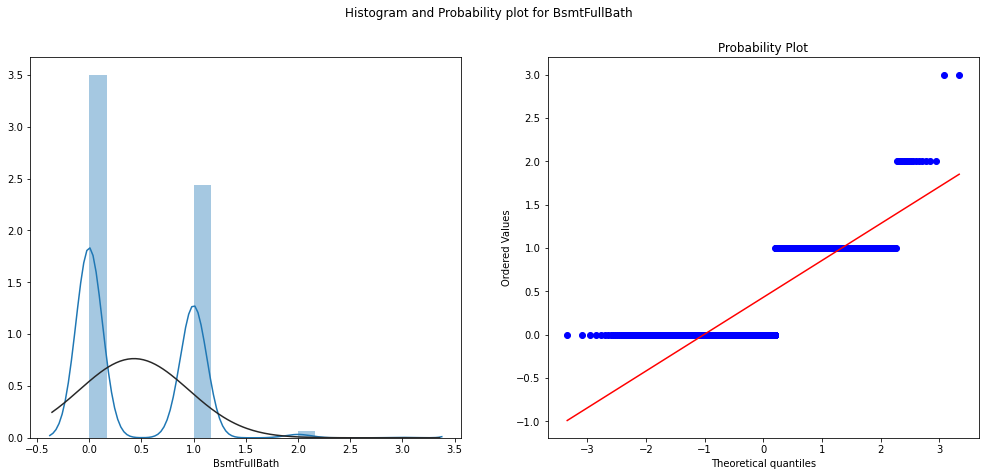

In [177]:
uni_var_analysis('BsmtFullBath')

Relationship between BsmtFullBath and Property_Sale_Price

description    Basement full bathrooms
Name: BsmtFullBath, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.218


Lets see the relation between BsmtFullBath and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.4086304578910886
Intercept:  0.031410039931901085
R-value:  0.22516153031887984
p-value:  1.682768526845632e-20
Std error:  0.043451886810675404


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


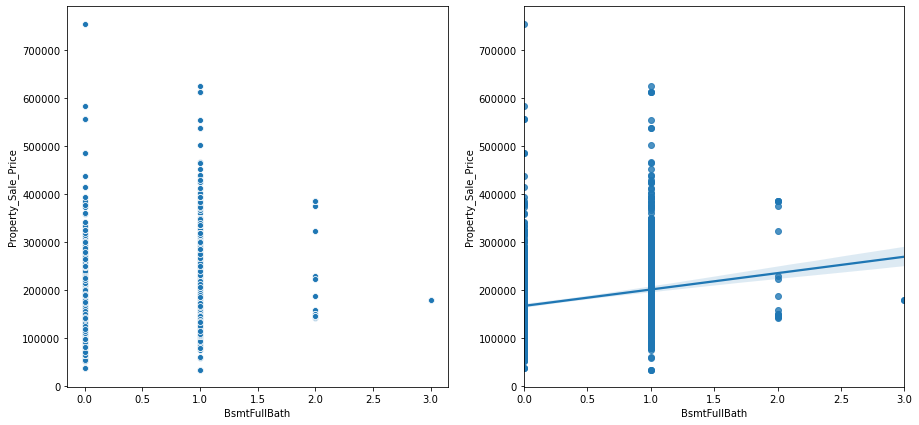

In [178]:
bi_var_analysis('BsmtFullBath')

#### BsmtHalfBath

Basic EDA of BsmtHalfBath

description    Basement half bathrooms
Name: BsmtHalfBath, dtype: object




There are 89 outliers in the BsmtHalfBath column.


Skewness:  4.290335800483066
Kurtosis:  18.452776303363663


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.236
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


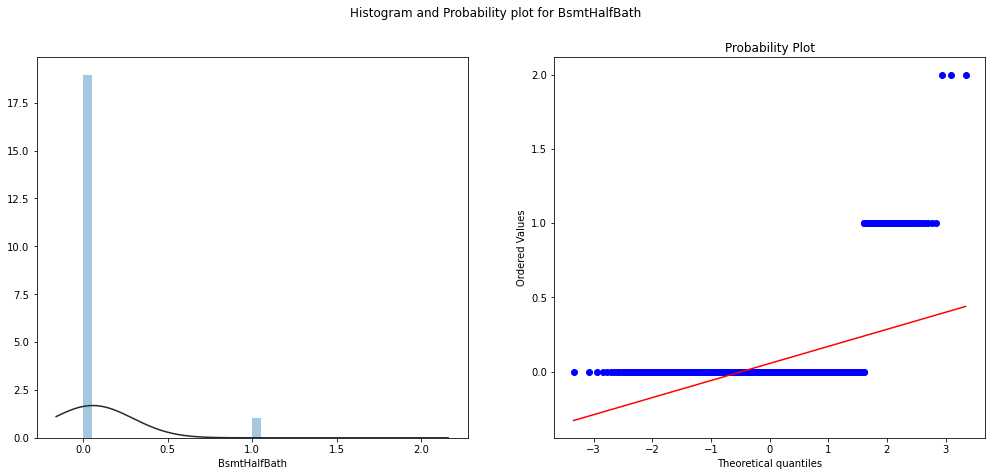

In [179]:
uni_var_analysis('BsmtHalfBath')

Relationship between BsmtHalfBath and Property_Sale_Price

description    Basement half bathrooms
Name: BsmtHalfBath, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.027


Lets see the relation between BsmtHalfBath and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.1235283127370657
Intercept:  0.21399033019013763
R-value:  -0.030844131794790782
p-value:  0.20937725661369141
Std error:  0.0983687401985041


Fail to reject Null hypothesis,  Slope is 0 (The regression model has no predictability of the dependent variable)


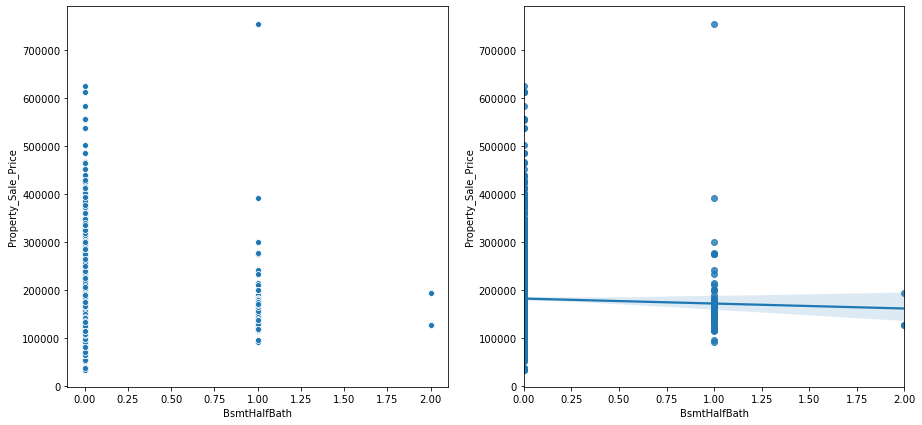

In [180]:
bi_var_analysis('BsmtHalfBath')

#### FullBath

Basic EDA of FullBath

description    Full bathrooms above grade
Name: FullBath, dtype: object




There are 0 outliers in the FullBath column.


Skewness:  -0.04573043172245756
Kurtosis:  -0.8504305388242384


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.716
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


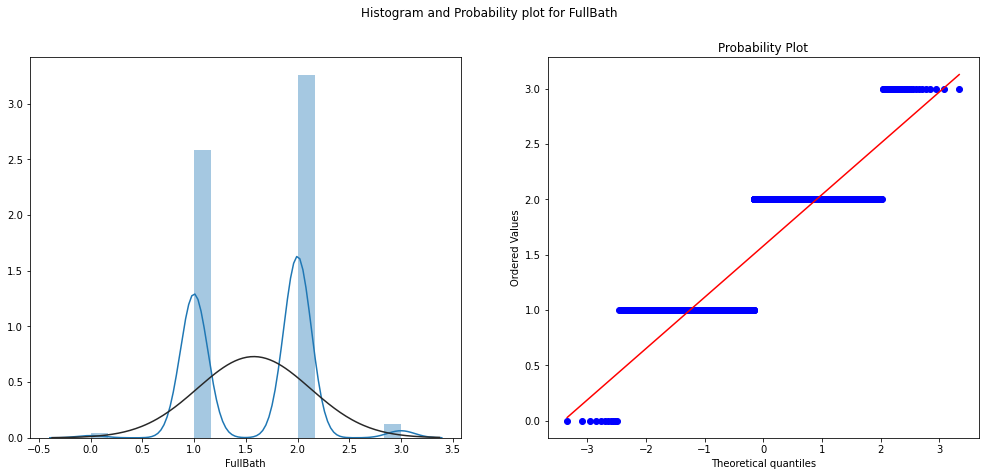

In [181]:
uni_var_analysis('FullBath')

Relationship between FullBath and Property_Sale_Price

description    Full bathrooms above grade
Name: FullBath, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.623


Lets see the relation between FullBath and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.9406659997543105
Intercept:  0.6042807976546777
R-value:  0.5429861173057278
p-value:  8.754271599294135e-128
Std error:  0.035748865202857555


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


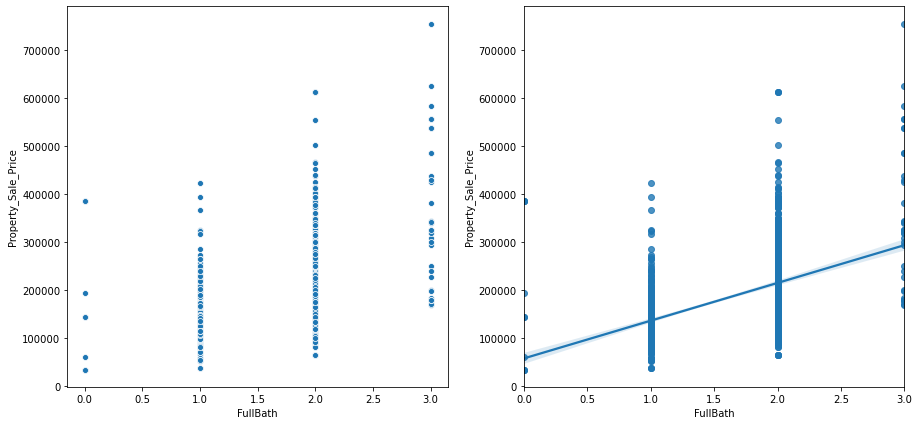

In [182]:
bi_var_analysis('FullBath')

#### HalfBath

Basic EDA of HalfBath

description    Half baths above grade
Name: HalfBath, dtype: object




There are 0 outliers in the HalfBath column.


Skewness:  0.6222220708609664
Kurtosis:  -1.2505538569628347


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.635
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


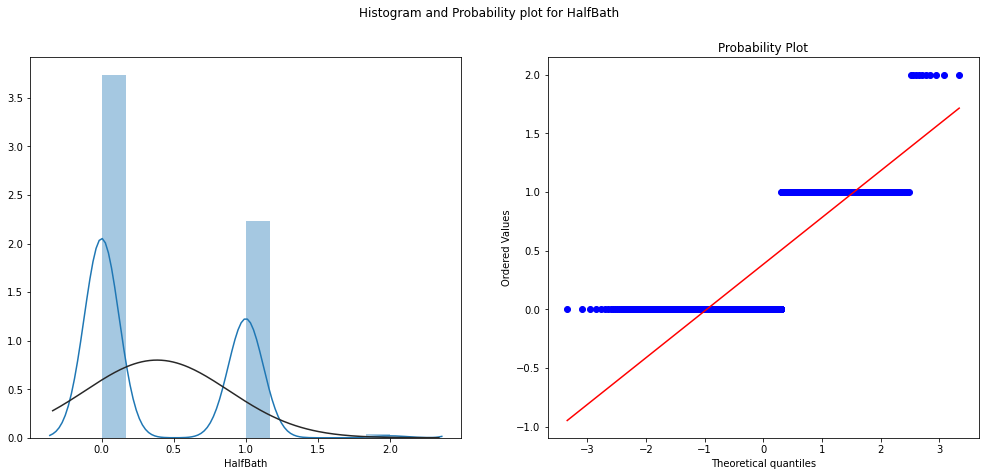

In [183]:
uni_var_analysis('HalfBath')

Relationship between HalfBath and Property_Sale_Price

description    Half baths above grade
Name: HalfBath, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.345


Lets see the relation between HalfBath and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.5568964793406085
Intercept:  -0.006822493761477366
R-value:  0.2929361486975187
p-value:  3.63407646722098e-34
Std error:  0.04466724788410075


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


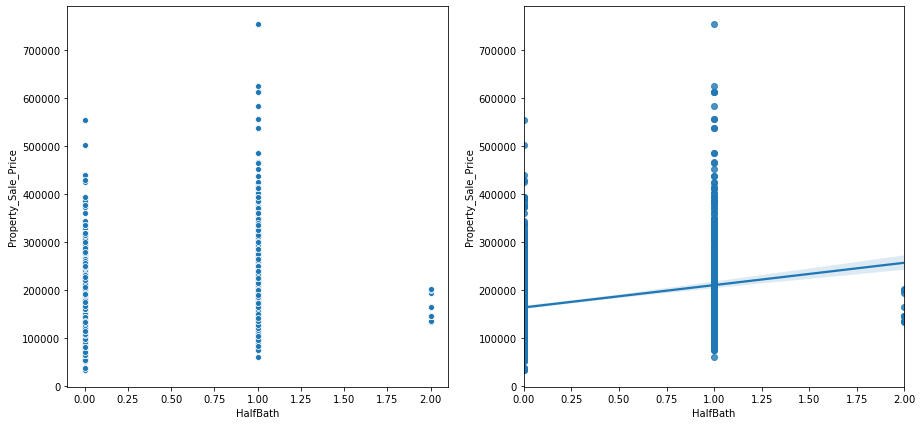

In [184]:
bi_var_analysis('HalfBath')

#### BedroomAbvGr

In [185]:
df_desc.loc['BedroomAbvGr']

description    Bedrooms above grade (does NOT include basement bedrooms)
Name: BedroomAbvGr, dtype: object

Basic EDA of BedroomAbvGr

description    Bedrooms above grade (does NOT include basement bedrooms)
Name: BedroomAbvGr, dtype: object




There are 40 outliers in the BedroomAbvGr column.


Skewness:  0.13662929045632452
Kurtosis:  1.9580195264362388


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.856
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


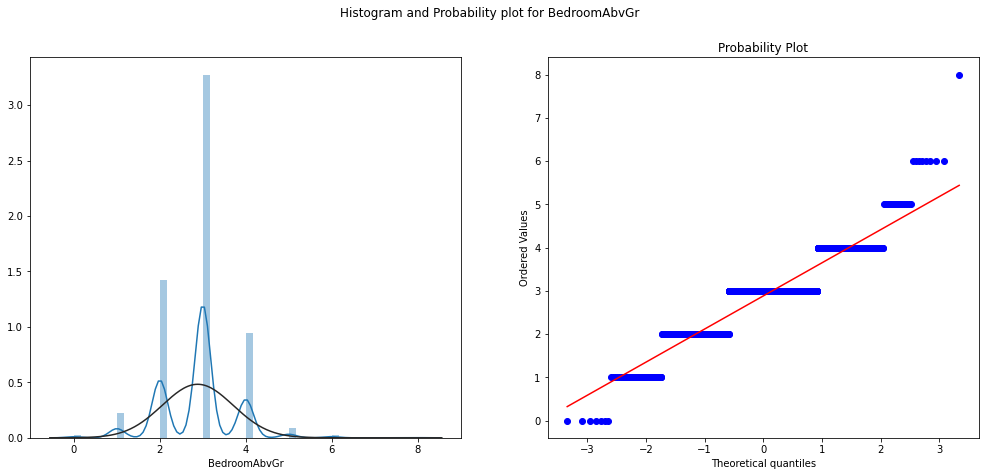

In [186]:
uni_var_analysis('BedroomAbvGr')

Relationship between BedroomAbvGr and Property_Sale_Price

description    Bedrooms above grade (does NOT include basement bedrooms)
Name: BedroomAbvGr, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.208


Lets see the relation between BedroomAbvGr and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.15751385993352596
Intercept:  0.22604138770217722
R-value:  0.13736166644145134
p-value:  1.9589635817164512e-08
Std error:  0.027911728175212685


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


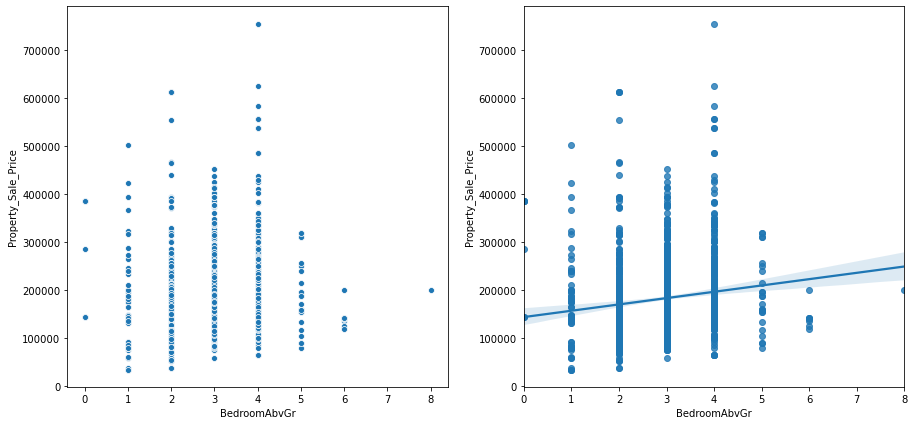

In [187]:
bi_var_analysis('BedroomAbvGr')

#### KitchenAbvGr

Basic EDA of KitchenAbvGr

description    Kitchens above grade
Name: KitchenAbvGr, dtype: object




There are 81 outliers in the KitchenAbvGr column.


Skewness:  4.450648511825961
Kurtosis:  22.538636189097332


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.229
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


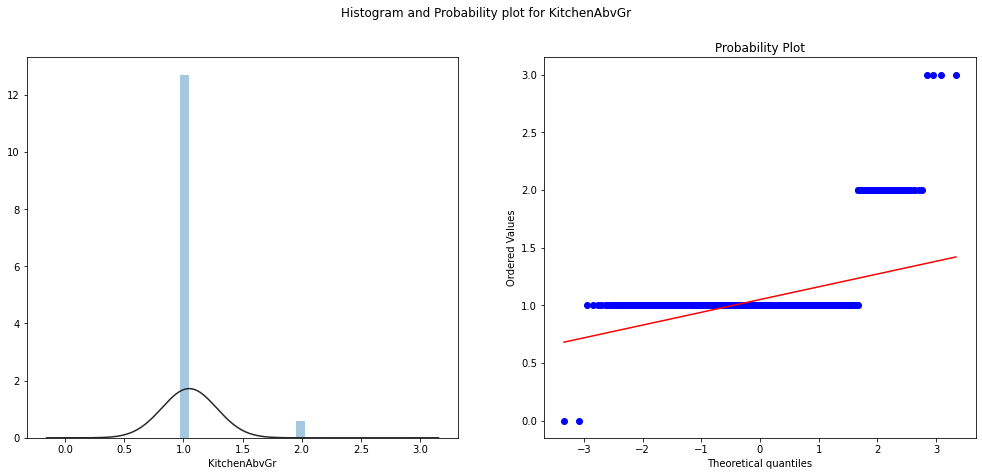

In [188]:
uni_var_analysis('KitchenAbvGr')

Relationship between KitchenAbvGr and Property_Sale_Price

description    Kitchens above grade
Name: KitchenAbvGr, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.173


Lets see the relation between KitchenAbvGr and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.5755308652131925
Intercept:  0.23525293291055896
R-value:  -0.14069472763825716
p-value:  8.75682807120061e-09
Std error:  0.09952199780117435


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


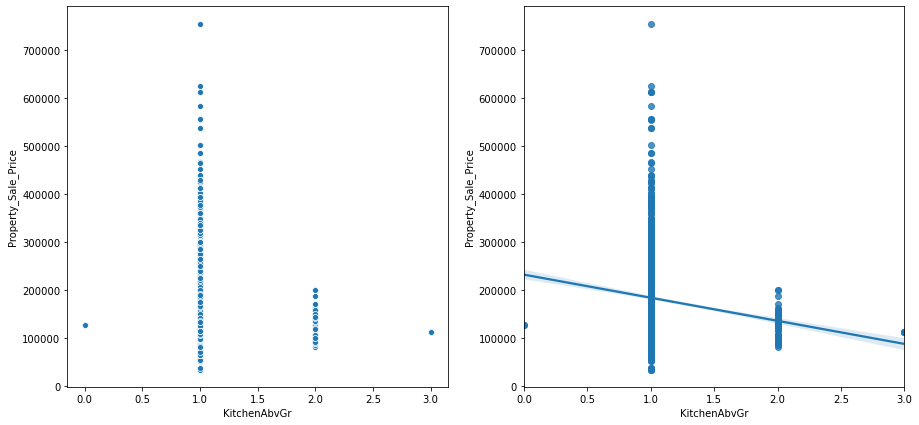

In [189]:
bi_var_analysis('KitchenAbvGr')

#### KitchenQual

Basic EDA of KitchenQual

description    Kitchen quality
Name: KitchenQual, dtype: object


Unique values in KitchenQual are ['Gd' 'TA' 'Ex' 'Fa']

TA    822
Gd    676
Ex    122
Fa    38 
Name: KitchenQual, dtype: int64


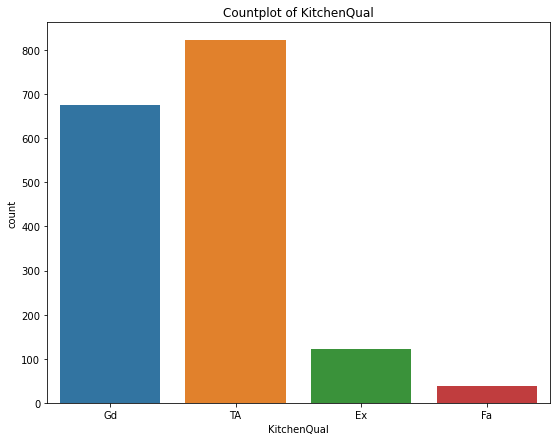

In [190]:
uni_var_analysis('KitchenQual')

Relationship between KitchenQual and Property_Sale_Price

description    Kitchen quality
Name: KitchenQual, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in KitchenQual are : ['Gd' 'TA' 'Ex' 'Fa']


Ho:  All the levels in KitchenQual have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of KitchenQual with respect to Property_Sale_Price mean


Test Results 

                      sum_sq      df          F         PR(>F)
C(KitchenQual)  4.794732e+12  3.0     473.10357  6.641376e-222
Residual        5.587563e+12  1654.0 NaN        NaN           


Reject null hypothesis,  There is a significant difference between the levels of KitchenQual with respect to Property_Sale_Price mean


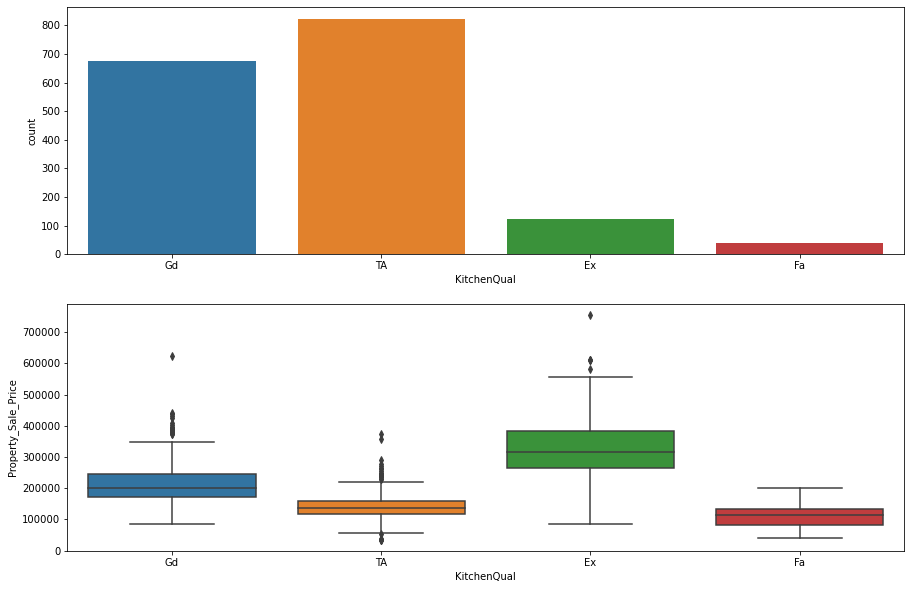

In [191]:
bi_var_analysis('KitchenQual')

#### TotRmsAbvGrd

Basic EDA of TotRmsAbvGrd

description    Total rooms above grade (does not include bathrooms)
Name: TotRmsAbvGrd, dtype: object




There are 38 outliers in the TotRmsAbvGrd column.


Skewness:  0.6959413381609894
Kurtosis:  0.855423945514938


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.940
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


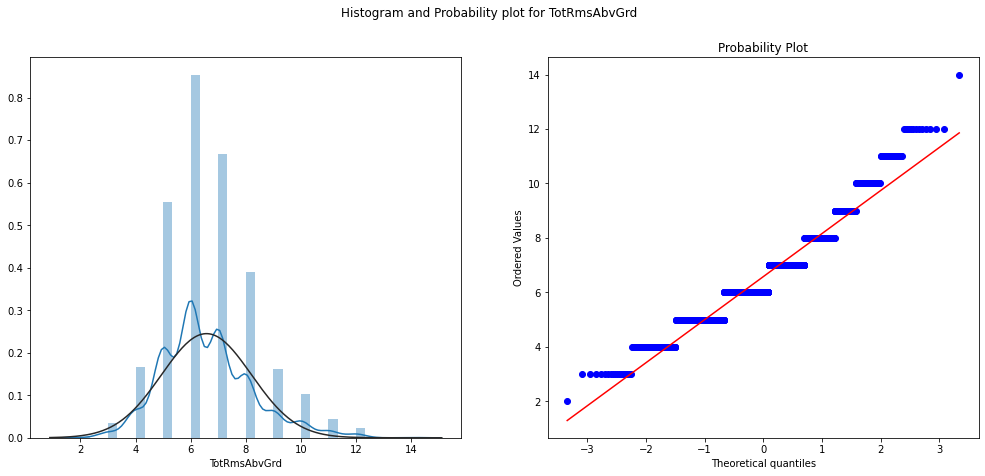

In [192]:
uni_var_analysis('TotRmsAbvGrd')

Relationship between TotRmsAbvGrd and Property_Sale_Price

description    Total rooms above grade (does not include bathrooms)
Name: TotRmsAbvGrd, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.519


Lets see the relation between TotRmsAbvGrd and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.6111322895355219
Intercept:  0.03168419352504809
R-value:  0.5249425034940756
p-value:  4.479739930394733e-118
Std error:  0.02434967386535994


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


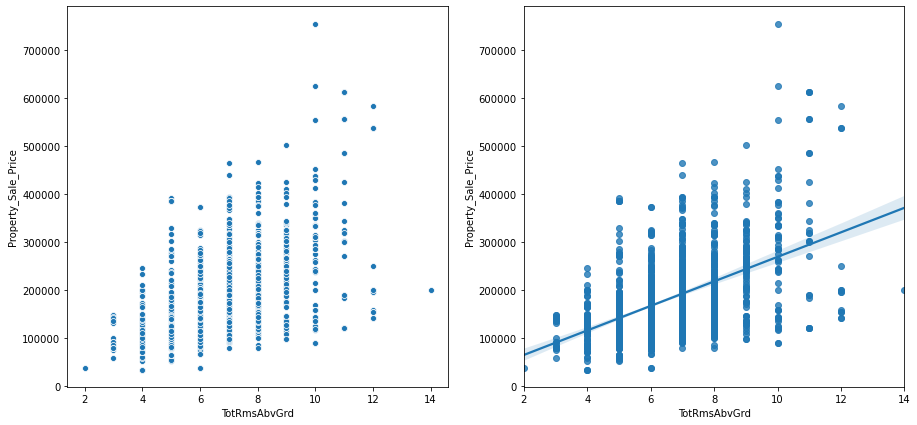

In [193]:
bi_var_analysis('TotRmsAbvGrd')

#### Functional

Basic EDA of Functional

description    Home functionality (Assume typical unless deductions are warranted)
Name: Functional, dtype: object


Unique values in Functional are ['Typ' 'Min1' 'Min2' 'Maj1' 'Maj2' 'Mod' 'Sev']

Typ     1544
Min2    43  
Min1    39  
Mod     15  
Maj1    11  
Maj2    5   
Sev     1   
Name: Functional, dtype: int64


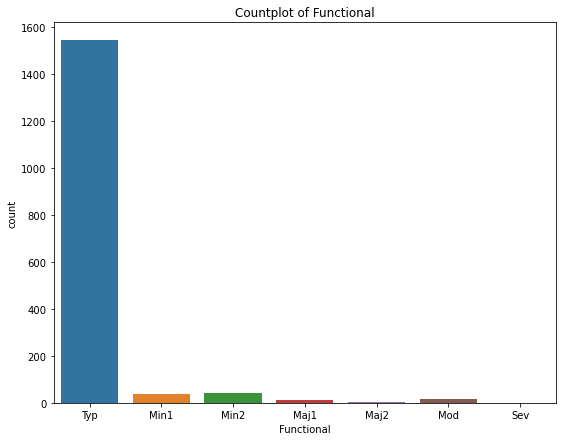

In [194]:
uni_var_analysis('Functional')

Relationship between Functional and Property_Sale_Price

description    Home functionality (Assume typical unless deductions are warranted)
Name: Functional, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in Functional are : ['Typ' 'Min1' 'Min2' 'Maj1' 'Maj2' 'Mod' 'Sev']


Ho:  All the levels in Functional have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of Functional with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df        F    PR(>F)
C(Functional)  1.883918e+11  6.0     5.08531  0.000035
Residual       1.019390e+13  1651.0 NaN      NaN      


Reject null hypothesis,  There is a significant difference between the levels of Functional with respect to Property_Sale_Price mean


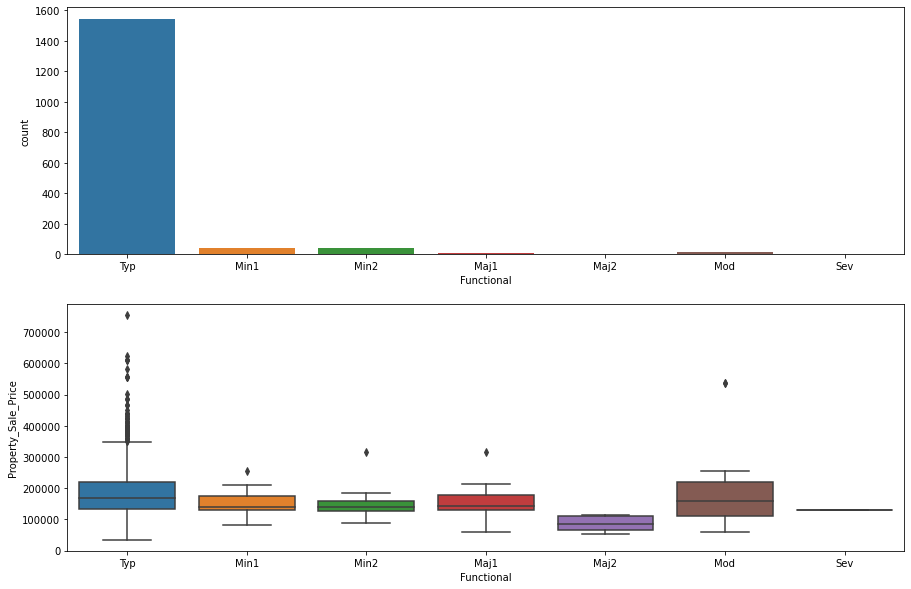

In [195]:
bi_var_analysis('Functional')

#### Fireplaces

Basic EDA of Fireplaces

description    Number of fireplaces
Name: Fireplaces, dtype: object




There are 4 outliers in the Fireplaces column.


Skewness:  0.6105841263833078
Kurtosis:  -0.30866238734429396


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.752
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


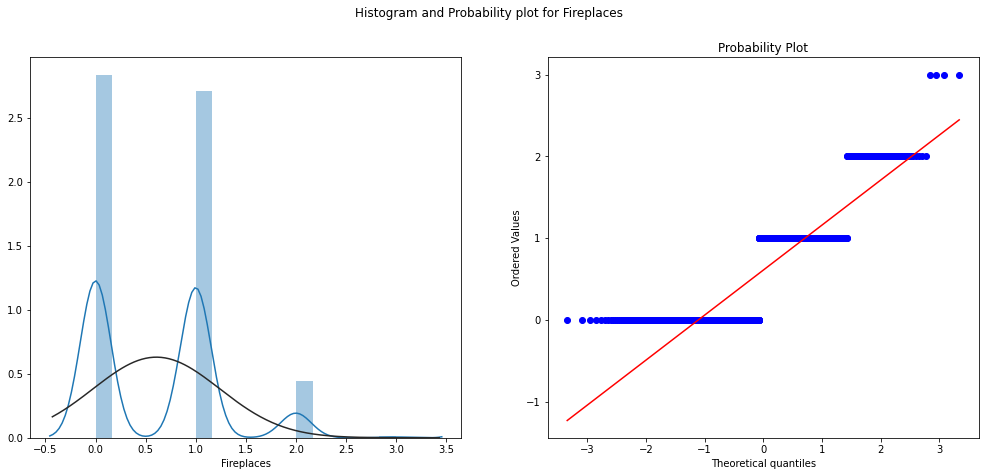

In [196]:
uni_var_analysis('Fireplaces')

Relationship between Fireplaces and Property_Sale_Price

description    Number of fireplaces
Name: Fireplaces, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.521


Lets see the relation between Fireplaces and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.7062608182760372
Intercept:  0.4844433989029785
R-value:  0.47196855774670193
p-value:  9.995594973941946e-93
Std error:  0.03241910629983138


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


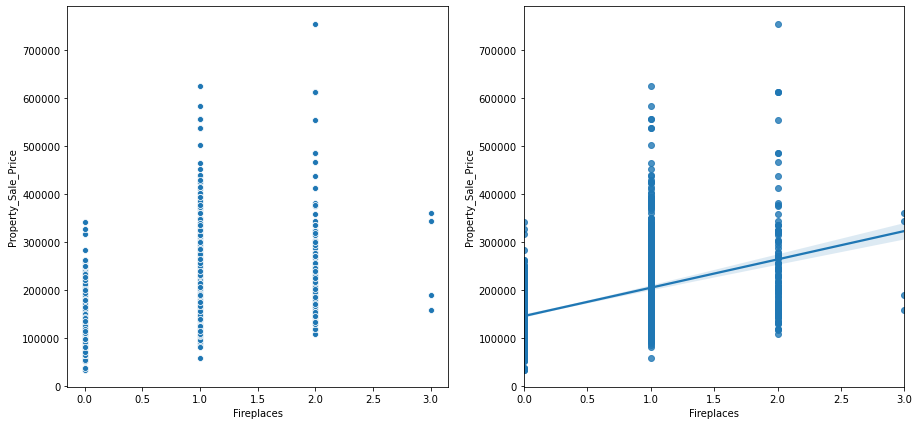

In [197]:
bi_var_analysis('Fireplaces')

#### GarageType

Basic EDA of GarageType

description    Garage location
Name: GarageType, dtype: object


Unique values in GarageType are ['Attchd' 'Detchd' '2Types' 'CarPort' 'BuiltIn' 'Basment']

Attchd     1091
Detchd     432 
BuiltIn    98  
Basment    19  
CarPort    11  
2Types     7   
Name: GarageType, dtype: int64


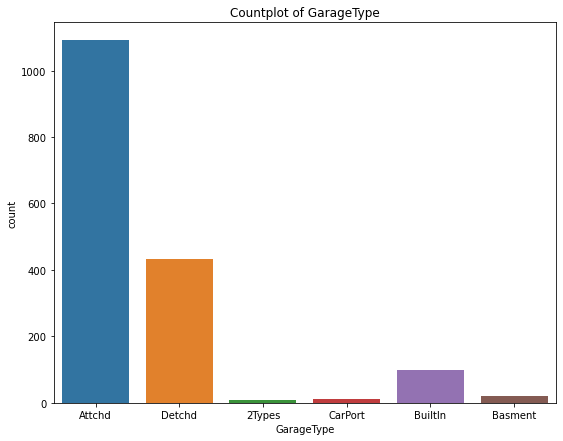

In [198]:
uni_var_analysis('GarageType')

Relationship between GarageType and Property_Sale_Price

description    Garage location
Name: GarageType, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in GarageType are : ['Attchd' 'Detchd' '2Types' 'CarPort' 'BuiltIn' 'Basment']


Ho:  All the levels in GarageType have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of GarageType with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df          F        PR(>F)
C(GarageType)  1.964381e+12  5.0     77.101223  8.554132e-73
Residual       8.417914e+12  1652.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of GarageType with respect to Property_Sale_Price mean


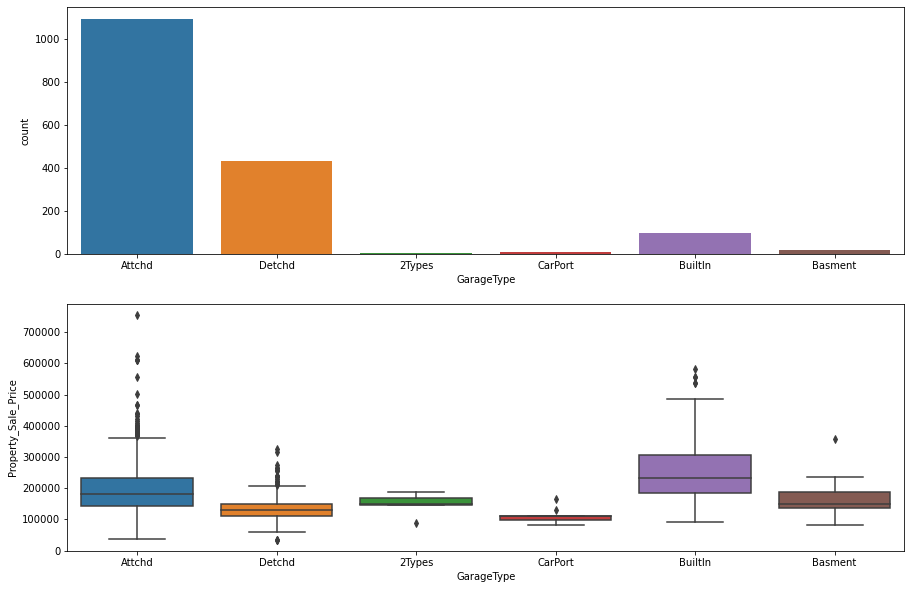

In [199]:
bi_var_analysis('GarageType')

#### GarageYrBlt

Basic EDA of GarageYrBlt

description    Year garage was built
Name: GarageYrBlt, dtype: object




There are 0 outliers in the GarageYrBlt column.


Skewness:  -0.7831924397797361
Kurtosis:  -0.2687492042231763


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.897
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


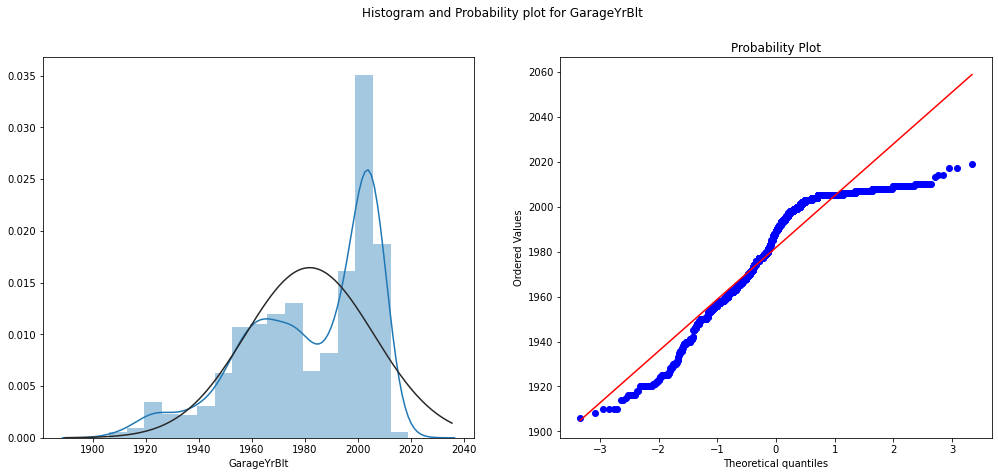

In [200]:
uni_var_analysis('GarageYrBlt')

Relationship between GarageYrBlt and Property_Sale_Price

description    Year garage was built
Name: GarageYrBlt, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.456


Lets see the relation between GarageYrBlt and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.6229110792402052
Intercept:  0.31910400306031383
R-value:  0.39857810019907086
p-value:  3.016276711583511e-64
Std error:  0.03522211552890461


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


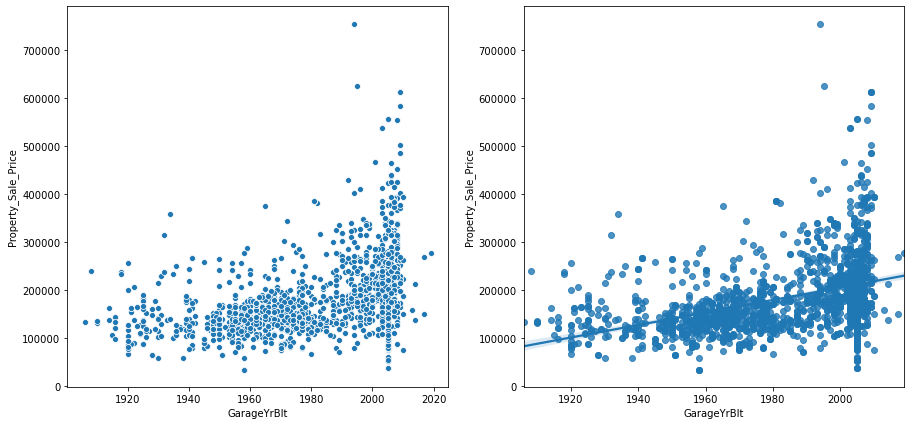

In [201]:
bi_var_analysis('GarageYrBlt')

#### GarageFinish

Basic EDA of GarageFinish

description    Interior finish of the garage
Name: GarageFinish, dtype: object


Unique values in GarageFinish are ['Fin' 'Unf' 'RFn']

Unf    761
RFn    489
Fin    408
Name: GarageFinish, dtype: int64


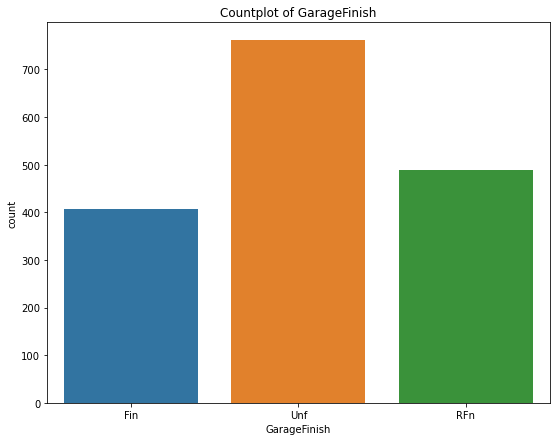

In [202]:
uni_var_analysis('GarageFinish')

Relationship between GarageFinish and Property_Sale_Price

description    Interior finish of the garage
Name: GarageFinish, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in GarageFinish are : ['Fin' 'Unf' 'RFn']


Ho:  All the levels in GarageFinish have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of GarageFinish with respect to Property_Sale_Price mean


Test Results 

                       sum_sq      df           F         PR(>F)
C(GarageFinish)  3.239846e+12  2.0     375.357574  3.765005e-135
Residual         7.142449e+12  1655.0 NaN         NaN           


Reject null hypothesis,  There is a significant difference between the levels of GarageFinish with respect to Property_Sale_Price mean


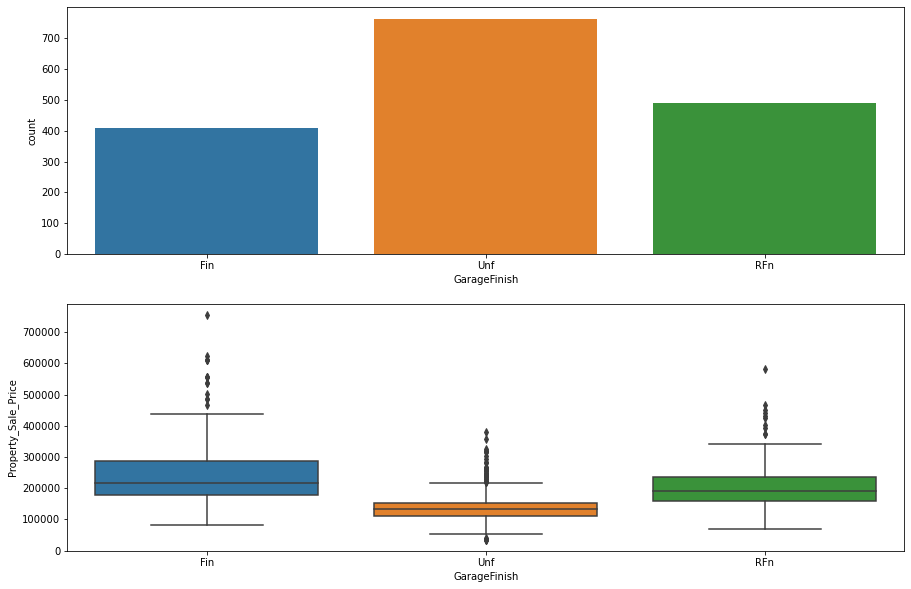

In [203]:
bi_var_analysis('GarageFinish')

#### GarageCars

Basic EDA of GarageCars

description    Size of garage in car capacity
Name: GarageCars, dtype: object




There are 4 outliers in the GarageCars column.


Skewness:  -0.37237780452389535
Kurtosis:  0.19325368462449122


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.834
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


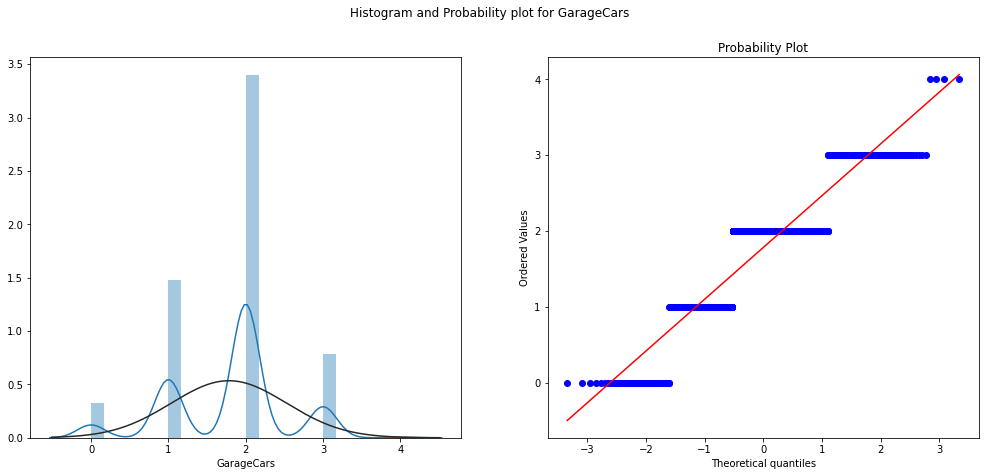

In [204]:
uni_var_analysis('GarageCars')

Relationship between GarageCars and Property_Sale_Price

description    Size of garage in car capacity
Name: GarageCars, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.684


Lets see the relation between GarageCars and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.8141853343993285
Intercept:  0.38490135931000913
R-value:  0.64080379109916
p-value:  2.327208318743487e-192
Std error:  0.02396967989361986


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


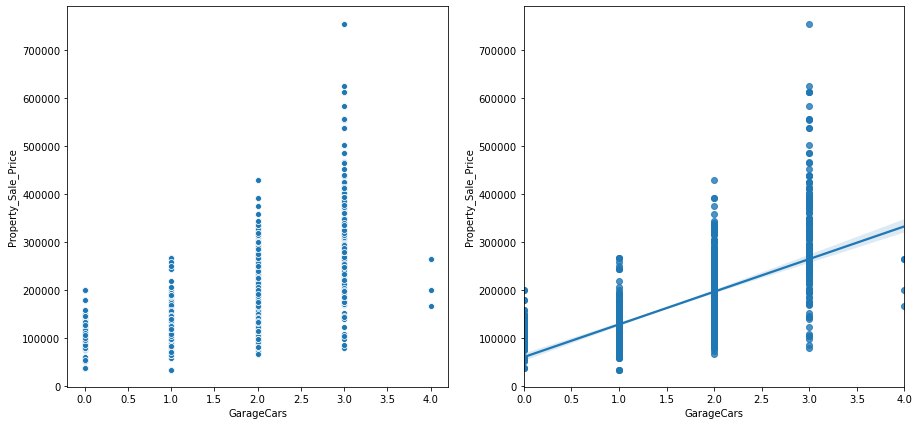

In [205]:
bi_var_analysis('GarageCars')

#### GarageArea

Basic EDA of GarageArea

description    Size of garage in square feet
Name: GarageArea, dtype: object




There are 23 outliers in the GarageArea column.


Skewness:  0.1509811183862023
Kurtosis:  0.8253651679115817


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.976
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


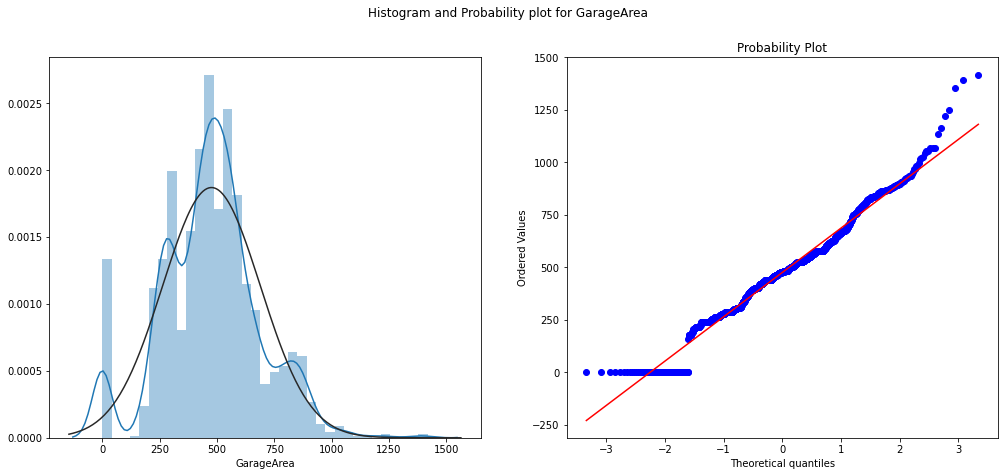

In [206]:
uni_var_analysis('GarageArea')

Relationship between GarageArea and Property_Sale_Price

description    Size of garage in square feet
Name: GarageArea, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.642


Lets see the relation between GarageArea and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.6639799619199562
Intercept:  0.21800202190402068
R-value:  0.6222429349479335
p-value:  2.5465838027883794e-178
Std error:  0.02052716986202429


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


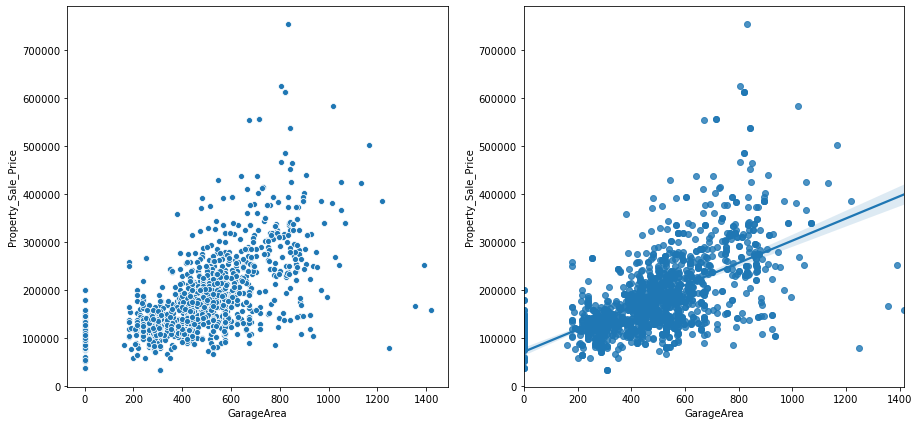

In [207]:
bi_var_analysis('GarageArea')

#### GarageQual

Basic EDA of GarageQual

description    Garage quality
Name: GarageQual, dtype: object


Unique values in GarageQual are ['TA' 'Fa' 'Gd' 'Po' 'Ex']

TA    1592
Fa    48  
Gd    13  
Ex    3   
Po    2   
Name: GarageQual, dtype: int64


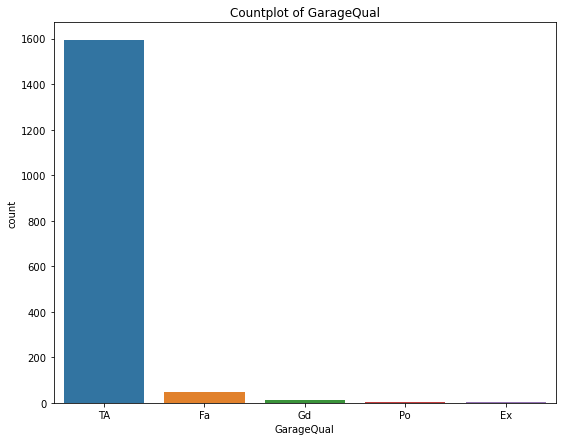

In [208]:
uni_var_analysis('GarageQual')

Relationship between GarageQual and Property_Sale_Price

description    Garage quality
Name: GarageQual, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in GarageQual are : ['TA' 'Fa' 'Gd' 'Po' 'Ex']


Ho:  All the levels in GarageQual have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of GarageQual with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df         F        PR(>F)
C(GarageQual)  2.363022e+11  4.0     9.624674  1.078678e-07
Residual       1.014599e+13  1653.0 NaN       NaN          


Reject null hypothesis,  There is a significant difference between the levels of GarageQual with respect to Property_Sale_Price mean


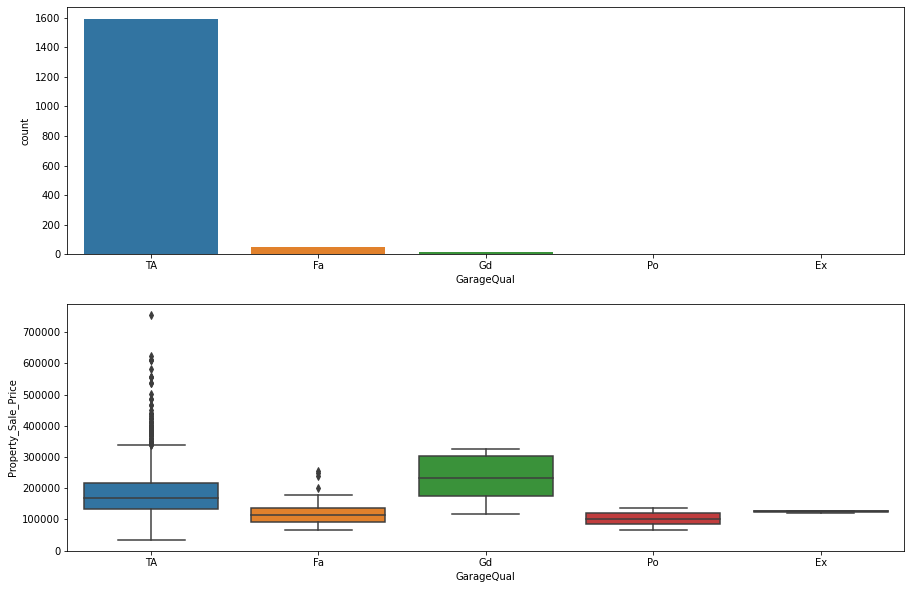

In [209]:
bi_var_analysis('GarageQual')

#### GarageCond

Basic EDA of GarageCond

description    Garage condition
Name: GarageCond, dtype: object


Unique values in GarageCond are ['TA' 'Fa' 'Gd' 'Po' 'Ex']

TA    1600
Fa    37  
Gd    12  
Po    6   
Ex    3   
Name: GarageCond, dtype: int64


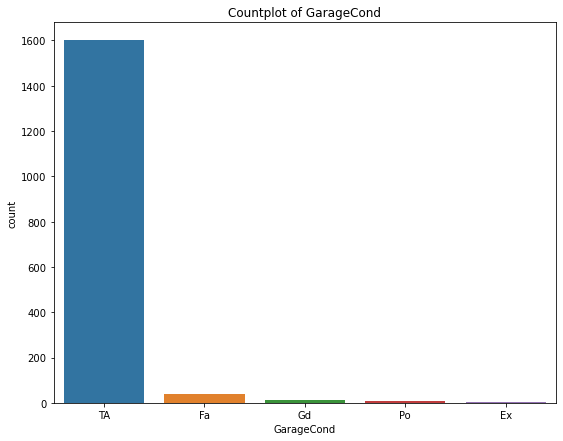

In [210]:
uni_var_analysis('GarageCond')

Relationship between GarageCond and Property_Sale_Price

description    Garage condition
Name: GarageCond, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in GarageCond are : ['TA' 'Fa' 'Gd' 'Po' 'Ex']


Ho:  All the levels in GarageCond have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of GarageCond with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df        F        PR(>F)
C(GarageCond)  2.319546e+11  4.0     9.44355  1.510123e-07
Residual       1.015034e+13  1653.0 NaN      NaN          


Reject null hypothesis,  There is a significant difference between the levels of GarageCond with respect to Property_Sale_Price mean


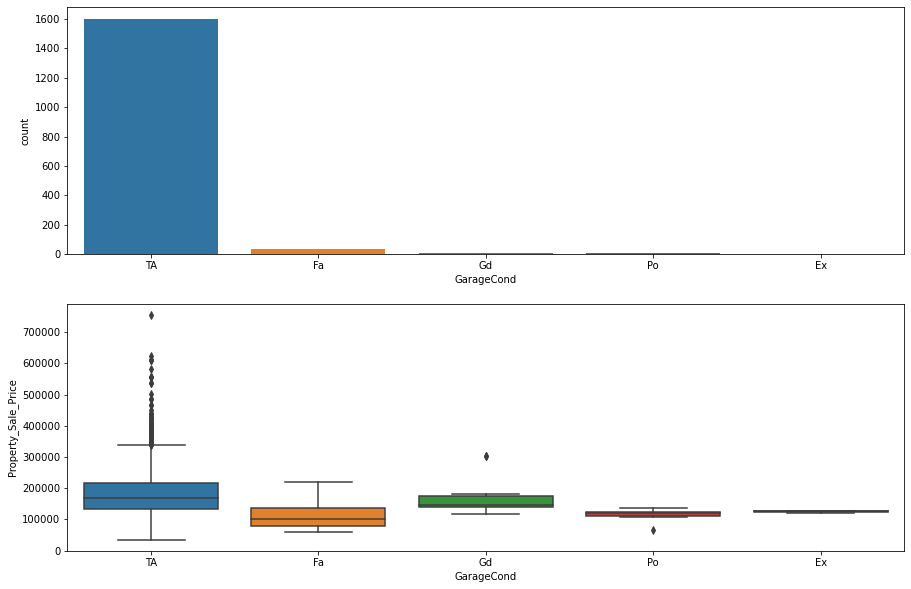

In [211]:
bi_var_analysis('GarageCond')

#### PavedDrive

Basic EDA of PavedDrive

description    Paved driveway
Name: PavedDrive, dtype: object


Unique values in PavedDrive are ['Y' 'N' 'P']

Y    1531
N    90  
P    37  
Name: PavedDrive, dtype: int64


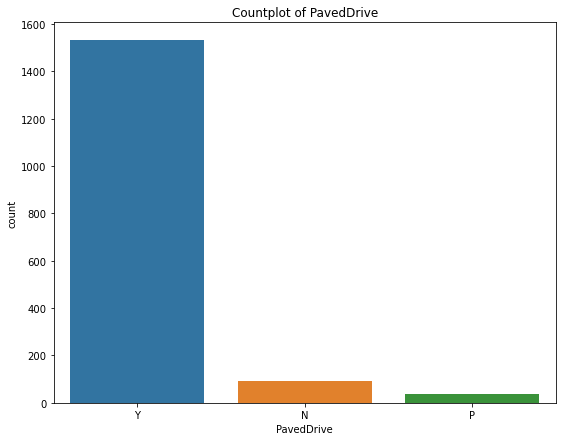

In [212]:
uni_var_analysis('PavedDrive')

Relationship between PavedDrive and Property_Sale_Price

description    Paved driveway
Name: PavedDrive, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in PavedDrive are : ['Y' 'N' 'P']


Ho:  All the levels in PavedDrive have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of PavedDrive with respect to Property_Sale_Price mean


Test Results 

                     sum_sq      df          F        PR(>F)
C(PavedDrive)  4.425925e+11  2.0     36.846706  2.206569e-16
Residual       9.939703e+12  1655.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of PavedDrive with respect to Property_Sale_Price mean


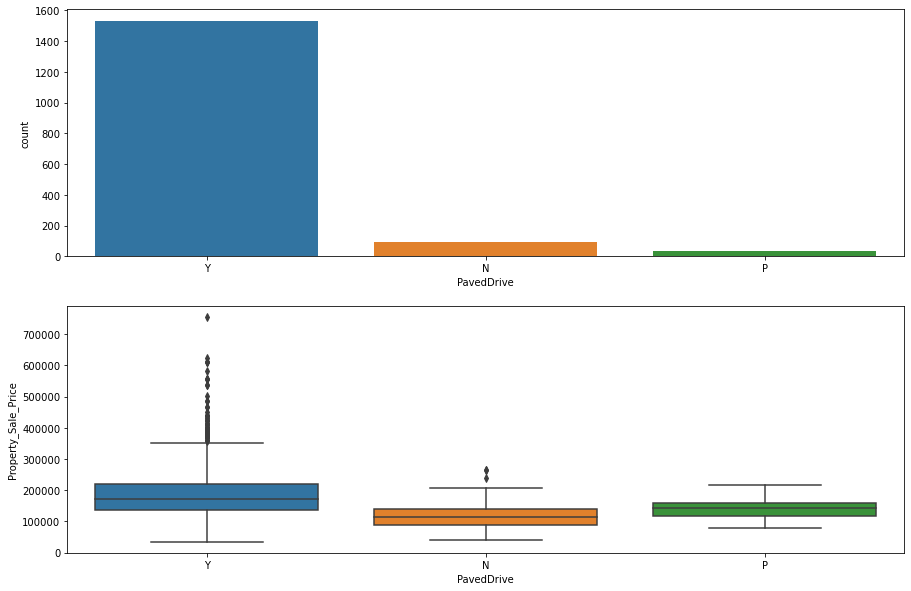

In [213]:
bi_var_analysis('PavedDrive')

#### WoodDeckSF

Basic EDA of WoodDeckSF

description    Wood deck area in square feet
Name: WoodDeckSF, dtype: object




There are 40 outliers in the WoodDeckSF column.


Skewness:  1.7524909186884945
Kurtosis:  4.465078192436307


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.759
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


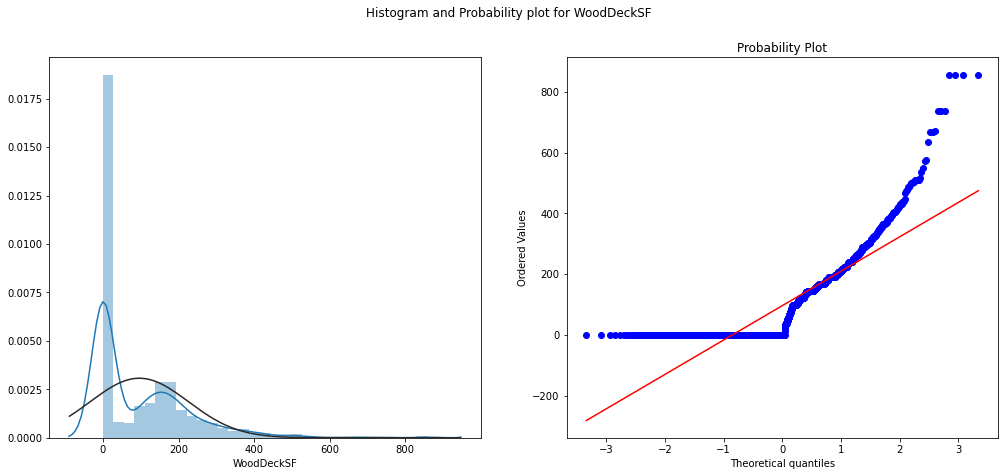

In [214]:
uni_var_analysis('WoodDeckSF')

Relationship between WoodDeckSF and Property_Sale_Price

description    Wood deck area in square feet
Name: WoodDeckSF, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.343


Lets see the relation between WoodDeckSF and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.3922354132005322
Intercept:  -0.01791249533521394
R-value:  0.3196157367273149
p-value:  1.0876507882315527e-40
Std error:  0.028575204966266744


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


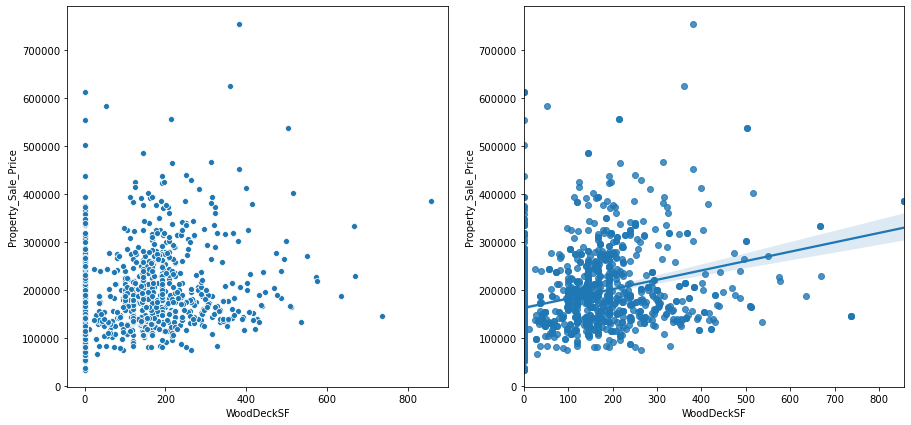

In [215]:
bi_var_analysis('WoodDeckSF')

#### OpenPorchSF

Basic EDA of OpenPorchSF

description    Open porch area in square feet
Name: OpenPorchSF, dtype: object




There are 82 outliers in the OpenPorchSF column.


Skewness:  2.237021186114827
Kurtosis:  7.4929166531637765


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.740
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


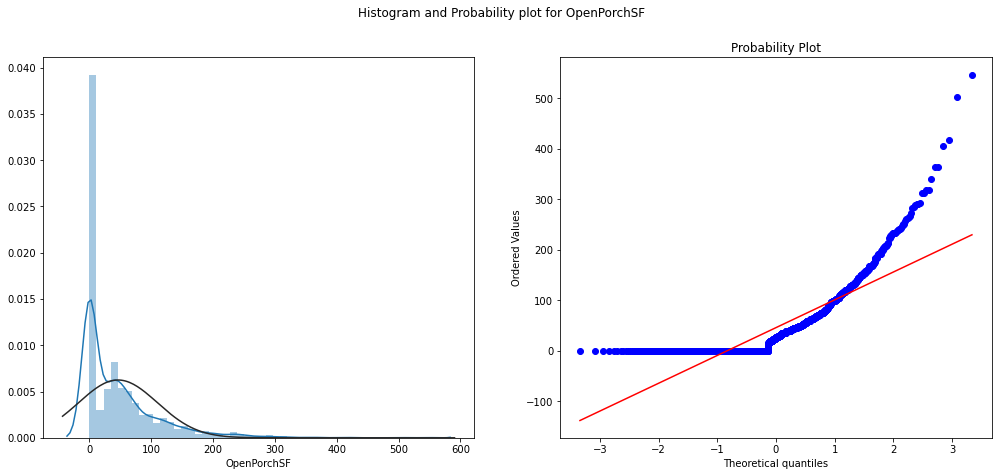

In [216]:
uni_var_analysis('OpenPorchSF')

Relationship between OpenPorchSF and Property_Sale_Price

description    Open porch area in square feet
Name: OpenPorchSF, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.511


Lets see the relation between OpenPorchSF and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.3483414347271003
Intercept:  0.10396266881281253
R-value:  0.3451060323448173
p-value:  1.420542170846917e-47
Std error:  0.02328017145805214


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


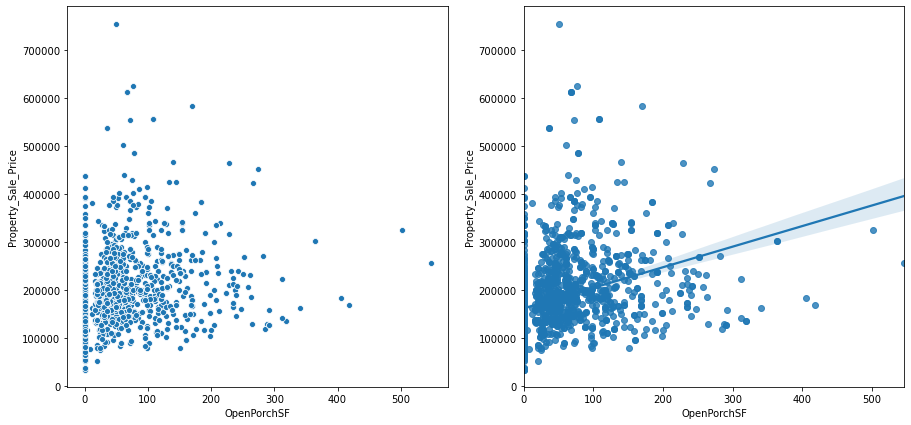

In [217]:
bi_var_analysis('OpenPorchSF')

#### EnclosedPorch

Basic EDA of EnclosedPorch

description    Enclosed porch area in square feet
Name: EnclosedPorch, dtype: object




There are 223 outliers in the EnclosedPorch column.


Skewness:  3.1966102213106313
Kurtosis:  11.093406005855137


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.400
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


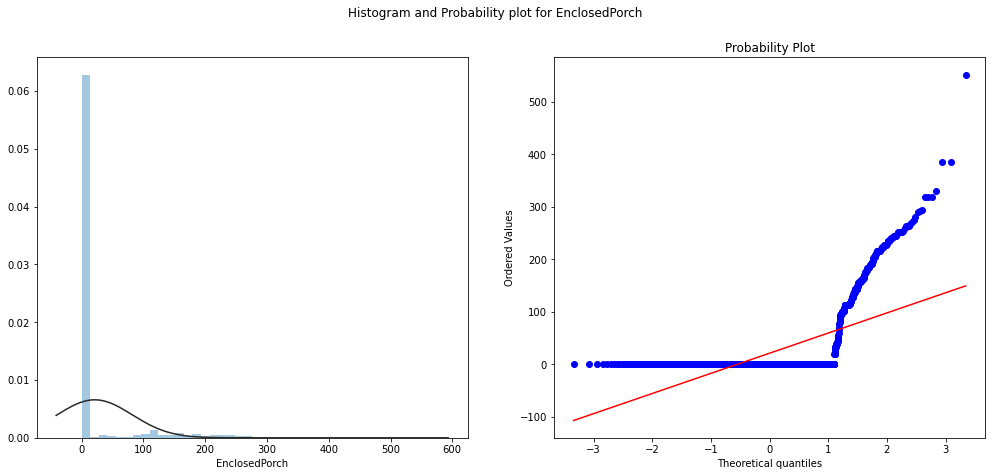

In [218]:
uni_var_analysis('EnclosedPorch')

Relationship between EnclosedPorch and Property_Sale_Price

description    Enclosed porch area in square feet
Name: EnclosedPorch, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.195


Lets see the relation between EnclosedPorch and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -0.0016594722845229407
Intercept:  0.2421439835821454
R-value:  -0.10614610693405
p-value:  1.483689371796234e-05
Std error:  0.00038201048442470164


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


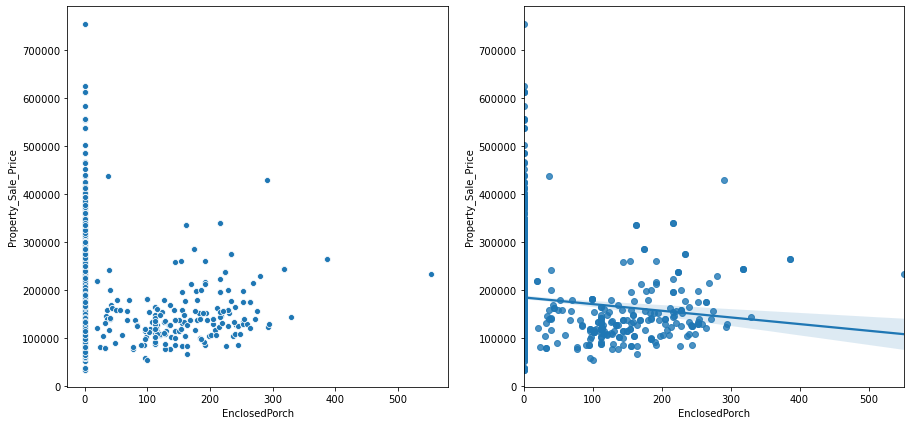

In [219]:
bi_var_analysis('EnclosedPorch')

#### 3SsnPorch

Basic EDA of 3SsnPorch

description    Three season porch area in square feet
Name: 3SsnPorch, dtype: object




There are 26 outliers in the 3SsnPorch column.


Skewness:  10.879762901251956
Kurtosis:  137.04570972586845


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.088
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


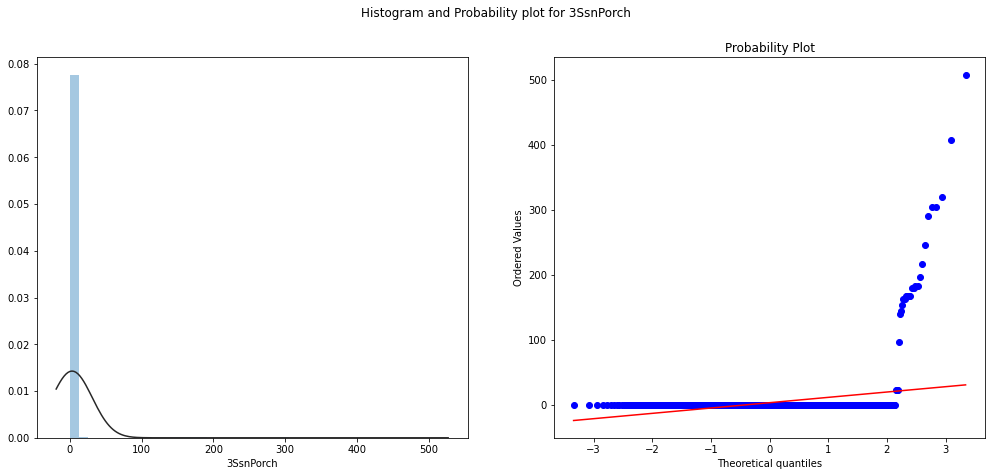

In [220]:
uni_var_analysis('3SsnPorch')

Relationship between 3SsnPorch and Property_Sale_Price

description    Three season porch area in square feet
Name: 3SsnPorch, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.066


Lets see the relation between 3SsnPorch and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.0020061869528958894
Intercept:  0.20095038297963472
R-value:  0.059152958866222384
p-value:  0.016000004262049106
Std error:  0.0008319622406589343


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


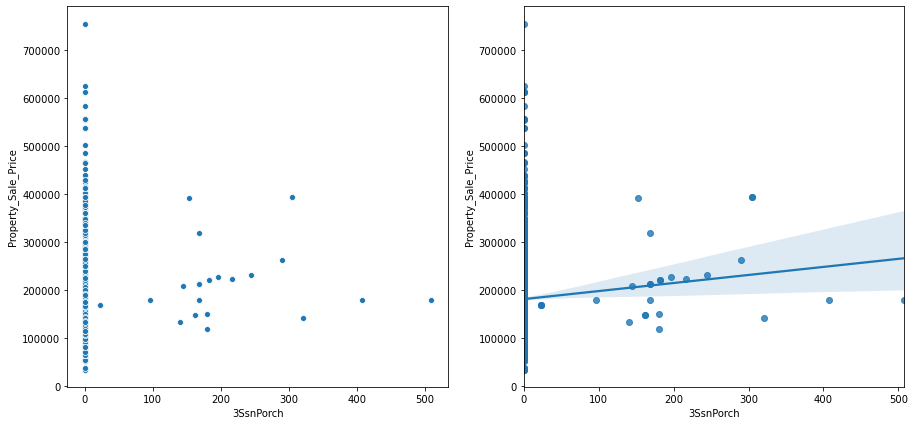

In [221]:
bi_var_analysis('3SsnPorch')

#### ScreenPorch

Basic EDA of ScreenPorch

description    Screen porch area in square feet
Name: ScreenPorch, dtype: object




There are 128 outliers in the ScreenPorch column.


Skewness:  4.141359147419481
Kurtosis:  18.613531030866092


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.293
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


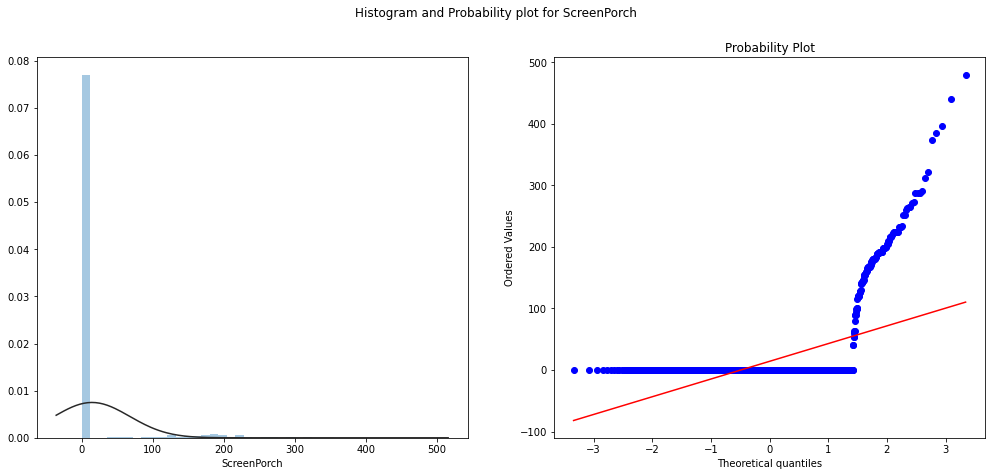

In [222]:
uni_var_analysis('ScreenPorch')

Relationship between ScreenPorch and Property_Sale_Price

description    Screen porch area in square feet
Name: ScreenPorch, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.072


Lets see the relation between ScreenPorch and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.0015928251255924526
Intercept:  0.18453567648002156
R-value:  0.08937832615847181
p-value:  0.0002685320701731734
Std error:  0.00043617831560720753


Reject Null hypothesis,  Slope not equal to 0 (The regressioin model can predict the dependent variable)


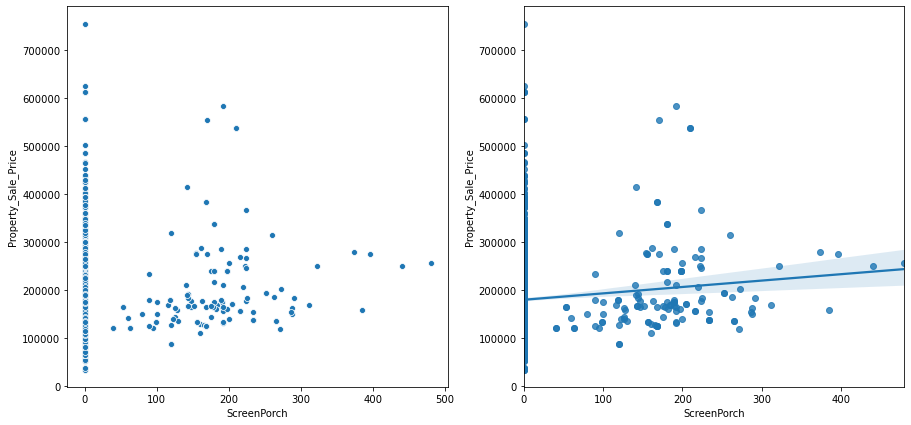

In [223]:
bi_var_analysis('ScreenPorch')

#### PoolArea

Basic EDA of PoolArea

description    Pool area in square feet
Name: PoolArea, dtype: object




There are 5 outliers in the PoolArea column.


Skewness:  18.474450553071282
Kurtosis:  344.0000819265611


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.029
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


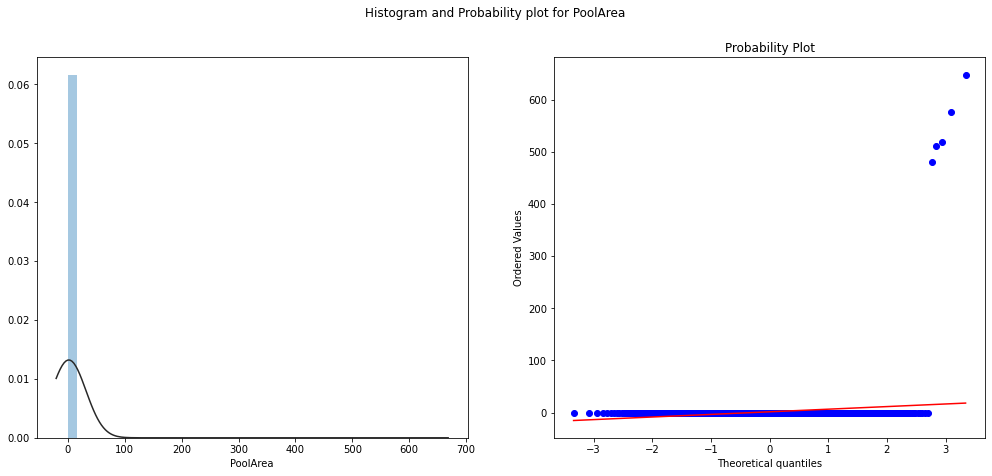

In [224]:
uni_var_analysis('PoolArea')

Relationship between PoolArea and Property_Sale_Price

description    Pool area in square feet
Name: PoolArea, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.029


Lets see the relation between PoolArea and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.0003499964131091273
Intercept:  0.2065585781022827
R-value:  0.0111385464558349
p-value:  0.6503921894541076
Std error:  0.0007721078435340159


Fail to reject Null hypothesis,  Slope is 0 (The regression model has no predictability of the dependent variable)


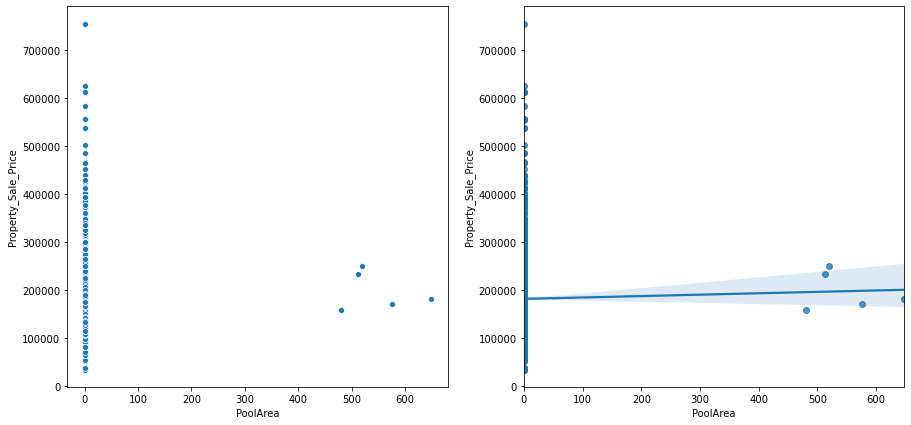

In [225]:
bi_var_analysis('PoolArea')

#### MiscVal

Basic EDA of MiscVal

description    Value of miscellaneous feature
Name: MiscVal, dtype: object




There are 60 outliers in the MiscVal column.


Skewness:  30.31300176149422
Kurtosis:  1083.5035749433362


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.057
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


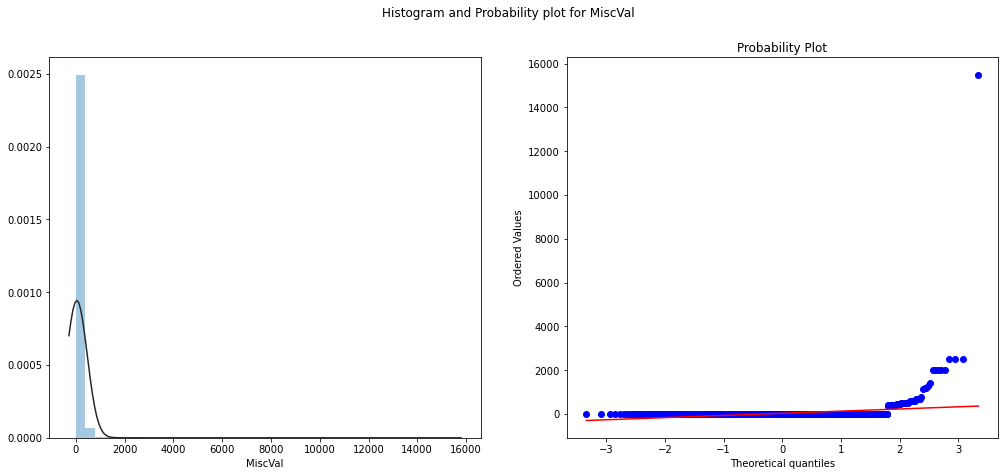

In [226]:
uni_var_analysis('MiscVal')

Relationship between MiscVal and Property_Sale_Price

description    Value of miscellaneous feature
Name: MiscVal, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.070


Lets see the relation between MiscVal and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  -3.329372440414425e-05
Intercept:  0.2083811257742697
R-value:  -0.014847262097093654
p-value:  0.5457530424530725
Std error:  5.5098270317722586e-05


Fail to reject Null hypothesis,  Slope is 0 (The regression model has no predictability of the dependent variable)


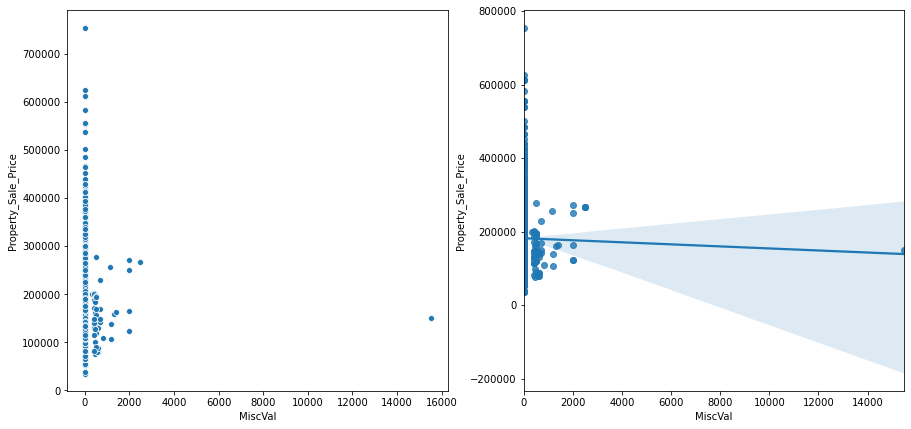

In [227]:
bi_var_analysis('MiscVal')

#### MoSold

Basic EDA of MoSold

description    Month Sold (MM)
Name: MoSold, dtype: object




There are 0 outliers in the MoSold column.


Skewness:  0.17430736863331894
Kurtosis:  -0.4128063409111351


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.971
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


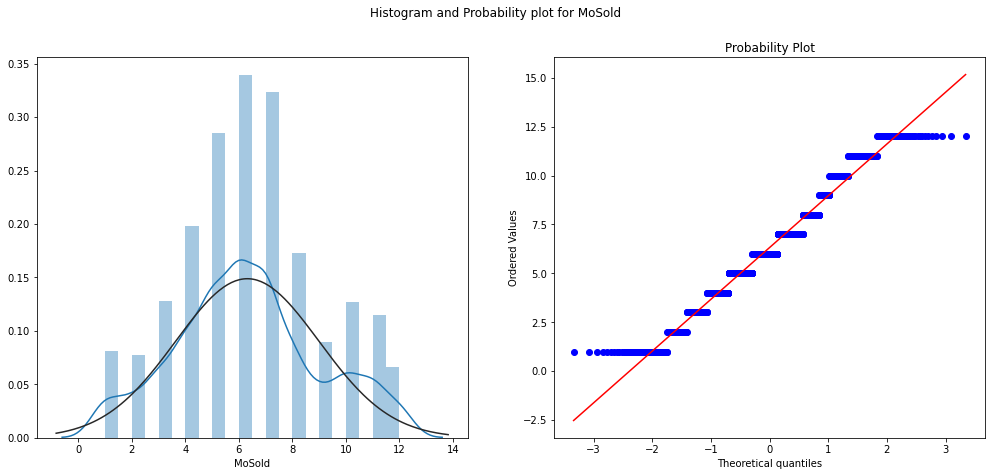

In [228]:
uni_var_analysis('MoSold')

Relationship between MoSold and Property_Sale_Price

description    Month Sold (MM)
Name: MoSold, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: 0.070


Lets see the relation between MoSold and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.04344963890731129
Intercept:  0.20252365876703943
R-value:  0.040961298370008704
p-value:  0.09544952414736517
Std error:  0.026044597456622815


Fail to reject Null hypothesis,  Slope is 0 (The regression model has no predictability of the dependent variable)


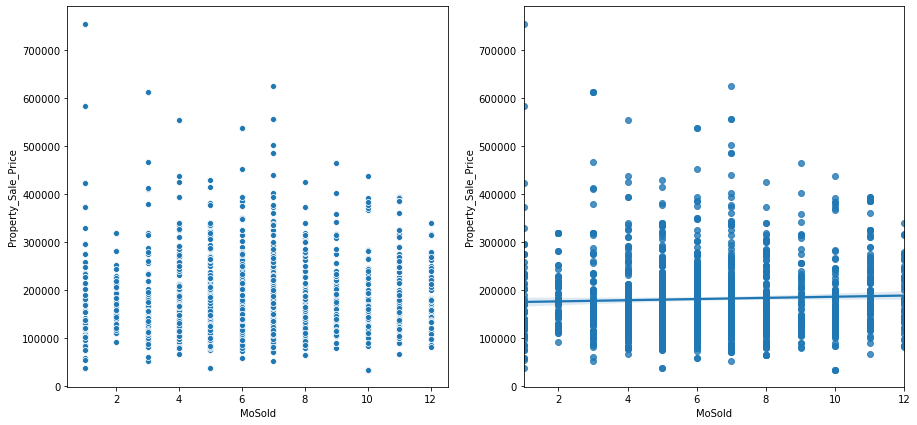

In [229]:
bi_var_analysis('MoSold')

#### YrSold

Basic EDA of YrSold

description    Year Sold (YYYY)
Name: YrSold, dtype: object




There are 0 outliers in the YrSold column.


Skewness:  0.06559290490042947
Kurtosis:  -1.2028786457198983


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.897
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


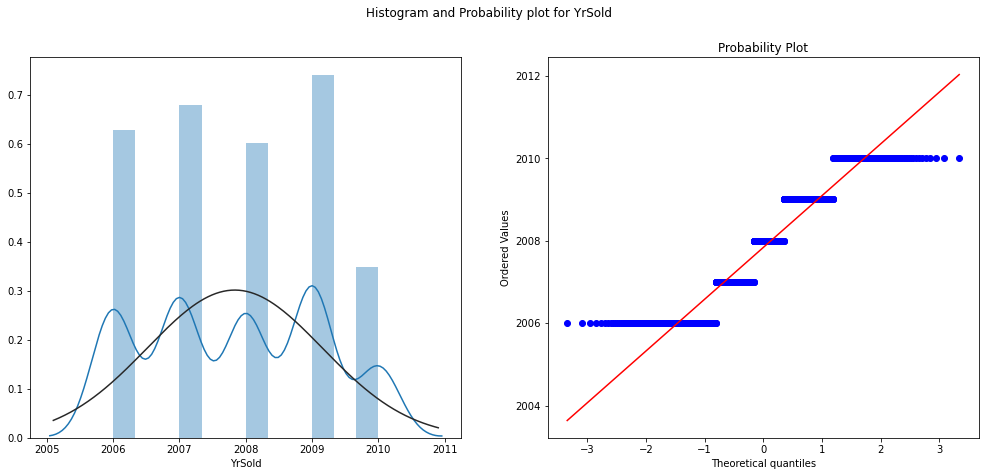

In [230]:
uni_var_analysis('YrSold')

Relationship between YrSold and Property_Sale_Price

description    Year Sold (YYYY)
Name: YrSold, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Since the data is not normally distributed we are using Spearman correlation coeffiecient.
Spearmans correlation: -0.007


Lets see the relation between YrSold and Property_Sale_Price using Wald Test with t-distribution of the test statistic.


Ho:  Slope is 0 (The regression model has no predictability of the dependent variable)
Ha:  Slope not equal to 0 (The regressioin model can predict the dependent variable)


Test Results

Slope:  0.013700989798500441
Intercept:  0.2082721645239638
R-value:  0.009556191549477846
p-value:  0.6974021722545922
Std error:  0.0352303614883248


Fail to reject Null hypothesis,  Slope is 0 (The regression model has no predictability of the dependent variable)


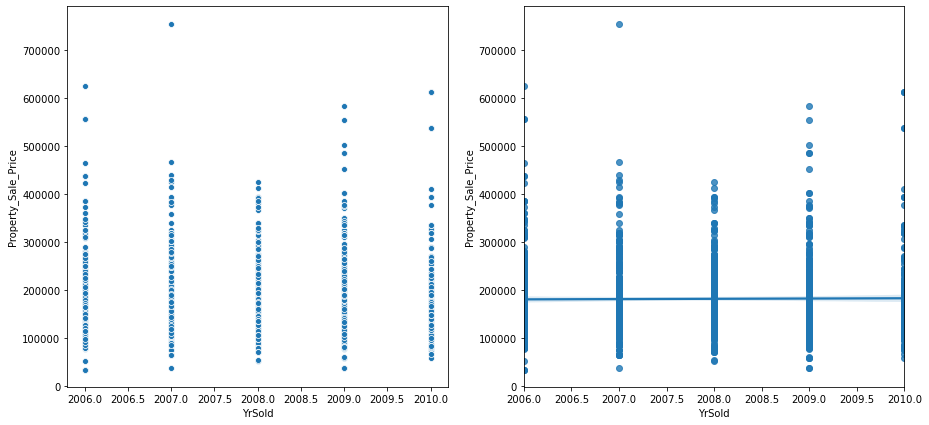

In [231]:
bi_var_analysis('YrSold')

#### SaleType

Basic EDA of SaleType

description    Type of sale
Name: SaleType, dtype: object


Unique values in SaleType are ['WD' 'COD' 'New' 'CWD' 'ConLI' 'Con' 'ConLD' 'ConLw' 'Oth']

WD       1428
New      142 
COD      57  
ConLD    13  
ConLI    5   
ConLw    4   
Oth      3   
CWD      3   
Con      3   
Name: SaleType, dtype: int64


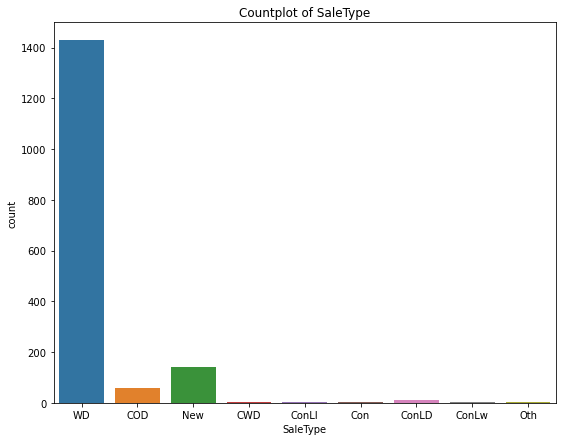

In [232]:
uni_var_analysis('SaleType')

Relationship between SaleType and Property_Sale_Price

description    Type of sale
Name: SaleType, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in SaleType are : ['WD' 'COD' 'New' 'CWD' 'ConLI' 'Con' 'ConLD' 'ConLw' 'Oth']


Ho:  All the levels in SaleType have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of SaleType with respect to Property_Sale_Price mean


Test Results 

                   sum_sq      df         F        PR(>F)
C(SaleType)  1.358327e+12  8.0     31.02684  1.335441e-45
Residual     9.023968e+12  1649.0 NaN       NaN          


Reject null hypothesis,  There is a significant difference between the levels of SaleType with respect to Property_Sale_Price mean


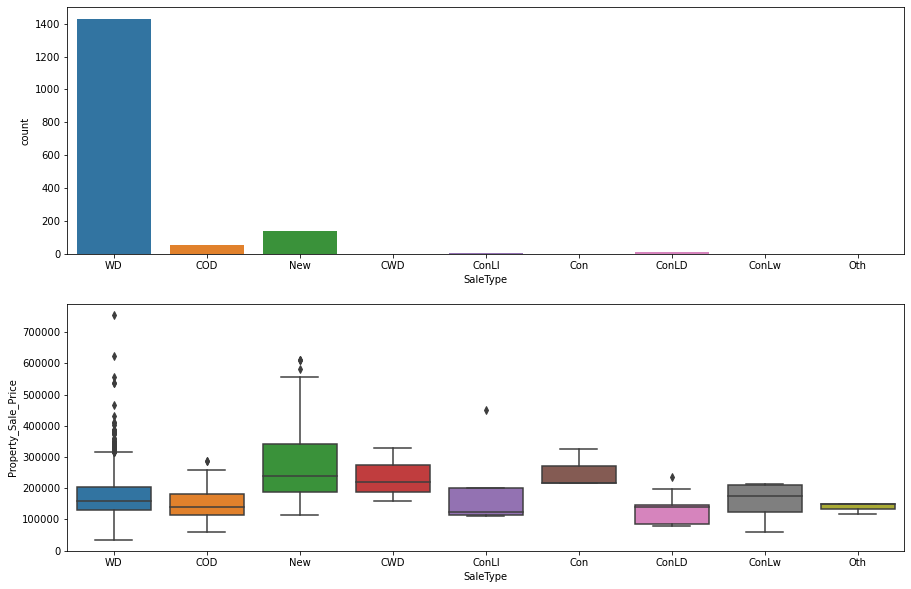

In [233]:
bi_var_analysis('SaleType')

#### SaleCondition

Basic EDA of SaleCondition

description    Condition of sale
Name: SaleCondition, dtype: object


Unique values in SaleCondition are ['Normal' 'AdjLand' 'Partial' 'Abnorml' 'Alloca' 'Family']

Normal     1357
Partial    146 
Abnorml    120 
Family     20  
Alloca     10  
AdjLand    5   
Name: SaleCondition, dtype: int64


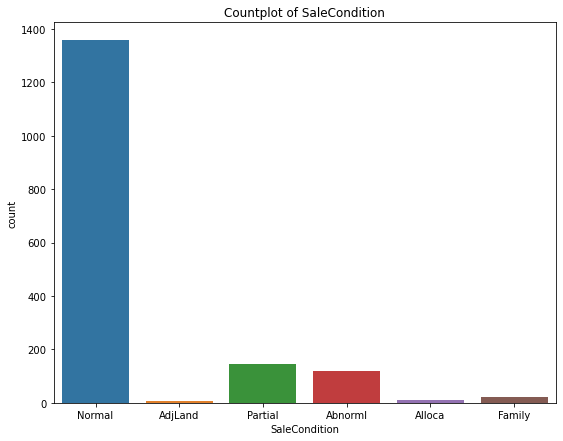

In [234]:
uni_var_analysis('SaleCondition')

Relationship between SaleCondition and Property_Sale_Price

description    Condition of sale
Name: SaleCondition, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Unique values in SaleCondition are : ['Normal' 'AdjLand' 'Partial' 'Abnorml' 'Alloca' 'Family']


Ho:  All the levels in SaleCondition have an equal mean Property_Sale_Price
Ha:  There is a significant difference between the levels of SaleCondition with respect to Property_Sale_Price mean


Test Results 

                        sum_sq      df          F        PR(>F)
C(SaleCondition)  1.381750e+12  5.0     50.722501  5.150682e-49
Residual          9.000545e+12  1652.0 NaN        NaN          


Reject null hypothesis,  There is a significant difference between the levels of SaleCondition with respect to Property_Sale_Price mean


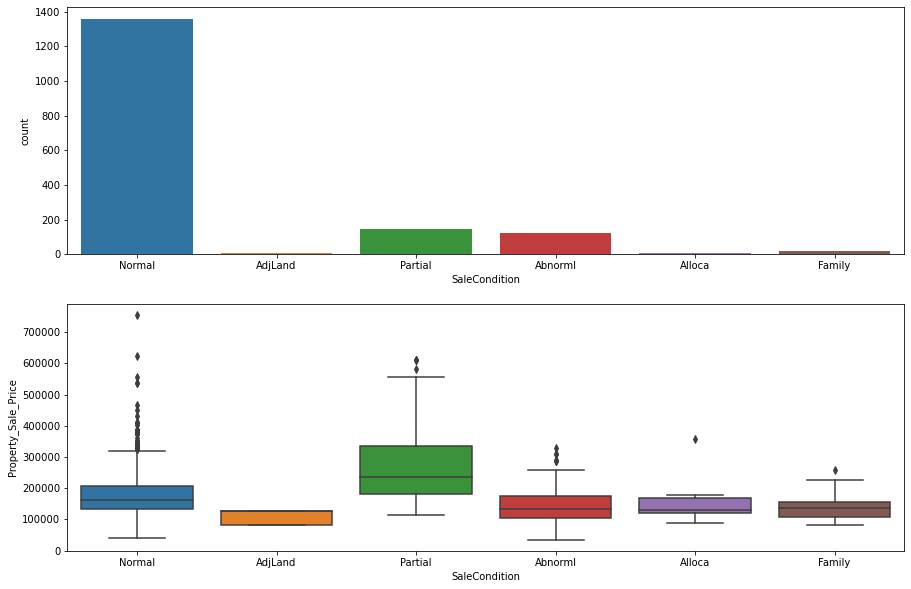

In [235]:
bi_var_analysis('SaleCondition')

#### Property_Sale_Price

Basic EDA of Property_Sale_Price

description    Price of the house
Name: Property_Sale_Price, dtype: object




There are 68 outliers in the Property_Sale_Price column.


Skewness:  1.799063265733244
Kurtosis:  5.649445995422498


Test for Normality: 
Ho :  There is no significant departure from normal bell shaped curve (Data is normal)
Ha :  There is a significant departure from normal bell shaped curve (Data is not normal)


Test Results
test statistics: 0.874
p value: 0.000000


There is a significant departure from normal bell shaped curve (Data is not normal) : reject Ho


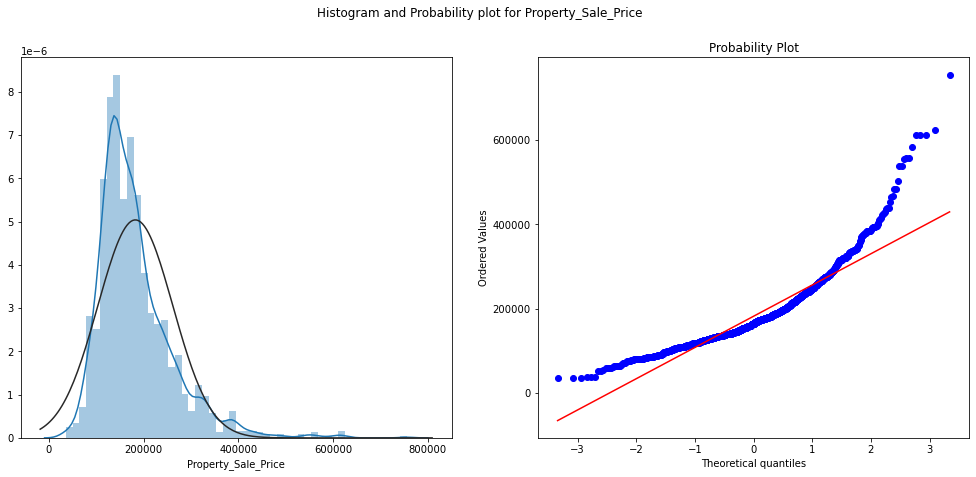

In [236]:
uni_var_analysis('Property_Sale_Price')

In [237]:
bi_var_analysis('Property_Sale_Price')

Relationship between Property_Sale_Price and Property_Sale_Price

description    Price of the house
Name: Property_Sale_Price, dtype: object 

description    Price of the house
Name: Property_Sale_Price, dtype: object


Relationship between Property_Sale_Price and Property_Sale_Price


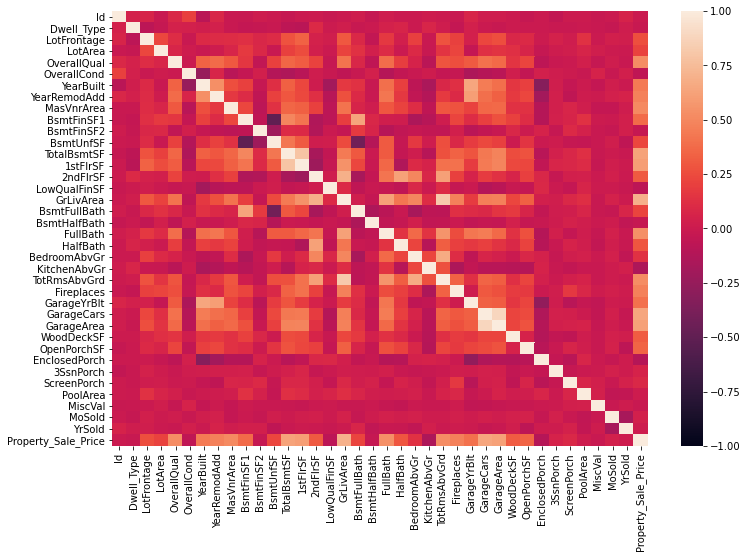

In [238]:
plt.figure(figsize=(12,8))
sns.heatmap(X_eda.corr(), vmin=-1)

In [239]:
correlation

{'high(6-10)': {'FullBath',
  'GarageArea',
  'GarageCars',
  'GrLivArea',
  'TotalBsmtSF'},
 'medium(3-6)': {'1stFlrSF',
  '2ndFlrSF',
  'Fireplaces',
  'GarageYrBlt',
  'HalfBath',
  'LotArea',
  'LotFrontage',
  'MasVnrArea',
  'OpenPorchSF',
  'OverallQual',
  'TotRmsAbvGrd',
  'WoodDeckSF',
  'YearBuilt',
  'YearRemodAdd'},
 'low(0-3)': {'3SsnPorch',
  'BedroomAbvGr',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtFullBath',
  'BsmtHalfBath',
  'BsmtUnfSF',
  'Dwell_Type',
  'EnclosedPorch',
  'Id',
  'KitchenAbvGr',
  'LowQualFinSF',
  'MiscVal',
  'MoSold',
  'OverallCond',
  'PoolArea',
  'ScreenPorch',
  'YrSold'}}

In [240]:
action

{'drop': {'BsmtFinSF2',
  'BsmtHalfBath',
  'Dwell_Type',
  'Id',
  'LandSlope',
  'MiscVal',
  'MoSold',
  'PoolArea',
  'Road_Type',
  'Utilities',
  'YrSold'},
 'power_t': {'FullBath',
  'GarageYrBlt',
  'HalfBath',
  'Id',
  'MoSold',
  'YearRemodAdd',
  'YrSold'},
 'quantile_t': {'1stFlrSF',
  '2ndFlrSF',
  '3SsnPorch',
  'BedroomAbvGr',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtFullBath',
  'BsmtHalfBath',
  'BsmtUnfSF',
  'Dwell_Type',
  'EnclosedPorch',
  'Fireplaces',
  'GarageArea',
  'GarageCars',
  'GrLivArea',
  'KitchenAbvGr',
  'LotArea',
  'LotFrontage',
  'LowQualFinSF',
  'MasVnrArea',
  'MiscVal',
  'OpenPorchSF',
  'OverallCond',
  'OverallQual',
  'PoolArea',
  'Property_Sale_Price',
  'ScreenPorch',
  'TotRmsAbvGrd',
  'TotalBsmtSF',
  'WoodDeckSF',
  'YearBuilt'},
 'robust_s': set(),
 'standard_s': set(),
 'one_hot': {'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'BsmtQual',
  'CentralAir',
  'Condition1',
  'Condition2',
  'Dwelling_Type',
  '

Lets create 4 models
* with all the variables
* with all categorical variables and high + medium correlated variables
* with all categorical variables and high + medium correlated variables and droping unnecessary columns
* with all categorical variables and high correlated variables and droping unnecessary columns

In [241]:
num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
num_cols

['Id',
 'Dwell_Type',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [242]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
cat_cols

['Zone_Class',
 'Road_Type',
 'Property_Shape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'Dwelling_Type',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [243]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [251]:
ct = ColumnTransformer([
    ('num_scaling', RobustScaler(), num_cols),
    ('cat_encoding', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
])

In [252]:
x = ct.fit_transform(X_train)

In [257]:
x_test = ct.transform(X_test)

In [259]:
x_sm = x
x_sm = sm.add_constant(x_sm)
mlm = sm.OLS(y_train, x_sm).fit()
print(mlm.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.932
Model:                             OLS   Adj. R-squared:                  0.921
Method:                  Least Squares   F-statistic:                     87.28
Date:                 Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                         00:03:03   Log-Likelihood:                -18824.
No. Observations:                 1658   AIC:                         3.810e+04
Df Residuals:                     1432   BIC:                         3.932e+04
Df Model:                          225                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1954.8468   2313.865     -0.84

In [262]:
from sklearn.linear_model import LinearRegression